# 환경 설정

In [3]:
# import zipfile

# # 압축 파일 경로
# zip_file_path = '/content/drive/MyDrive/zerobase/파이널 플젝/data/open.zip'

# # 압축 해제할 디렉토리 경로
# extract_to_path = '/content/drive/MyDrive/zerobase/파이널 플젝/data/'

# # 압축 해제
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to_path)

In [210]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import os

# 작업 디렉토리 변경
os.chdir("C:/Users/kjh25/zerobase/myenv/파이널플젝")

# 변경된 작업 디렉토리 확인
print("Current working directory: ", os.getcwd())

Current working directory:  C:\Users\kjh25\zerobase\myenv\파이널플젝


# 데이터 로드

In [8]:
custom_df = pd.read_csv('./data/Customer_info.csv')

In [9]:
custom_df.head()

고객ID 성별        고객지역  가입기간
0  USER_1358  남     Chicago    12
1  USER_0190  남  California    43
2  USER_0066  남     Chicago    33
3  USER_0345  여  California    30
4  USER_0683  남  California    49

In [10]:
discount_df = pd.read_csv('./data/Discount_info.csv')
discount_df.head()

월    제품카테고리    쿠폰코드  할인율
0  Jan   Apparel  SALE10   10
1  Feb   Apparel  SALE20   20
2  Mar   Apparel  SALE30   30
3  Jan  Nest-USA  ELEC10   10
4  Feb  Nest-USA  ELEC20   20

In [11]:
marketing_df = pd.read_csv('./data/Marketing_info.csv')
marketing_df.head()

날짜  오프라인비용    온라인비용
0  2019-01-01    4500  2424.50
1  2019-01-02    4500  3480.36
2  2019-01-03    4500  1576.38
3  2019-01-04    4500  2928.55
4  2019-01-05    4500  4055.30

In [12]:
onlinesales_df = pd.read_csv('./data/Onlinesales_info.csv')
onlinesales_df.head()

고객ID              거래ID        거래날짜          제품ID    제품카테고리  수량  \
0  USER_1358  Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1  USER_1358  Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2  USER_1358  Transaction_0002  2019-01-01  Product_0904    Office   1   
3  USER_1358  Transaction_0003  2019-01-01  Product_0203   Apparel   5   
4  USER_1358  Transaction_0003  2019-01-01  Product_0848      Bags   1   

     평균금액  배송료      쿠폰상태  
0  153.71  6.5      Used  
1  153.71  6.5      Used  
2    2.05  6.5      Used  
3   17.53  6.5  Not Used  
4   16.50  6.5      Used

In [13]:
tax_df = pd.read_csv('./data/Tax_info.csv')
tax_df.head()

제품카테고리   GST
0   Nest-USA  0.10
1     Office  0.10
2    Apparel  0.18
3       Bags  0.18
4  Drinkware  0.18

# 데이터 전처리

## 결측치 확인하기
전부 0임을 확인

In [14]:
custom_df.isnull().sum().sum(), discount_df.isnull().sum().sum(), marketing_df.isnull().sum().sum(), onlinesales_df.isnull().sum().sum(), tax_df.isnull().sum().sum()

(0, 0, 0, 0, 0)

## 데이터 정보 확인하기

### custom_df

In [15]:
custom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


In [16]:
custom_df.describe(include="O")
# top: 가장 빈번하게 나타나는 데이터
# freq: top에서 나타낸 값이 해당 열에서 얼마나 많이 나타나는지

고객ID    성별        고객지역
count        1468  1468        1468
unique       1468     2           5
top     USER_1358     여  California
freq            1   934         464

In [17]:
custom_df.describe()
# 가입 기간의 경우 월 단위임

가입기간
count  1468.000000
mean     25.912125
std      13.959667
min       2.000000
25%      14.000000
50%      26.000000
75%      38.000000
max      50.000000

#### 인사이트 정리
가입 후 언제 처음 구매가 발생했는지와 쿠폰 발행 시기 등 관계를 확인해봐도? ㄱㅊ을듯 함

### discount_df

In [18]:
discount_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [19]:
discount_df.describe(include='O')
# 이 데이터는 onlinesales_df에 merge가 가능할듯?

월   제품카테고리     쿠폰코드
count   204      204      204
unique   12       17       48
top     Jan  Apparel  EXTRA10
freq     17       12        8

In [20]:
discount_df.describe()
# 최소 10프로 에서 최대 30프로까지 진행하며 평균적으로는 20프로를 진행

할인율
count  204.000000
mean    20.000000
std      8.185052
min     10.000000
25%     10.000000
50%     20.000000
75%     30.000000
max     30.000000

### marketing_df

In [21]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   오프라인비용  365 non-null    int64  
 2   온라인비용   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [22]:
marketing_df.describe()
# 오프라인 vs 온라인은 하루 기준으로 평균적으로 937달러 정도 차이남

오프라인비용        온라인비용
count   365.000000   365.000000
mean   2843.561644  1905.880740
std     952.292448   808.856853
min     500.000000   320.250000
25%    2500.000000  1258.600000
50%    3000.000000  1881.940000
75%    3500.000000  2435.120000
max    5000.000000  4556.930000

#### 의문1
온라인 비용에는 할인된 비용이 포함 되는가?

### onlinesales_df

In [23]:
onlinesales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


In [24]:
onlinesales_df.describe()
# 일반적으로 구매할 때는 제품을 1개 혹은 2개를 구매하는 경우가 대다수임
# 배송료도 일반적으로는 6달러 ~ 6.5 달러 이내에서 해결

수량          평균금액           배송료
count  52924.000000  52924.000000  52924.000000
mean       4.497638     52.237646     10.517630
std       20.104711     64.006882     19.475613
min        1.000000      0.390000      0.000000
25%        1.000000      5.700000      6.000000
50%        1.000000     16.990000      6.000000
75%        2.000000    102.130000      6.500000
max      900.000000    355.740000    521.360000

In [25]:
onlinesales_df.describe(include='O')

고객ID               거래ID        거래날짜          제품ID   제품카테고리  \
count       52924              52924       52924         52924    52924   
unique       1468              25061         365          1145       20   
top     USER_0118  Transaction_12261  2019-11-27  Product_0981  Apparel   
freq          695                 35         335          3511    18126   

           쿠폰상태  
count     52924  
unique        3  
top     Clicked  
freq      26926

In [26]:
onlinesales_df[onlinesales_df.거래ID == 'Transaction_12261'].head()

고객ID               거래ID        거래날짜          제품ID   제품카테고리  수량  \
26209  USER_0050  Transaction_12261  2019-07-13  Product_0154  Apparel   5   
26210  USER_0050  Transaction_12261  2019-07-13  Product_0155  Apparel  26   
26211  USER_0050  Transaction_12261  2019-07-13  Product_0156  Apparel  21   
26212  USER_0050  Transaction_12261  2019-07-13  Product_0157  Apparel   5   
26213  USER_0050  Transaction_12261  2019-07-13  Product_0159  Apparel   1   

        평균금액  배송료      쿠폰상태  
26209  11.89  6.0  Not Used  
26210  11.89  6.0   Clicked  
26211  11.89  6.0   Clicked  
26212  11.89  6.0   Clicked  
26213  16.99  6.0   Clicked

#### 의문1
거래 id의 unique값이 52924가 아닐 수 잇나..? 왜 절반값이지...?
- 답변: 한 사람이 구매할 때 제품 a, b, c를 구매 함, 이 경우 onlinesales에는 3건으로 들어가지만 거래 id는 공통된 하나로 중복됨
- 확장: 거래id + 제품 id를 조합하여 기본키 역할을 하는 컬럼을 하나 만들어두는게 좋을 거 같음

#### 제안1
- 거래 날짜 컬럼에서 파생 변수로 월, 요일을 뽑아낼 수 있을 듯 함

#### 제안2
- 가장 많이 팔린 시리즈(제품, 카테고리)를 뽑아 인사이트를 확인해도 좋을 듯

# 데이터 전처리_merge
merge할 수 있는 거 merge 해주기

## onlinesales discount df merge 시키기
os_df 생성

포인트:
1. 거래 날짜에서 월 컬럼을 파생한다(+이 후에 분석을 위해 요일도 추가하기)
2. 제품 카데고리와 월별로 구분하여 merge를 시도
  - 월 + 제품 카테고리를 묶어 기준이 되는 키 만들어보기
  - 월 + 제품 카테고리 키를 기준으로 merge 해주기

In [27]:
onlinesales_df.head()

고객ID              거래ID        거래날짜          제품ID    제품카테고리  수량  \
0  USER_1358  Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1  USER_1358  Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2  USER_1358  Transaction_0002  2019-01-01  Product_0904    Office   1   
3  USER_1358  Transaction_0003  2019-01-01  Product_0203   Apparel   5   
4  USER_1358  Transaction_0003  2019-01-01  Product_0848      Bags   1   

     평균금액  배송료      쿠폰상태  
0  153.71  6.5      Used  
1  153.71  6.5      Used  
2    2.05  6.5      Used  
3   17.53  6.5  Not Used  
4   16.50  6.5      Used

In [28]:
discount_df.head()

월    제품카테고리    쿠폰코드  할인율
0  Jan   Apparel  SALE10   10
1  Feb   Apparel  SALE20   20
2  Mar   Apparel  SALE30   30
3  Jan  Nest-USA  ELEC10   10
4  Feb  Nest-USA  ELEC20   20

#### onlinesales_df에 월 컬럼 생성

In [29]:
month_dict = {
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
}
month_dict.keys(), month_dict.values()

(dict_keys(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']),
 dict_values(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))

In [30]:
onlinesales_df['월'] = np.NAN

In [31]:
def month(row):
  for i in month_dict.keys():  # 콜론 추가
    if row.거래날짜.split('-')[1] == i:
      row['월'] = month_dict[i]
  return row  # 수정된 row 반환

# apply 함수에 axis=1 추가하여 함수가 각 행에 대해 작동하도록 함
onlinesales_df = onlinesales_df.apply(month, axis=1)
onlinesales_df.head()

고객ID              거래ID        거래날짜          제품ID    제품카테고리  수량  \
0  USER_1358  Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1  USER_1358  Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2  USER_1358  Transaction_0002  2019-01-01  Product_0904    Office   1   
3  USER_1358  Transaction_0003  2019-01-01  Product_0203   Apparel   5   
4  USER_1358  Transaction_0003  2019-01-01  Product_0848      Bags   1   

     평균금액  배송료      쿠폰상태    월  
0  153.71  6.5      Used  Jan  
1  153.71  6.5      Used  Jan  
2    2.05  6.5      Used  Jan  
3   17.53  6.5  Not Used  Jan  
4   16.50  6.5      Used  Jan

#### onlinesale_df에 요일 컬럼 생성

In [32]:
onlinesales_df

고객ID               거래ID        거래날짜          제품ID    제품카테고리  수량  \
0      USER_1358   Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1      USER_1358   Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2      USER_1358   Transaction_0002  2019-01-01  Product_0904    Office   1   
3      USER_1358   Transaction_0003  2019-01-01  Product_0203   Apparel   5   
4      USER_1358   Transaction_0003  2019-01-01  Product_0848      Bags   1   
...          ...                ...         ...           ...       ...  ..   
52919  USER_0504  Transaction_25056  2019-12-31  Product_0976  Nest-USA   1   
52920  USER_0504  Transaction_25057  2019-12-31  Product_0413   Apparel   1   
52921  USER_0504  Transaction_25058  2019-12-31  Product_0989  Nest-USA   1   
52922  USER_0562  Transaction_25059  2019-12-31  Product_0985  Nest-USA   5   
52923  USER_0562  Transaction_25060  2019-12-31  Product_0984  Nest-USA   4   

         평균금액    배송료      쿠폰상태    월  
0      153.71   6.50      Used  Jan  
1      153.71   6.50      Used  Jan  
2        2.05   6.50      Used  Jan  
3       17.53   6.50  Not Used  Jan  
4       16.50   6.50      Used  Jan  
...       ...    ...       ...  ...  
52919  121.30   6.50   Clicked  Dec  
52920   48.92   6.50      Used  Dec  
52921  151.88   6.50      Used  Dec  
52922   80.52   6.50   Clicked  Dec  
52923   80.52  19.99   Clicked  Dec  

[52924 rows x 10 columns]

In [33]:
onlinesales_df['요일'] = np.NaN

In [34]:
from datetime import datetime
def week(row):
  return datetime.strptime(row['거래날짜'], '%Y-%m-%d').strftime('%a')

onlinesales_df['요일'] = onlinesales_df.apply(week, axis=1)
onlinesales_df.head()

고객ID              거래ID        거래날짜          제품ID    제품카테고리  수량  \
0  USER_1358  Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1  USER_1358  Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2  USER_1358  Transaction_0002  2019-01-01  Product_0904    Office   1   
3  USER_1358  Transaction_0003  2019-01-01  Product_0203   Apparel   5   
4  USER_1358  Transaction_0003  2019-01-01  Product_0848      Bags   1   

     평균금액  배송료      쿠폰상태    월   요일  
0  153.71  6.5      Used  Jan  Tue  
1  153.71  6.5      Used  Jan  Tue  
2    2.05  6.5      Used  Jan  Tue  
3   17.53  6.5  Not Used  Jan  Tue  
4   16.50  6.5      Used  Jan  Tue

#### 월 + 제품 카테고리 컬럼 맹글기

In [35]:
onlinesales_df['월_카테고리'] = onlinesales_df.월 + ', ' + onlinesales_df.제품카테고리

In [36]:
discount_df['월_카테고리'] = discount_df.월 + ', ' + discount_df.제품카테고리

In [37]:
onlinesales_df, discount_df

(            고객ID               거래ID        거래날짜          제품ID    제품카테고리  수량  \
 0      USER_1358   Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
 1      USER_1358   Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
 2      USER_1358   Transaction_0002  2019-01-01  Product_0904    Office   1   
 3      USER_1358   Transaction_0003  2019-01-01  Product_0203   Apparel   5   
 4      USER_1358   Transaction_0003  2019-01-01  Product_0848      Bags   1   
 ...          ...                ...         ...           ...       ...  ..   
 52919  USER_0504  Transaction_25056  2019-12-31  Product_0976  Nest-USA   1   
 52920  USER_0504  Transaction_25057  2019-12-31  Product_0413   Apparel   1   
 52921  USER_0504  Transaction_25058  2019-12-31  Product_0989  Nest-USA   1   
 52922  USER_0562  Transaction_25059  2019-12-31  Product_0985  Nest-USA   5   
 52923  USER_0562  Transaction_25060  2019-12-31  Product_0984  Nest-USA   4   
 
          평균금액    배송료      쿠폰상태    월  

#### onlinesale, discount df  merge

In [38]:
os_df = pd.merge(onlinesales_df, discount_df[['월_카테고리', '쿠폰코드', '할인율']], on='월_카테고리', how='left')
os_df.head()

고객ID              거래ID        거래날짜          제품ID    제품카테고리  수량  \
0  USER_1358  Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1  USER_1358  Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2  USER_1358  Transaction_0002  2019-01-01  Product_0904    Office   1   
3  USER_1358  Transaction_0003  2019-01-01  Product_0203   Apparel   5   
4  USER_1358  Transaction_0003  2019-01-01  Product_0848      Bags   1   

     평균금액  배송료      쿠폰상태    월   요일         월_카테고리    쿠폰코드   할인율  
0  153.71  6.5      Used  Jan  Tue  Jan, Nest-USA  ELEC10  10.0  
1  153.71  6.5      Used  Jan  Tue  Jan, Nest-USA  ELEC10  10.0  
2    2.05  6.5      Used  Jan  Tue    Jan, Office   OFF10  10.0  
3   17.53  6.5  Not Used  Jan  Tue   Jan, Apparel  SALE10  10.0  
4   16.50  6.5      Used  Jan  Tue      Jan, Bags   AIO10  10.0

In [39]:
os_df.drop(columns='월_카테고리', inplace=True)

In [40]:
os_df.head()

고객ID              거래ID        거래날짜          제품ID    제품카테고리  수량  \
0  USER_1358  Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1  USER_1358  Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2  USER_1358  Transaction_0002  2019-01-01  Product_0904    Office   1   
3  USER_1358  Transaction_0003  2019-01-01  Product_0203   Apparel   5   
4  USER_1358  Transaction_0003  2019-01-01  Product_0848      Bags   1   

     평균금액  배송료      쿠폰상태    월   요일    쿠폰코드   할인율  
0  153.71  6.5      Used  Jan  Tue  ELEC10  10.0  
1  153.71  6.5      Used  Jan  Tue  ELEC10  10.0  
2    2.05  6.5      Used  Jan  Tue   OFF10  10.0  
3   17.53  6.5  Not Used  Jan  Tue  SALE10  10.0  
4   16.50  6.5      Used  Jan  Tue   AIO10  10.0

## os_df에 custom merge
os_df의 고객 id의 개수와 custom_df의 고객 id 개수가 맞는지 확인
custom_df의 가입기간은 현재(데이터의 마지막 월) 기준일 것이라고 예상 시에 merge를 해준 뒤에 가입 기간에서 거래날짜의 월만큼을 빼주는게 맞지 않나

-> 가입기간 = 가입기간 - (제일 최근 월 - 거래 날짜 월)

이유: os_df는 거래 발생 기준으로 되어 있기 때문데 가입기간도 거래 발생 기준으로 되어 있어야 한다고 생각됨

In [41]:
os_df.고객ID.nunique(), custom_df.고객ID.nunique()

(1468, 1468)

In [42]:
os_df = pd.merge(os_df, custom_df, on = '고객ID', how='left')

In [43]:
os_df.iloc[1442, :]

고객ID             USER_0034
거래ID      Transaction_0759
거래날짜            2019-01-11
제품ID          Product_0935
제품카테고리              Office
수량                       2
평균금액                 18.56
배송료                    6.5
쿠폰상태               Clicked
월                      Jan
요일                     Fri
쿠폰코드                 OFF10
할인율                   10.0
성별                       여
고객지역            New Jersey
가입기간                     2
Name: 1442, dtype: object

In [44]:
inverted_dict = {value: key for key, value in month_dict.items()}
inverted_dict

{'Jan': '01',
 'Feb': '02',
 'Mar': '03',
 'Apr': '04',
 'May': '05',
 'Jun': '06',
 'Jul': '07',
 'Aug': '08',
 'Sep': '09',
 'Oct': '10',
 'Nov': '11',
 'Dec': '12'}

In [45]:
12 - int(inverted_dict['Apr'])

8

In [46]:
os_df.columns

Index(['고객ID', '거래ID', '거래날짜', '제품ID', '제품카테고리', '수량', '평균금액', '배송료', '쿠폰상태',
       '월', '요일', '쿠폰코드', '할인율', '성별', '고객지역', '가입기간'],
      dtype='object')

In [47]:
def period(row):
  for i in inverted_dict.keys():
    if row.월 == i:
      return row.가입기간 - (12 - int(inverted_dict[i])) + 9

os_df['가입기간'] = os_df.apply(period, axis=1)

In [48]:
os_df.tail()

고객ID               거래ID        거래날짜          제품ID    제품카테고리  수량  \
52919  USER_0504  Transaction_25056  2019-12-31  Product_0976  Nest-USA   1   
52920  USER_0504  Transaction_25057  2019-12-31  Product_0413   Apparel   1   
52921  USER_0504  Transaction_25058  2019-12-31  Product_0989  Nest-USA   1   
52922  USER_0562  Transaction_25059  2019-12-31  Product_0985  Nest-USA   5   
52923  USER_0562  Transaction_25060  2019-12-31  Product_0984  Nest-USA   4   

         평균금액    배송료     쿠폰상태    월   요일    쿠폰코드   할인율 성별        고객지역  가입기간  
52919  121.30   6.50  Clicked  Dec  Tue  ELEC30  30.0  여    New York    54  
52920   48.92   6.50     Used  Dec  Tue  SALE30  30.0  여    New York    54  
52921  151.88   6.50     Used  Dec  Tue  ELEC30  30.0  여    New York    54  
52922   80.52   6.50  Clicked  Dec  Tue  ELEC30  30.0  여  California    16  
52923   80.52  19.99  Clicked  Dec  Tue  ELEC30  30.0  여  California    16

# os_df

## 전처리

### 결측값 제거

In [49]:
set(os_df.제품카테고리.unique()) - set(discount_df.제품카테고리.unique())

{'Backpacks', 'Fun', 'Google', 'More Bags'}

os_df에서 할인쿠폰, 할인율이 결측값인 데이터가 있었음
- 제품 카테고리가 {'Backpacks', 'Fun', 'Google', 'More Bags'}인 데이터가 결측값인 것을 확인
- 결측값인 이유: 위 네가지는 할인을 진행한 적이 없었음
- 단, Backpacks, More Bags가 bags에 포함이 되는지 안되는지에 따라 결측치에 처리 방식이 변화가 될 거 같음
- 일단은 *할인을 진행한 적이 없다고 가정*하고 null값을 0값으로 대체하여 진행

In [50]:
os = os_df.copy()

In [51]:
os_df.loc[os_df.쿠폰코드.isnull(), '쿠폰코드'] = 'None'
os_df.loc[os_df.할인율.isnull(), '할인율'] = 0

In [52]:
os_df

고객ID               거래ID        거래날짜          제품ID    제품카테고리  수량  \
0      USER_1358   Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1      USER_1358   Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2      USER_1358   Transaction_0002  2019-01-01  Product_0904    Office   1   
3      USER_1358   Transaction_0003  2019-01-01  Product_0203   Apparel   5   
4      USER_1358   Transaction_0003  2019-01-01  Product_0848      Bags   1   
...          ...                ...         ...           ...       ...  ..   
52919  USER_0504  Transaction_25056  2019-12-31  Product_0976  Nest-USA   1   
52920  USER_0504  Transaction_25057  2019-12-31  Product_0413   Apparel   1   
52921  USER_0504  Transaction_25058  2019-12-31  Product_0989  Nest-USA   1   
52922  USER_0562  Transaction_25059  2019-12-31  Product_0985  Nest-USA   5   
52923  USER_0562  Transaction_25060  2019-12-31  Product_0984  Nest-USA   4   

         평균금액    배송료      쿠폰상태    월   요일    쿠폰코드   할인율 성별        고객지역  가입기간  
0      153.71   6.50      Used  Jan  Tue  ELEC10  10.0  남     Chicago    10  
1      153.71   6.50      Used  Jan  Tue  ELEC10  10.0  남     Chicago    10  
2        2.05   6.50      Used  Jan  Tue   OFF10  10.0  남     Chicago    10  
3       17.53   6.50  Not Used  Jan  Tue  SALE10  10.0  남     Chicago    10  
4       16.50   6.50      Used  Jan  Tue   AIO10  10.0  남     Chicago    10  
...       ...    ...       ...  ...  ...     ...   ... ..         ...   ...  
52919  121.30   6.50   Clicked  Dec  Tue  ELEC30  30.0  여    New York    54  
52920   48.92   6.50      Used  Dec  Tue  SALE30  30.0  여    New York    54  
52921  151.88   6.50      Used  Dec  Tue  ELEC30  30.0  여    New York    54  
52922   80.52   6.50   Clicked  Dec  Tue  ELEC30  30.0  여  California    16  
52923   80.52  19.99   Clicked  Dec  Tue  ELEC30  30.0  여  California    16  

[52924 rows x 16 columns]

### 이상치 확인
- 가입기간 - (2019년 12월 - 거래 날짜 월) -> 가입기간이 -9까지 생긴 것을 확인하였음

  원인(가정1, 2):
  1. customer_df의 가입기간을 기록한 날짜가 2019년 12월이 아니라 2019년 3월일 수도 있다
  2. 값이 잘못 입력 되었다(이상치)

  해결책:
  - 가입 기간 기준이 2019년 03월이라고 가정할 경우 가입기간 + 9를 해준다
  - 마이너스인 부분을 이상치라고 판단하여 제거하거나 다른 값으로 대체한다.

  2019년 03년이라고 가정할 경우 -> 2019년 03년 이후에 가입한 사람은 기록이 안되어있지 않나?

In [53]:
os_df[os_df.가입기간 == 0].sort_values(by='가입기간')

고객ID              거래ID        거래날짜          제품ID     제품카테고리  수량  \
1442  USER_0034  Transaction_0759  2019-01-11  Product_0935     Office   2   
1739  USER_1015  Transaction_0900  2019-01-13  Product_1132  Drinkware  10   
1740  USER_1015  Transaction_0901  2019-01-13  Product_0844       Bags   3   
1741  USER_1015  Transaction_0901  2019-01-13  Product_0849       Bags   3   
1742  USER_1015  Transaction_0901  2019-01-13  Product_0854       Bags   1   
1743  USER_1015  Transaction_0902  2019-01-13  Product_0976   Nest-USA   5   
1744  USER_1015  Transaction_0903  2019-01-13  Product_0420    Apparel   1   
1738  USER_1015  Transaction_0900  2019-01-13  Product_0914     Office  52   
1745  USER_1015  Transaction_0903  2019-01-13  Product_0519    Apparel   1   
1747  USER_1015  Transaction_0905  2019-01-13  Product_0237    Apparel   1   
1748  USER_1015  Transaction_0905  2019-01-13  Product_1134     Office   1   
1749  USER_1015  Transaction_0906  2019-01-13  Product_0976   Nest-USA   3   
1750  USER_1015  Transaction_0906  2019-01-13  Product_0981   Nest-USA   2   
1751  USER_1015  Transaction_0906  2019-01-13  Product_0985   Nest-USA   2   
1752  USER_1015  Transaction_0907  2019-01-13  Product_0981   Nest-USA   1   
1746  USER_1015  Transaction_0904  2019-01-13  Product_0981   Nest-USA   1   
1753  USER_1015  Transaction_0908  2019-01-13  Product_0984   Nest-USA   1   
1737  USER_1015  Transaction_0900  2019-01-13  Product_0879  Drinkware  10   
1735  USER_1015  Transaction_0900  2019-01-13  Product_0279    Apparel   1   
1443  USER_0034  Transaction_0759  2019-01-11  Product_0936     Office   2   
1444  USER_0034  Transaction_0759  2019-01-11  Product_0938     Office   1   
1445  USER_0034  Transaction_0760  2019-01-11  Product_0880  Drinkware   1   
1446  USER_0034  Transaction_0760  2019-01-11  Product_1000       Waze   1   
1447  USER_0034  Transaction_0760  2019-01-11  Product_1019       Waze   2   
1448  USER_0034  Transaction_0760  2019-01-11  Product_1020       Waze   2   
1736  USER_1015  Transaction_0900  2019-01-13  Product_0280    Apparel   1   
1449  USER_0034  Transaction_0760  2019-01-11  Product_1021       Waze   2   
1451  USER_0034  Transaction_0762  2019-01-11  Product_0983   Nest-USA   3   
1452  USER_0034  Transaction_0763  2019-01-11  Product_1095    Apparel   1   
1453  USER_0034  Transaction_0764  2019-01-11  Product_0204    Apparel   1   
1454  USER_0034  Transaction_0764  2019-01-11  Product_0846       Bags   1   
1455  USER_0034  Transaction_0765  2019-01-11  Product_1033    Apparel   1   
1734  USER_1015  Transaction_0900  2019-01-13  Product_0195  Lifestyle   8   
1450  USER_0034  Transaction_0761  2019-01-11  Product_0981   Nest-USA   1   
1754  USER_1015  Transaction_0909  2019-01-13  Product_0985   Nest-USA   5   

        평균금액  배송료      쿠폰상태    월   요일     쿠폰코드   할인율 성별        고객지역  가입기간  
1442   18.56  6.5   Clicked  Jan  Fri    OFF10  10.0  여  New Jersey     0  
1739    8.24  6.5   Clicked  Jan  Sun  EXTRA10  10.0  남  California     0  
1740    5.15  6.5   Clicked  Jan  Sun    AIO10  10.0  남  California     0  
1741    3.61  6.5   Clicked  Jan  Sun    AIO10  10.0  남  California     0  
1742    5.15  6.5      Used  Jan  Sun    AIO10  10.0  남  California     0  
1743  122.77  6.5   Clicked  Jan  Sun   ELEC10  10.0  남  California     0  
1744   20.62  6.5   Clicked  Jan  Sun   SALE10  10.0  남  California     0  
1738    0.98  6.5      Used  Jan  Sun    OFF10  10.0  남  California     0  
1745   46.21  6.5      Used  Jan  Sun   SALE10  10.0  남  California     0  
1747   19.59  6.5   Clicked  Jan  Sun   SALE10  10.0  남  California     0  
1748    2.05  6.5   Clicked  Jan  Sun    OFF10  10.0  남  California     0  
1749  122.77  6.5   Clicked  Jan  Sun   ELEC10  10.0  남  California     0  
1750  153.71  6.5   Clicked  Jan  Sun   ELEC10  10.0  남  California     0  
1751   81.50  6.5      Used  Jan  Sun   ELEC10  10.0  남  California     0  
1752  153.71  6.5   Clicked  Jan  Sun   ELEC10  10.0  남  Calif

In [54]:
os_df.isna().sum()

고객ID      0
거래ID      0
거래날짜      0
제품ID      0
제품카테고리    0
수량        0
평균금액      0
배송료       0
쿠폰상태      0
월         0
요일        0
쿠폰코드      0
할인율       0
성별        0
고객지역      0
가입기간      0
dtype: int64

가입 기간이 2019년 12월 기준일 경우


# EDA

### 수치형 데이터에 대하여 히스토그램 살펴보기

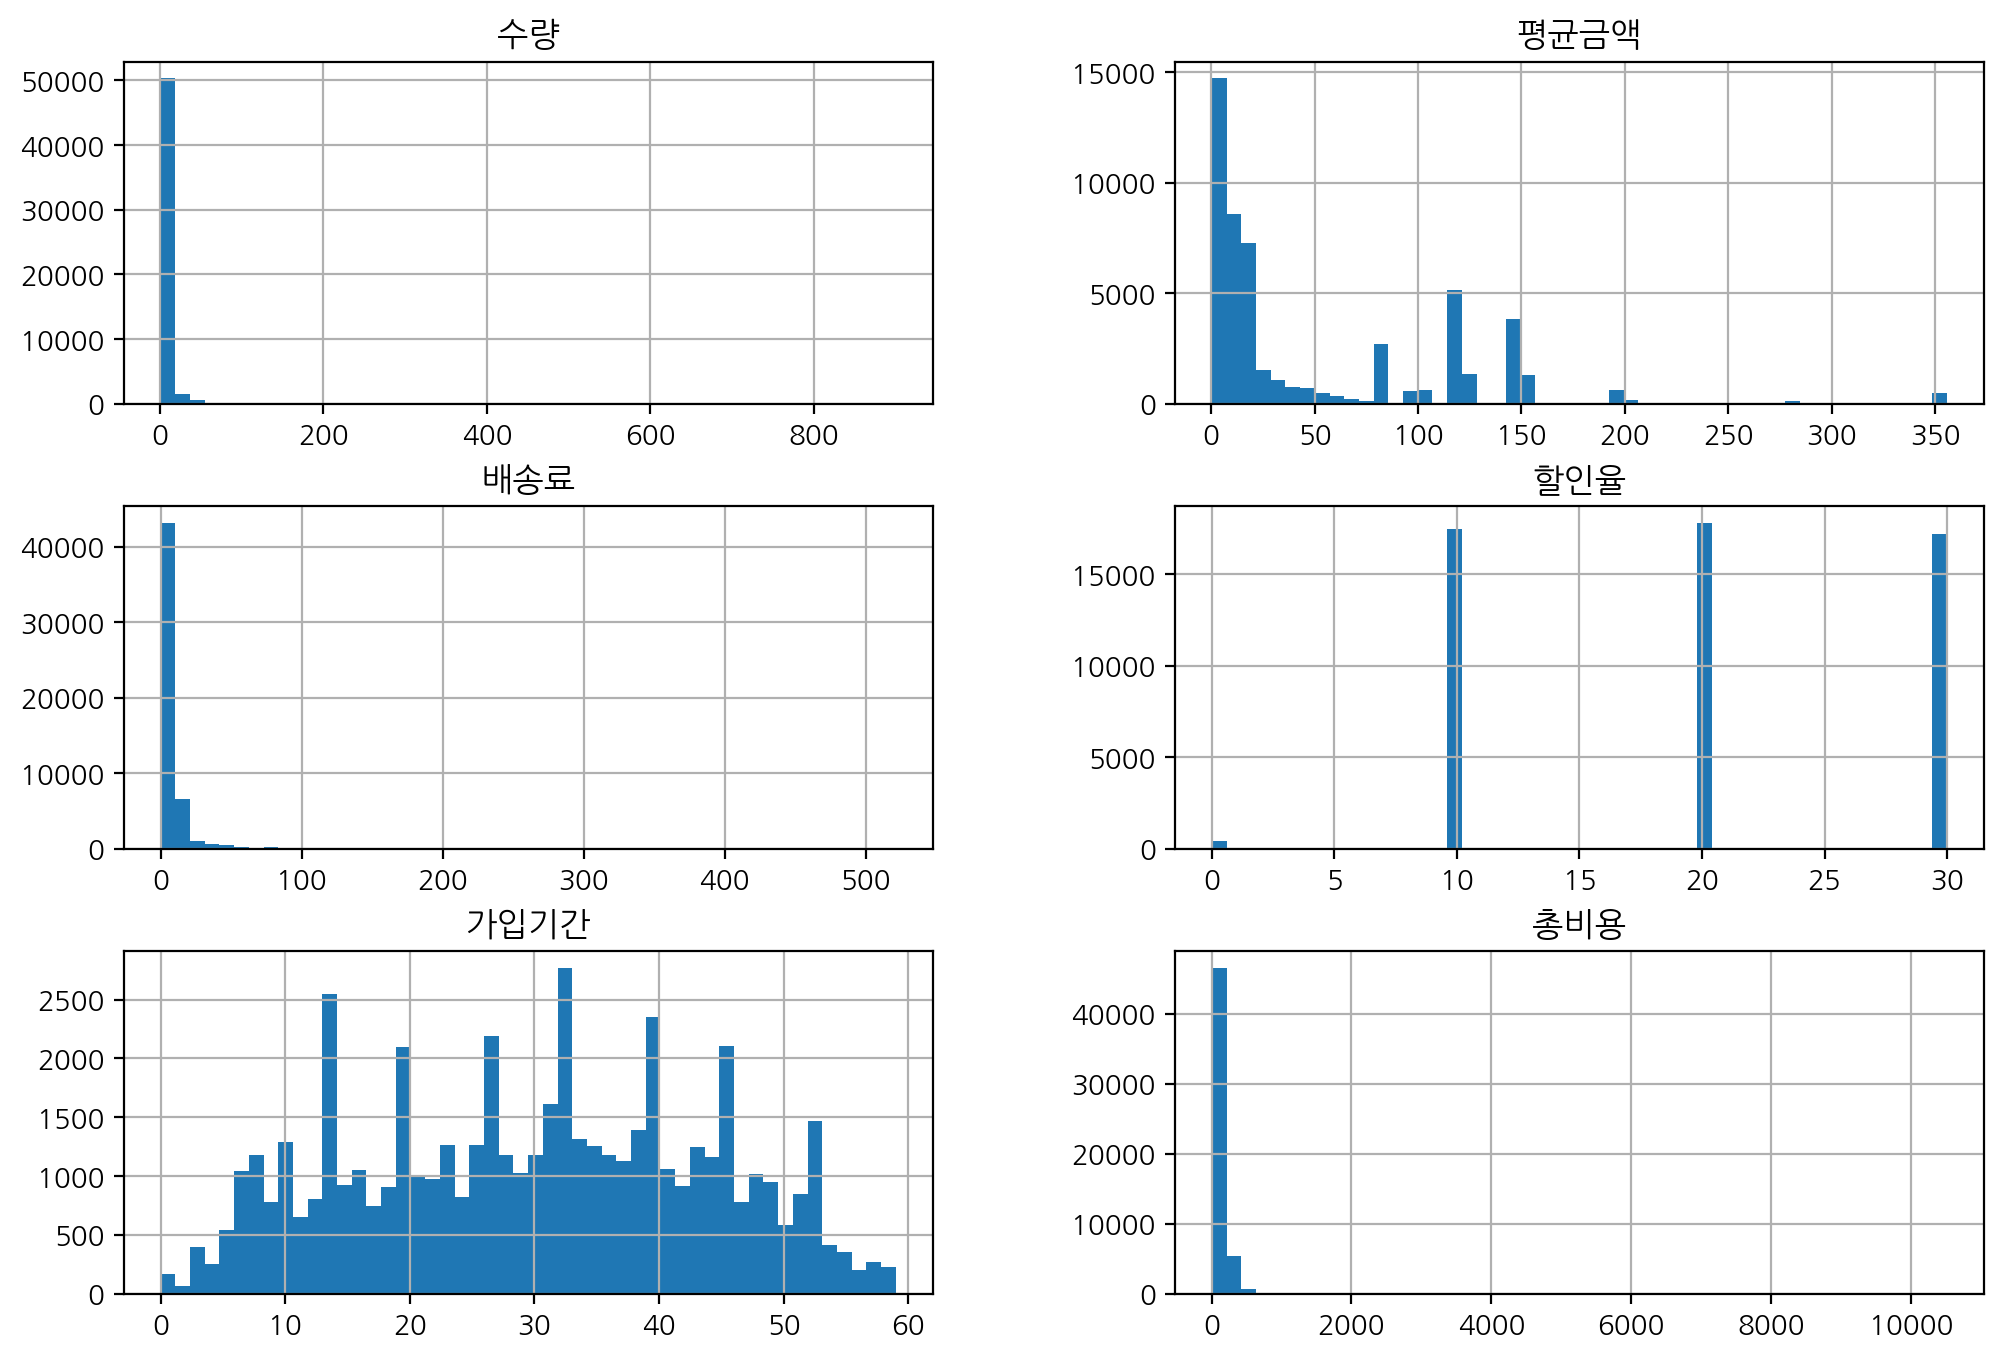

In [208]:
os_df.hist(bins=50, figsize=(12, 8));

### 총 비용 파생 컬럼 생성

In [56]:
os_df['총비용'] = os_df.평균금액 * os_df.수량 + os_df.배송료
os_df.head()

고객ID              거래ID        거래날짜          제품ID    제품카테고리  수량  \
0  USER_1358  Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1  USER_1358  Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2  USER_1358  Transaction_0002  2019-01-01  Product_0904    Office   1   
3  USER_1358  Transaction_0003  2019-01-01  Product_0203   Apparel   5   
4  USER_1358  Transaction_0003  2019-01-01  Product_0848      Bags   1   

     평균금액  배송료      쿠폰상태    월   요일    쿠폰코드   할인율 성별     고객지역  가입기간     총비용  
0  153.71  6.5      Used  Jan  Tue  ELEC10  10.0  남  Chicago    10  160.21  
1  153.71  6.5      Used  Jan  Tue  ELEC10  10.0  남  Chicago    10  160.21  
2    2.05  6.5      Used  Jan  Tue   OFF10  10.0  남  Chicago    10    8.55  
3   17.53  6.5  Not Used  Jan  Tue  SALE10  10.0  남  Chicago    10   94.15  
4   16.50  6.5      Used  Jan  Tue   AIO10  10.0  남  Chicago    10   23.00

### 지역별 판매 비용 확인하기
가장 높은 지역과 낮은 지역 비교하기

In [57]:
os_df.고객지역.nunique()

5

In [58]:
os_df.groupby("고객지역")["총비용"].agg(
    ["mean", "sum"]).nlargest(10, "sum").style.format("{:,.0f}")
# chicage>california>new york>new jersey> washington DC 순으로 많음
# mean은 큰 차이를 가지고 있지 않음

In [214]:
import matplotlib.font_manager as fm

# 설치된 폰트 리스트 출력
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 'Nanum'이 포함된 폰트의 경로 찾기
nanum_font_list = [f for f in font_list if 'Nanum' in f]
print(nanum_font_list)

['C:\\Windows\\Fonts\\NanumGothicBold.ttf', 'C:\\Windows\\Fonts\\NanumMyeongjoBold.ttf', 'C:\\Windows\\Fonts\\NanumGothicLight.ttf', 'C:\\Windows\\Fonts\\NanumMyeongjo.ttf', 'C:\\Windows\\Fonts\\NanumMyeongjoExtraBold.ttf', 'C:\\Windows\\Fonts\\NanumGothicExtraBold.ttf', 'C:\\Windows\\Fonts\\NanumGothic.ttf']


C:\Users\kjh25\AppData\Local\Temp\ipykernel_14192\2559865260.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.index, y=top_regions['sum'], palette='viridis')


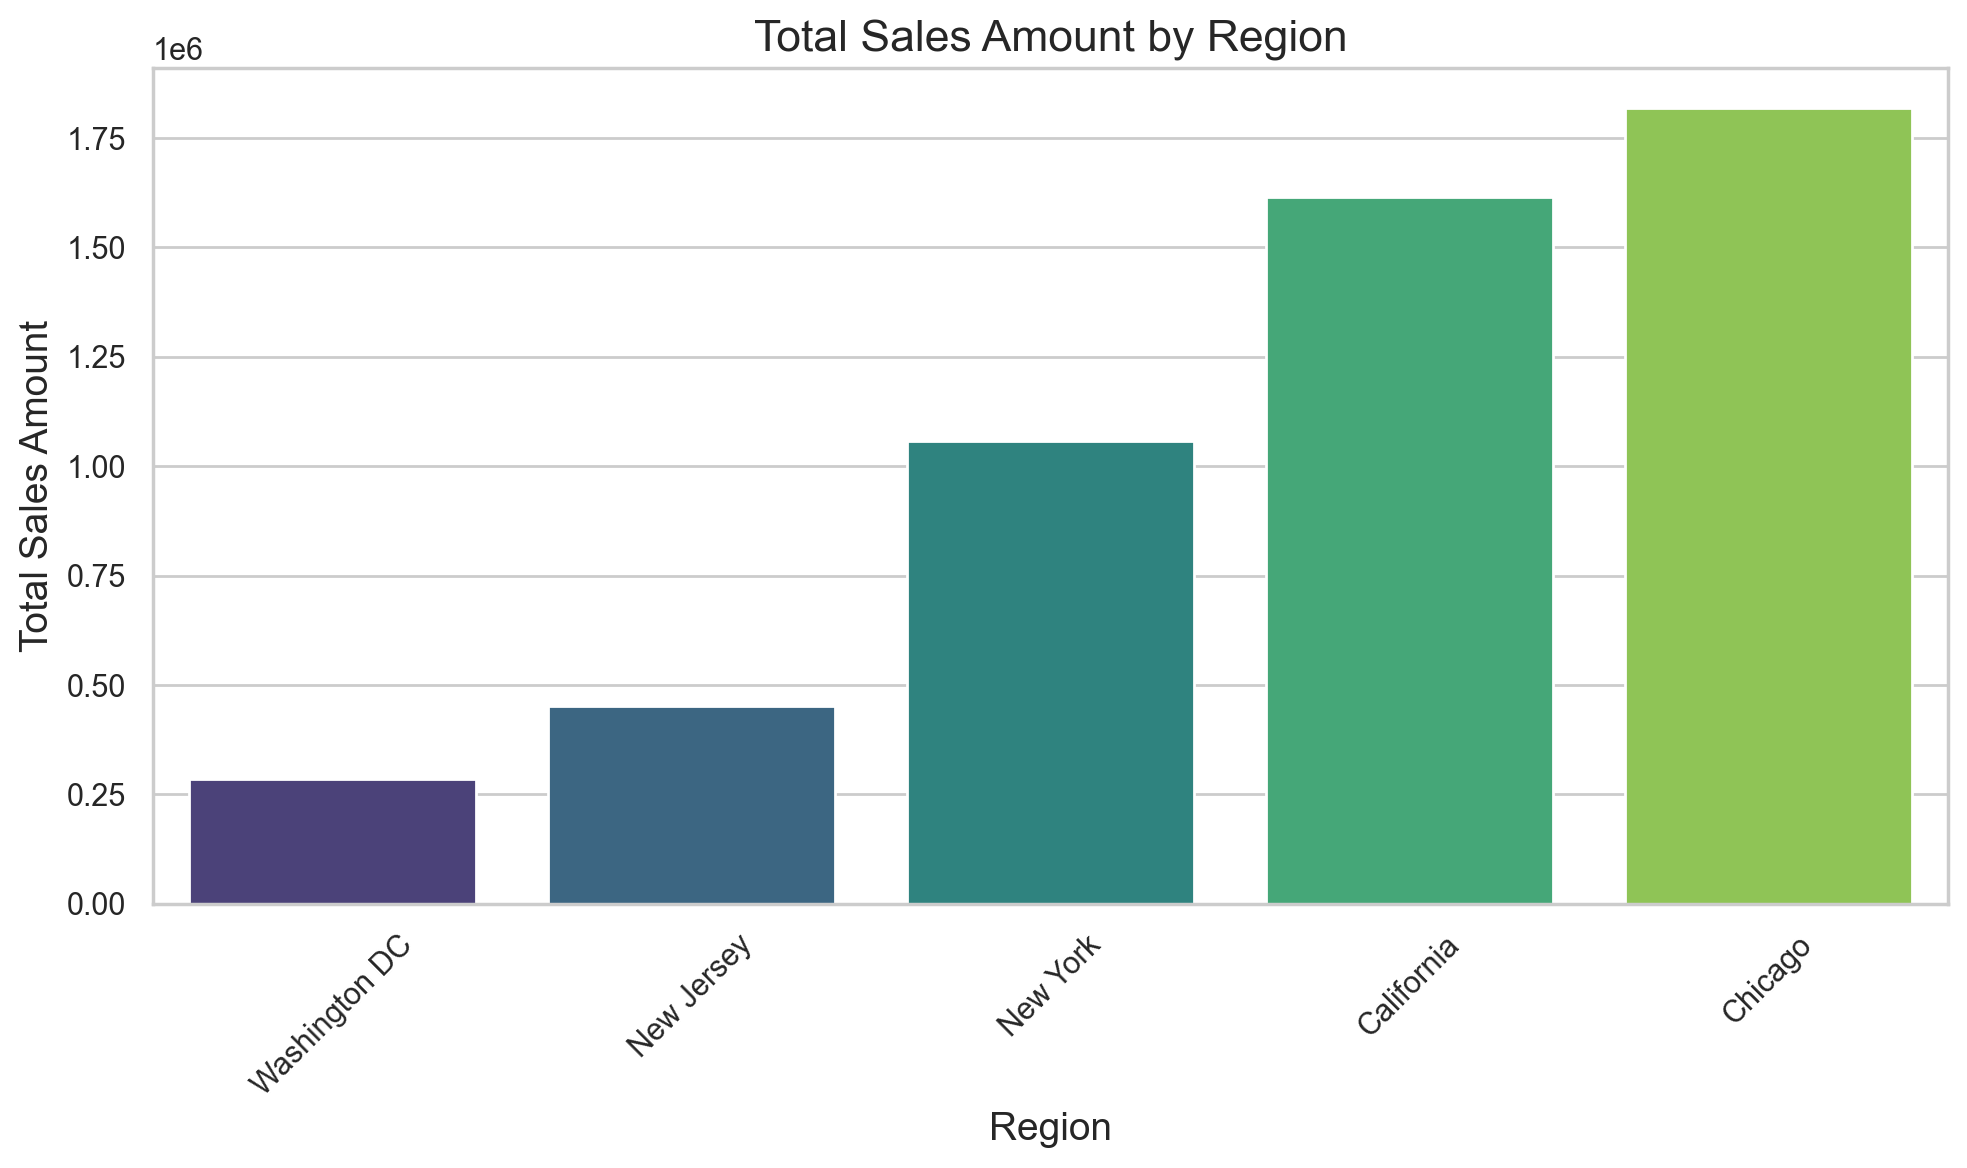

In [218]:
# import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm, rc

# Seaborn 스타일 설정
sns.set(style="whitegrid")

# 데이터 준비 (이 부분은 이미 준비된 데이터를 사용한다고 가정합니다)
top_regions = os_df.groupby("고객지역")["총비용"].agg(["mean", "sum"]).sort_values(by='sum')

# 크기 조정
plt.figure(figsize=(10, 6))

# Seaborn의 barplot 사용
sns.barplot(x=top_regions.index, y=top_regions['sum'], palette='viridis')

# 제목 및 라벨 설정
plt.title('Total Sales Amount by Region', fontsize=16)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.xlabel('Region', fontsize=14)

# x축 라벨 회전
plt.xticks(rotation=45)

# 그래프 표시
plt.tight_layout()
plt.show()


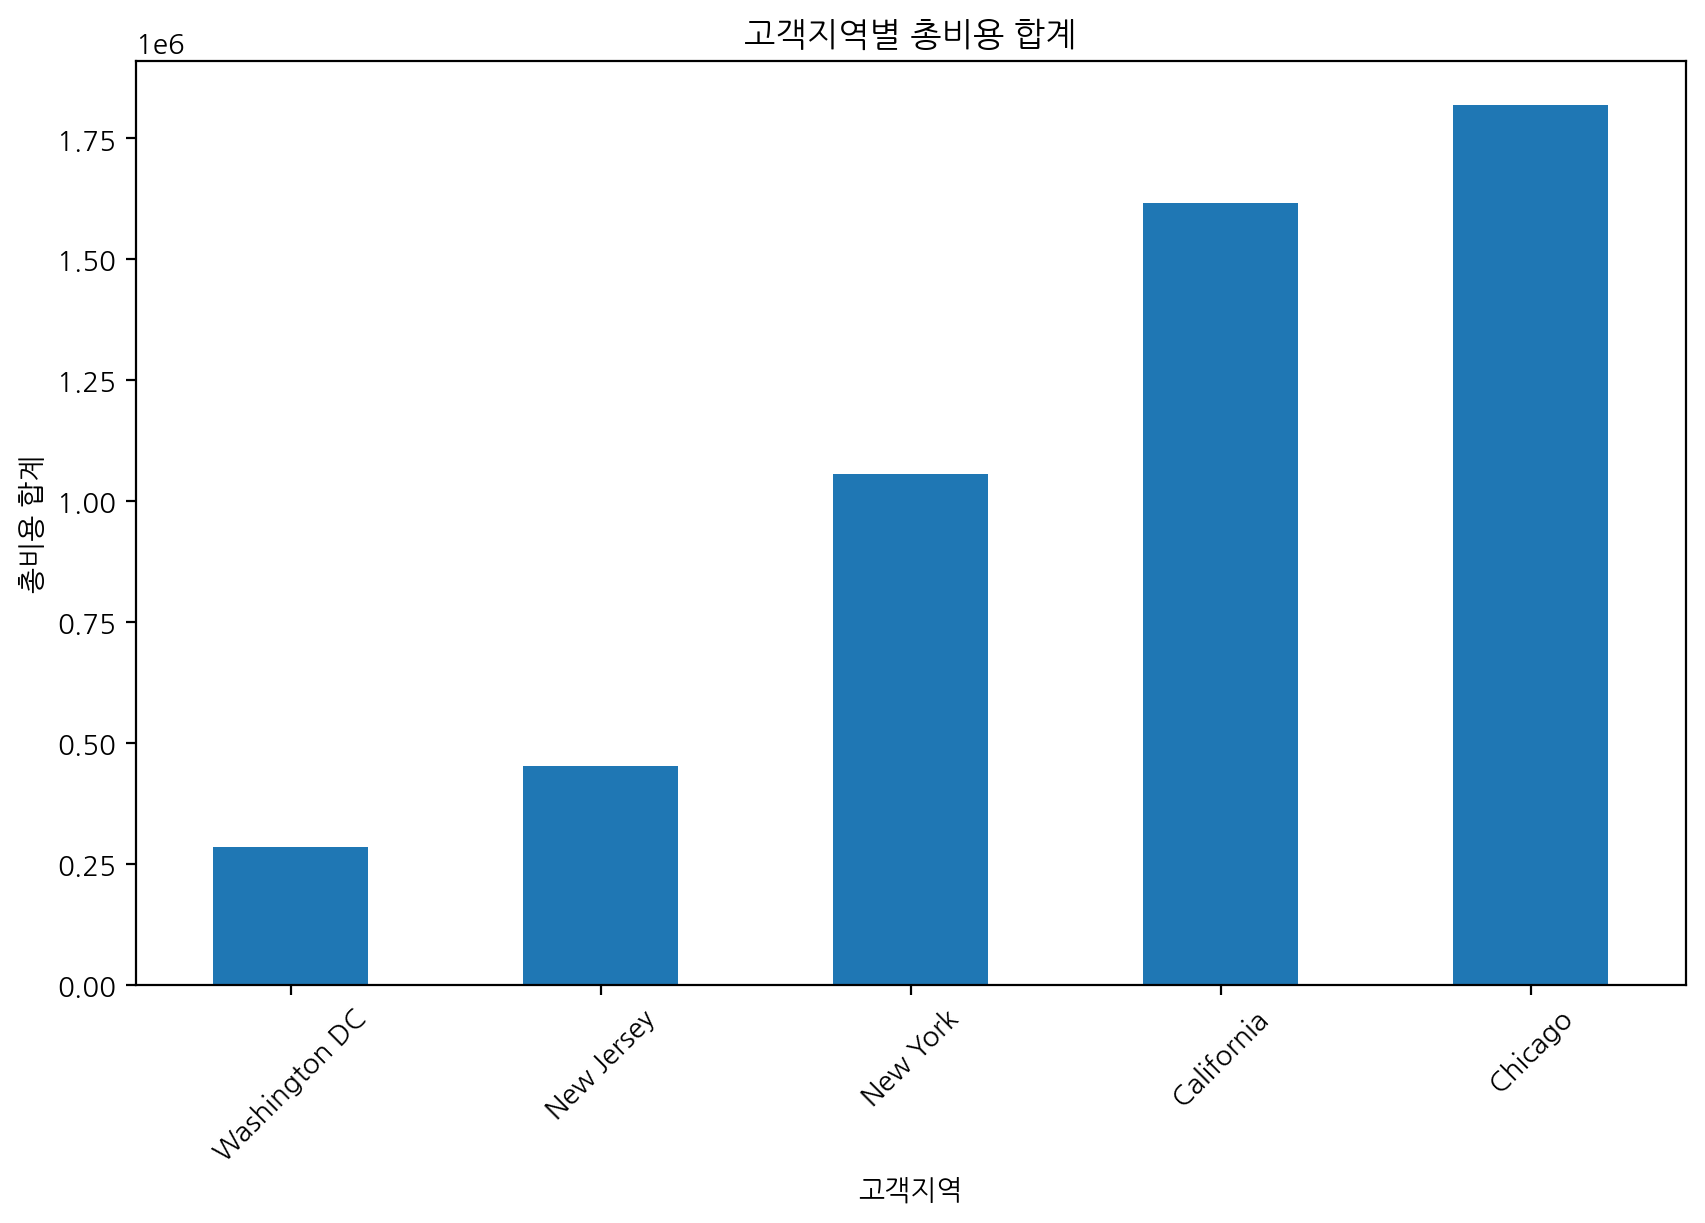

In [59]:
top_regions = os_df.groupby("고객지역")["총비용"].agg(["mean", "sum"]).sort_values(by='sum')

top_regions['sum'].plot(kind='bar', figsize=(10, 6))

plt.title('지역별 총 구매 금액')
plt.ylabel('총비용 합계')
plt.xlabel('고객지역')
plt.xticks(rotation=45)
plt.show()
# 상위 지역과 하위 지역의 차이가 큰 것을 확인. 인구수에도 영향이 있을지도?

- 시카고 (Chicago):              약  2,693,976명
- 캘리포니아 (California):       약 39,512,223명
- 뉴욕 (New York City):          약  8,336,817명
- 뉴저지 (New Jersey):           약  8,882,190명
- 워싱턴 D.C. (Washington D.C.): 약    705,749명

다른 애들은 인구 수에도 영향을 받은 거 같은데 시카고만 왜 인구수 대비 판매 금액이 많을까,,
1. 지역별 카테고리의 차이가 있지 않을까?
2. 지역별 가입 고객 수에 차이가 있지 않을까? 

#### 1. 지역별 카테고리의 차이가 있지 않을까?
지역별 품목 차이가 크지 않아 품목이 지역차에 영향을 주지는 않는 것 같다
-> 왜 시카고가 인구수 대비 총비용이 큰 걸까,, 
-> 2번 분석 진행

##### 시카고

In [188]:
chicago = os_df[os_df.고객지역 == 'Chicago']
chicago_pivot = pd.pivot_table(data=chicago,
               index='제품카테고리',
               aggfunc='sum').sort_values(by = '총비용', ascending=False)
# 수량은 office, Drinkware, Apparel, Lifestyle, Nest_USA 순
# 총 비용은 Nest-USA, Apparel, NEST, office, Drinkware 순

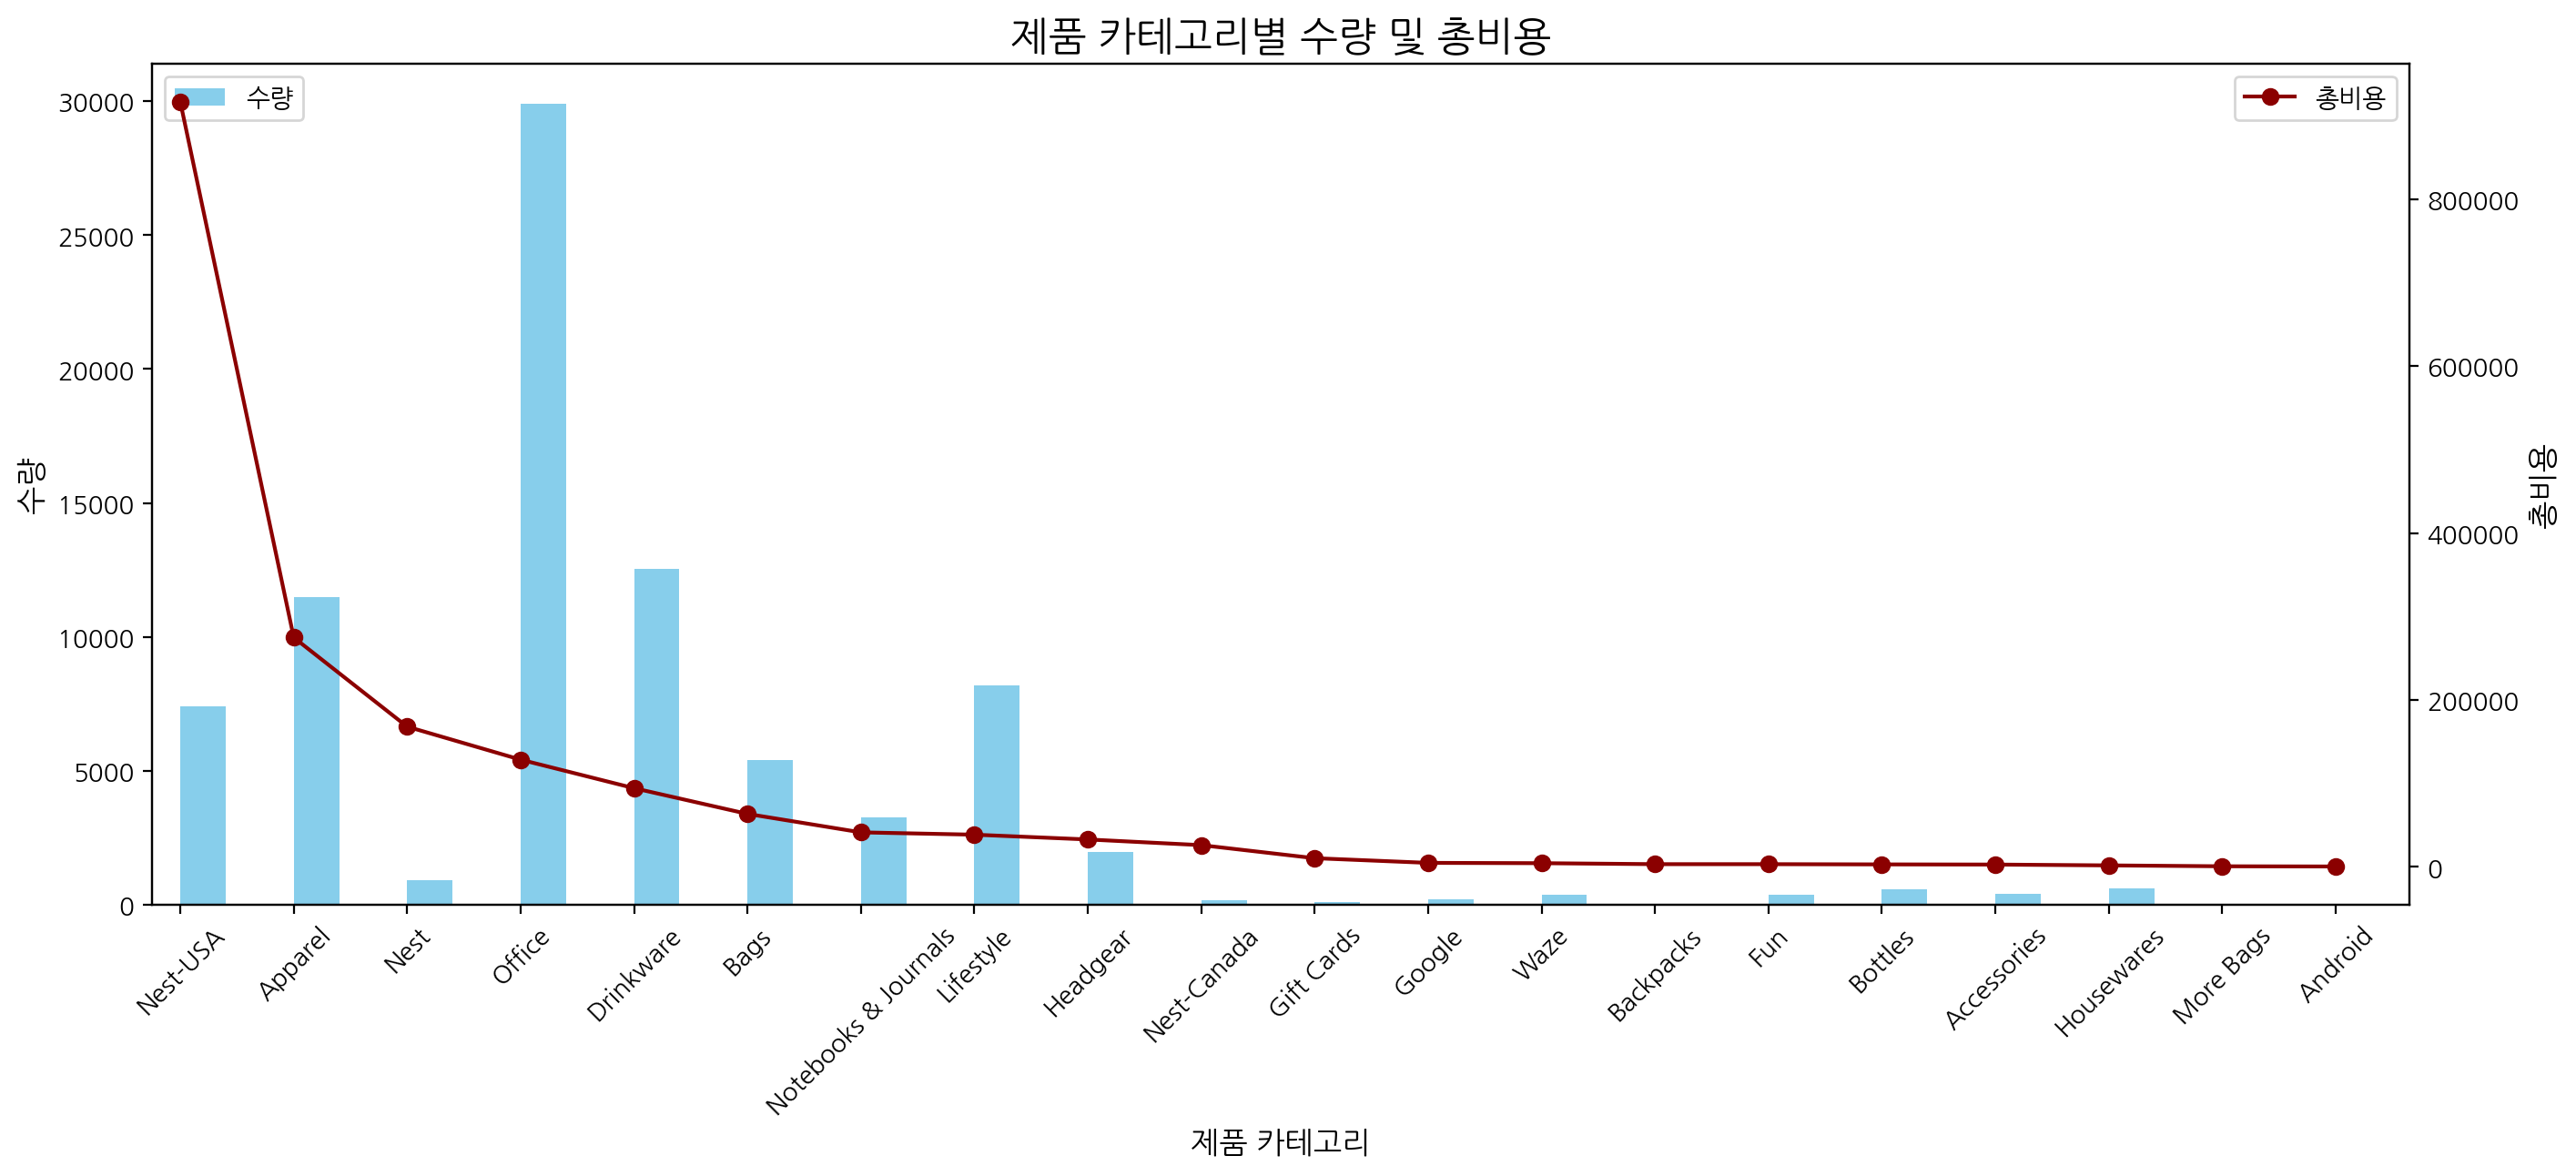

In [189]:
# '수량'에 대한 바 그래프 그리기
ax = chicago_pivot['수량'].plot(kind='bar', color='skyblue', figsize=(16, 6), width=0.4, position=0)

# '총비용'에 대한 라인 그래프 그리기
chicago_pivot['총비용'].plot(kind='line', marker='o', secondary_y=True, color='darkred', ax=ax)

ax.set_title('제품 카테고리별 수량 및 총비용', fontsize=16)
ax.set_xlabel('제품 카테고리', fontsize=12)
ax.set_ylabel('수량', fontsize=12)
ax.right_ax.set_ylabel('총비용', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax.legend(['수량'], loc='upper left')
ax.right_ax.legend(['총비용'], loc='upper right')


plt.show()

- Nest-USA, NEST는 판매 수량에 비해 판매 비용이 높음
- office는 판매량은 많으나 총 비용이 판매량에 비해 낮음
- Apparel이 판매량과 총 비용이 정비례함

##### 워싱턴

In [194]:
Washington = os_df[os_df.고객지역 == 'Washington DC']
Washington_pivot = pd.pivot_table(data=Washington,
                                  index='제품카테고리',
                                  values=['수량', '총비용'],  # 집계할 열 명시
                                  aggfunc='sum').sort_values(by='총비용', ascending=False)
Washington_pivot

# 수량은 office, Apparel, Bags, Lifestyle, Nest_USA 순
# 총 비용은 Nest-USA, Apparel, NEST, office, Bags 순
# 흠,, 시카고랑은 별반 다르지 않은데 왜 시카고의 총 금액이 훨 비쌀까,,

수량        총비용
제품카테고리                               
Nest-USA              1240  150902.08
Apparel               1882   40193.98
Nest                   149   29999.59
Office                4761   20310.74
Bags                  1372   11580.33
Drinkware              796    9028.59
Lifestyle             1312    6430.32
Nest-Canada             30    4761.31
Headgear               184    4042.57
Notebooks & Journals   250    3570.27
Waze                    53     962.94
Bottles                 94     457.86
Backpacks                4     424.42
Fun                     19     392.19
Housewares             130     367.34
Gift Cards               1     250.00
Google                  10     189.15
Accessories             14     123.31
More Bags                1      24.09
Android                  1      21.99

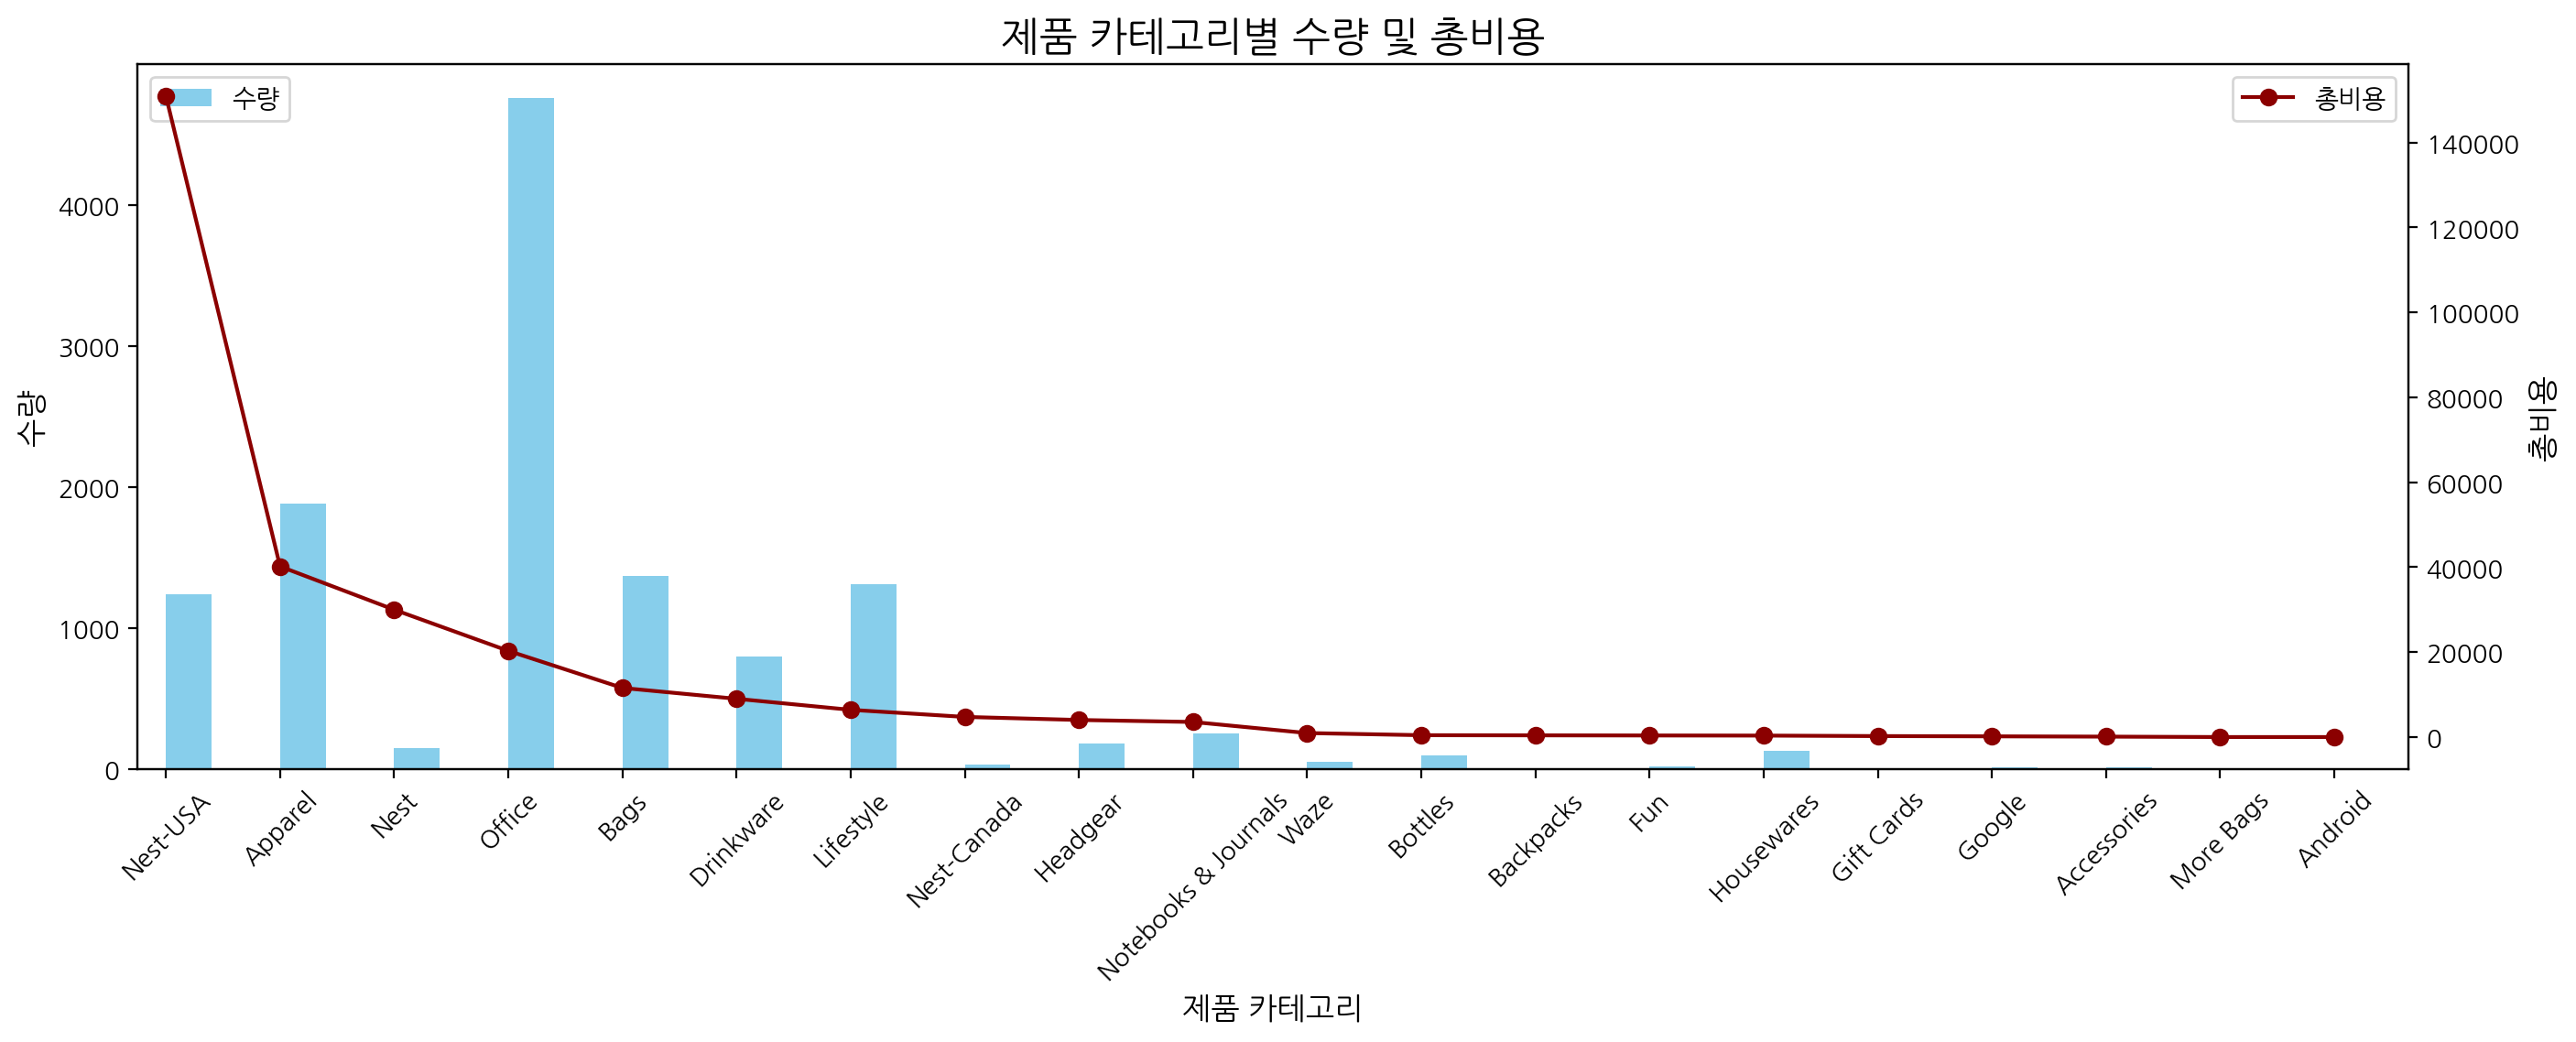

In [195]:
# '수량'에 대한 바 그래프 그리기
ax = Washington_pivot['수량'].plot(kind='bar', color='skyblue', figsize=(16, 5), width=0.4, position=0)

# '총비용'에 대한 라인 그래프 그리기
Washington_pivot['총비용'].plot(kind='line', marker='o', secondary_y=True, color='darkred', ax=ax)

ax.set_title('제품 카테고리별 수량 및 총비용', fontsize=16)
ax.set_xlabel('제품 카테고리', fontsize=12)
ax.set_ylabel('수량', fontsize=12)
ax.right_ax.set_ylabel('총비용', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax.legend(['수량'], loc='upper left')
ax.right_ax.legend(['총비용'], loc='upper right')


plt.show()

##### 캘리포니아

In [192]:
California = os_df[os_df.고객지역 == 'California']
California_pivot = pd.pivot_table(data=California,
               index='제품카테고리',
               values=['수량', '총비용'],
               aggfunc='sum').sort_values(by = '총비용', ascending=False)
California_pivot
# 수량의 경우 office>Apparel> Drinkware> Lifestyle> Nest-USA
# 총 비용의 경우 Nest-USA> Apparel> Nest> office> Drinkware

수량        총비용
제품카테고리                                
Nest-USA               6387  793976.90
Apparel                9669  226271.07
Nest                   1019  188346.15
Office                26465  112488.92
Drinkware              9231   85152.26
Notebooks & Journals   4088   55157.86
Bags                   4495   52422.07
Lifestyle              6710   34684.52
Nest-Canada             144   21761.85
Headgear                876   14150.51
Accessories             461    5316.75
Bottles                 826    4034.05
Google                  207    4033.34
Gift Cards               39    3793.77
Housewares             1430    3737.57
Backpacks                36    3231.10
Waze                    252    2945.37
More Bags                88    1970.68
Fun                     140    1569.60
Android                  14     353.05

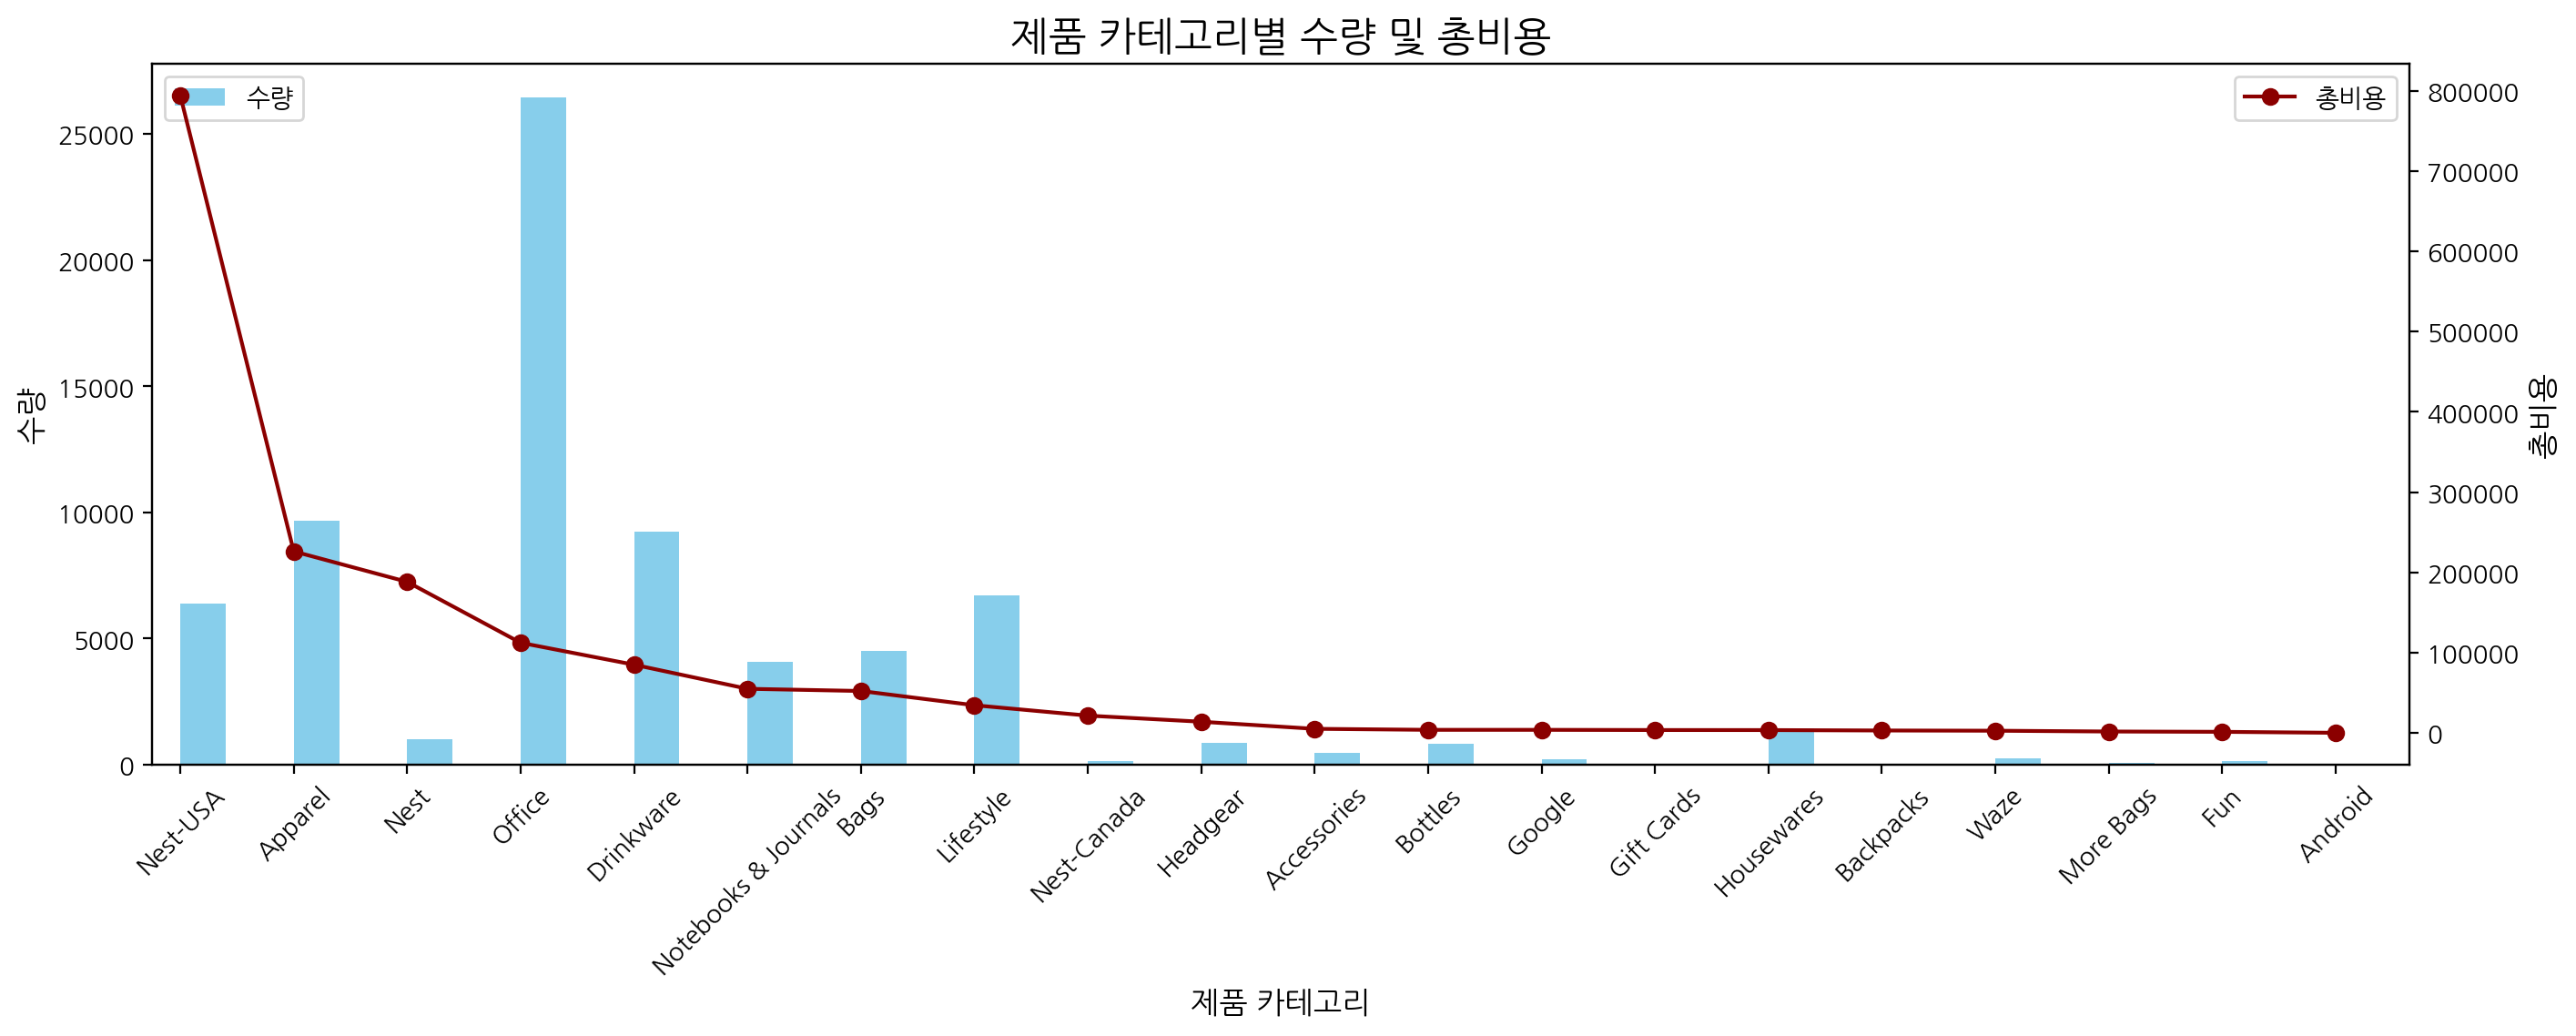

In [193]:
# '수량'에 대한 바 그래프 그리기
ax = California_pivot['수량'].plot(kind='bar', color='skyblue', figsize=(16, 5), width=0.4, position=0)

# '총비용'에 대한 라인 그래프 그리기
California_pivot['총비용'].plot(kind='line', marker='o', secondary_y=True, color='darkred', ax=ax)

ax.set_title('제품 카테고리별 수량 및 총비용', fontsize=16)
ax.set_xlabel('제품 카테고리', fontsize=12)
ax.set_ylabel('수량', fontsize=12)
ax.right_ax.set_ylabel('총비용', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax.legend(['수량'], loc='upper left')
ax.right_ax.legend(['총비용'], loc='upper right')


plt.show()

#### 2. 지역별 가입 고객 수에 차이가 있지 않을까? 

In [206]:
pd.pivot_table(data=os_df.drop_duplicates(subset='고객ID'), index='고객지역', values='고객ID', aggfunc='count')

고객ID
고객지역               
California      464
Chicago         456
New Jersey      149
New York        324
Washington DC    75

chicage 사람들이 가장 많이 이용을 하고 있었음,, 
인구수 대비 이용자가 적은 캘리포니아를 타겟으로 마케팅을 할 수 있지 않을까?

### 월별 구매 발생 count

<Axes: xlabel='월', ylabel='count'>

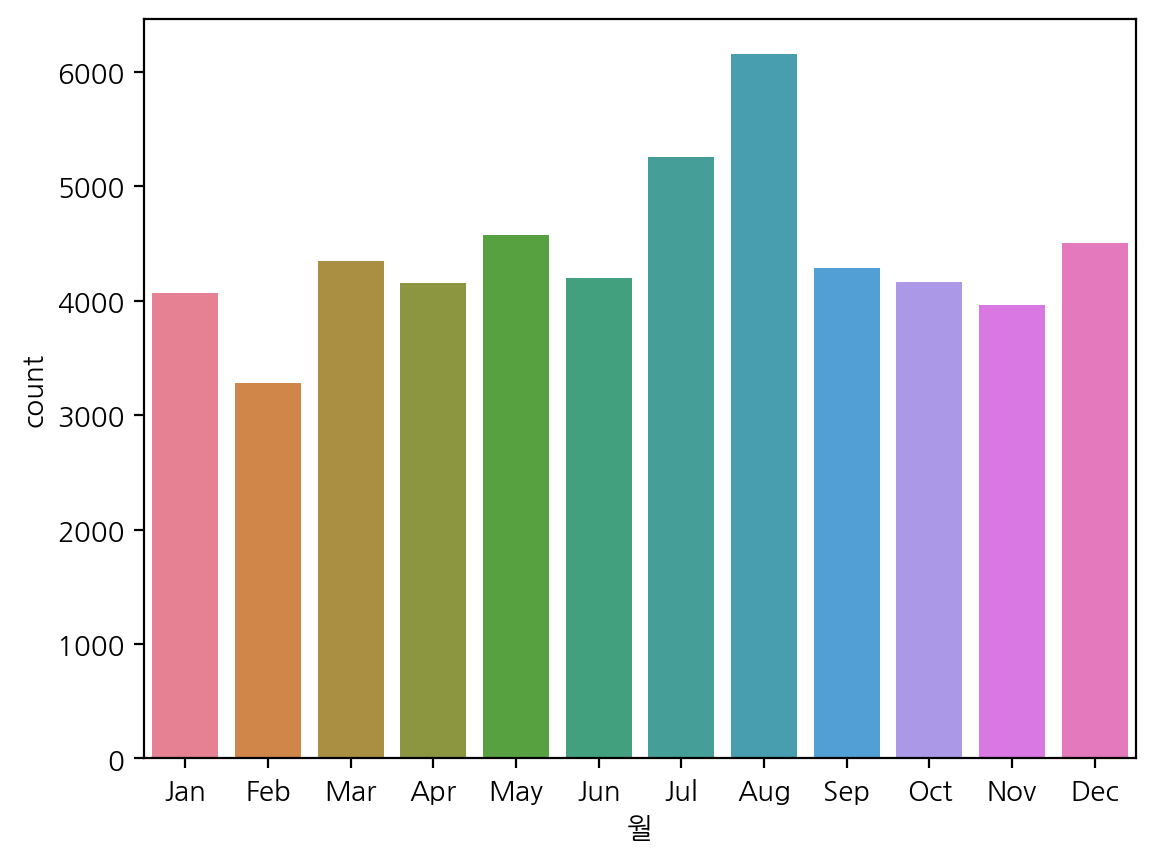

In [66]:
sns.countplot(data=os_df, x="월", hue='월')

7, 8월에 판매량이 높은 이유가 있을까?

### 요일별 구매 발생 count

In [68]:
os_df.요일.unique()

array(['Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon'], dtype=object)

<Axes: xlabel='요일', ylabel='count'>

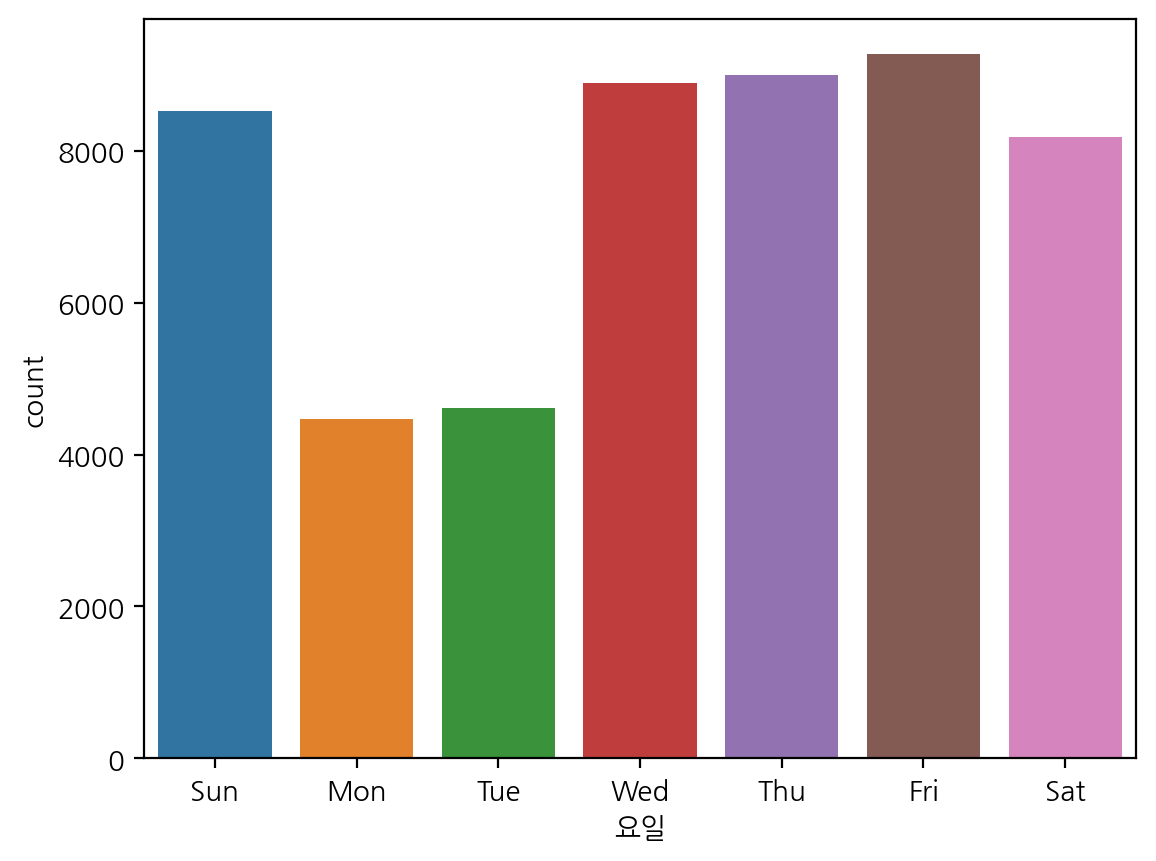

In [207]:
os = os_df.copy()
요일_순서 = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

os['요일'] = pd.Categorical(os['요일'], categories=요일_순서, ordered=True)

sns.countplot(data=os, x="요일", hue = '요일')

월요일과 화요일에 주문 발생 건수가 다른 날에 비해 50프로 정도 적은 것을 확인할 수 있음

### 요일-월 빈도수

In [201]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov"]
os = os_df.copy()
os['월'] = pd.Categorical(os['월'], categories=month_order, ordered=True)


week_month = pd.crosstab(os["월"], os["요일"])

week_month.style.background_gradient(axis=None, cmap="Greens")

<Axes: xlabel='월'>

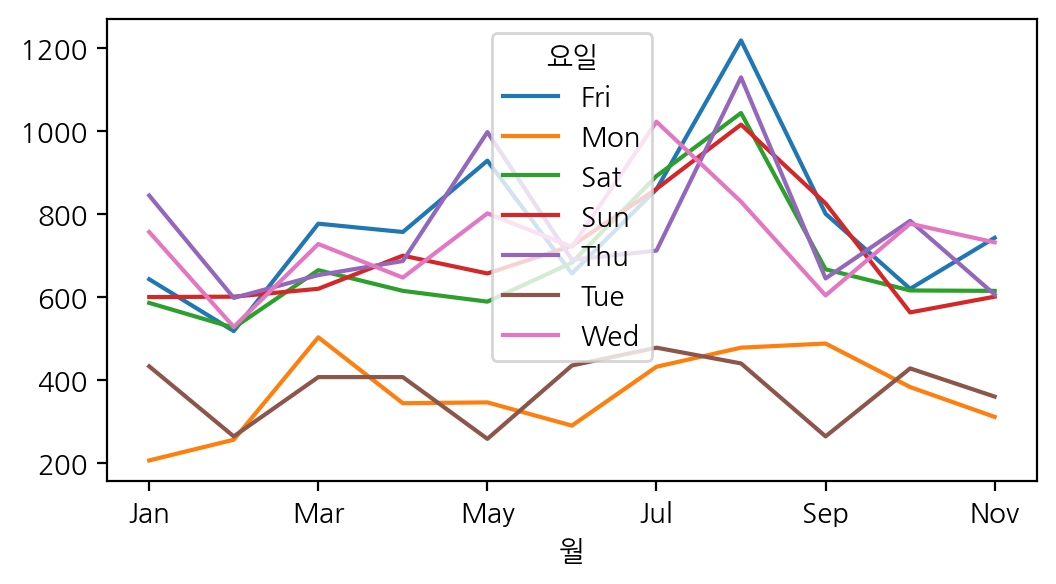

In [202]:
week_month.plot(figsize=(6, 3))

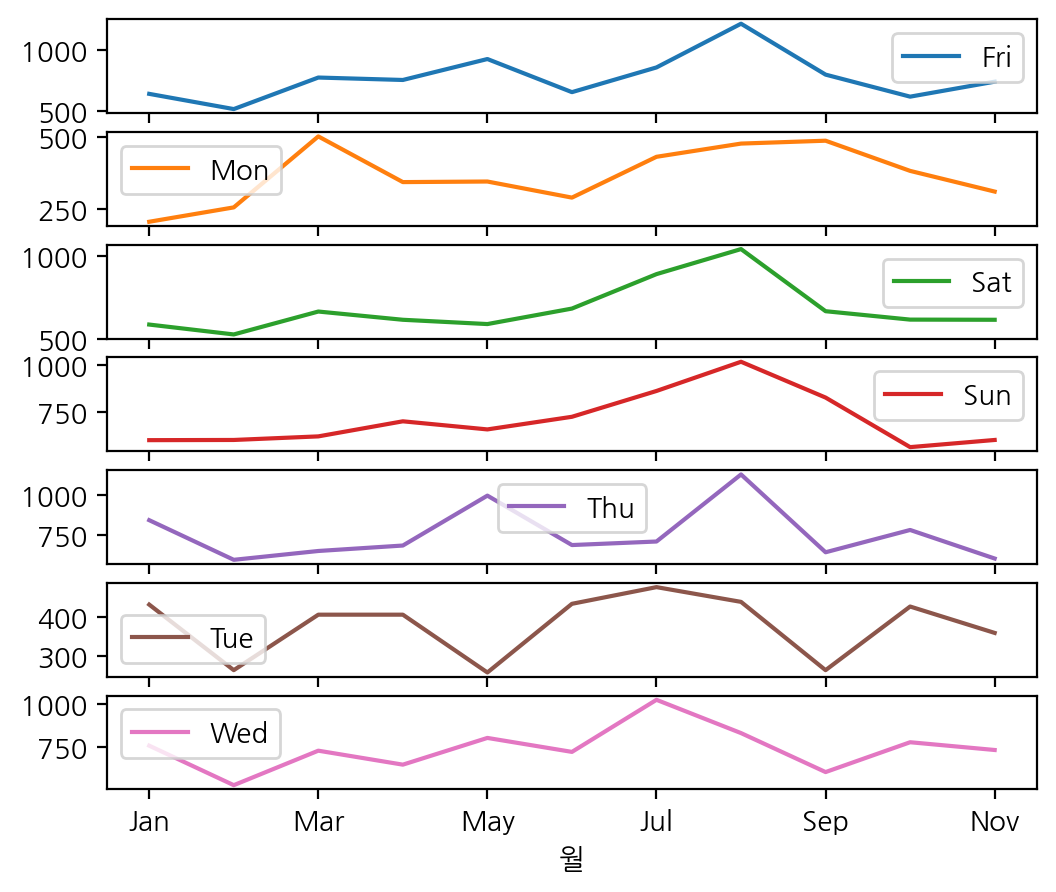

In [203]:
week_month.plot(figsize=(6, 5), subplots=True);

In [73]:
os_df.head()

고객ID              거래ID        거래날짜          제품ID    제품카테고리  수량  \
0  USER_1358  Transaction_0000  2019-01-01  Product_0981  Nest-USA   1   
1  USER_1358  Transaction_0001  2019-01-01  Product_0981  Nest-USA   1   
2  USER_1358  Transaction_0002  2019-01-01  Product_0904    Office   1   
3  USER_1358  Transaction_0003  2019-01-01  Product_0203   Apparel   5   
4  USER_1358  Transaction_0003  2019-01-01  Product_0848      Bags   1   

     평균금액  배송료      쿠폰상태    월   요일    쿠폰코드   할인율 성별     고객지역  가입기간     총비용  
0  153.71  6.5      Used  Jan  Tue  ELEC10  10.0  남  Chicago    10  160.21  
1  153.71  6.5      Used  Jan  Tue  ELEC10  10.0  남  Chicago    10  160.21  
2    2.05  6.5      Used  Jan  Tue   OFF10  10.0  남  Chicago    10    8.55  
3   17.53  6.5  Not Used  Jan  Tue  SALE10  10.0  남  Chicago    10   94.15  
4   16.50  6.5      Used  Jan  Tue   AIO10  10.0  남  Chicago    10   23.00

### 달별 판매 빈도 수

In [183]:
import seaborn as sns
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
def calendar_draw(month):
    calendar_padding = {'Jan': (2, 2), 'Feb': (5, 2), 'Mar': (5, 6), 'Apr': (1, 4), 'May': (3, 1), 'Jun': (6, 6), 
                        'Jul': (1, 3), 'Aug': (4, 0), 'Sep': (0, 5), 'Oct': (2, 2), 'Nov': (5, 0), 'Dec': (0, 4)}
    sale_cnt = pd.pivot_table(data=os_df[os_df.월 == month], index='거래날짜', values='총비용', aggfunc='count')
    if (month == 'Mar') or (month == 'Jun'):
        data = np.pad(sale_cnt.values, (calendar_padding[month], (0, 0)), 'constant', constant_values=(0, 0)).reshape(6, 7)
    else: data = np.pad(sale_cnt.values, (calendar_padding[month], (0, 0)), 'constant', constant_values=(0, 0)).reshape(5, 7)
    
    plt.figure(figsize=(10, 2))  # 히트맵의 크기를 설정합니다.
    sns.heatmap(data, annot=True, fmt=".0f", cmap='Blues')
    days = ['일', '월', '화', '수', '목', '금', '토']
    plt.xticks(np.arange(0, 7)+ 0.5, days)


    plt.title('{}월 판매 건수'.format(month_map[month]))
    plt.show()

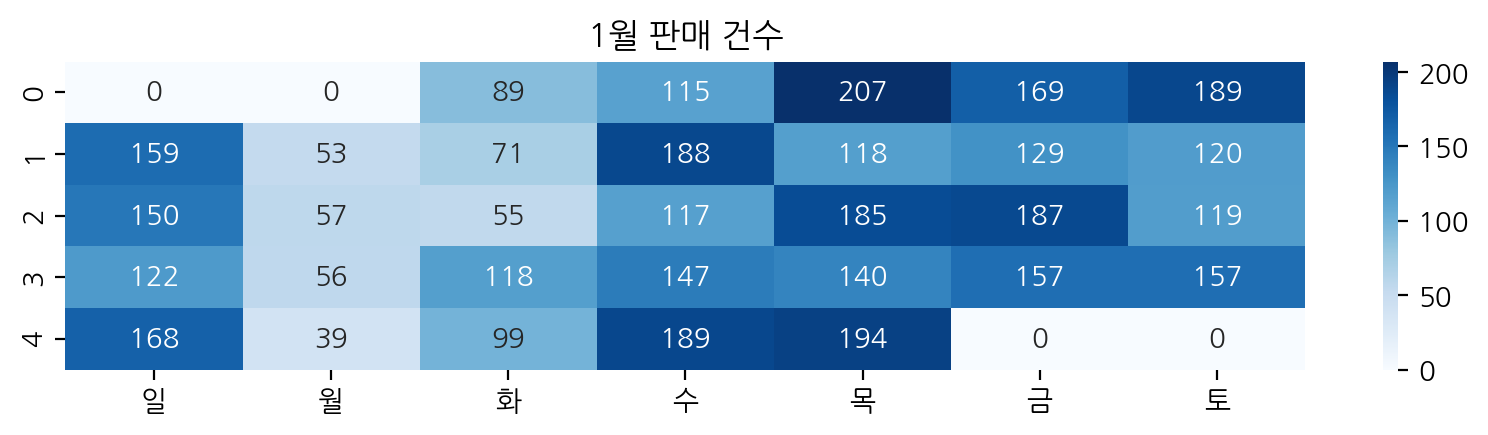

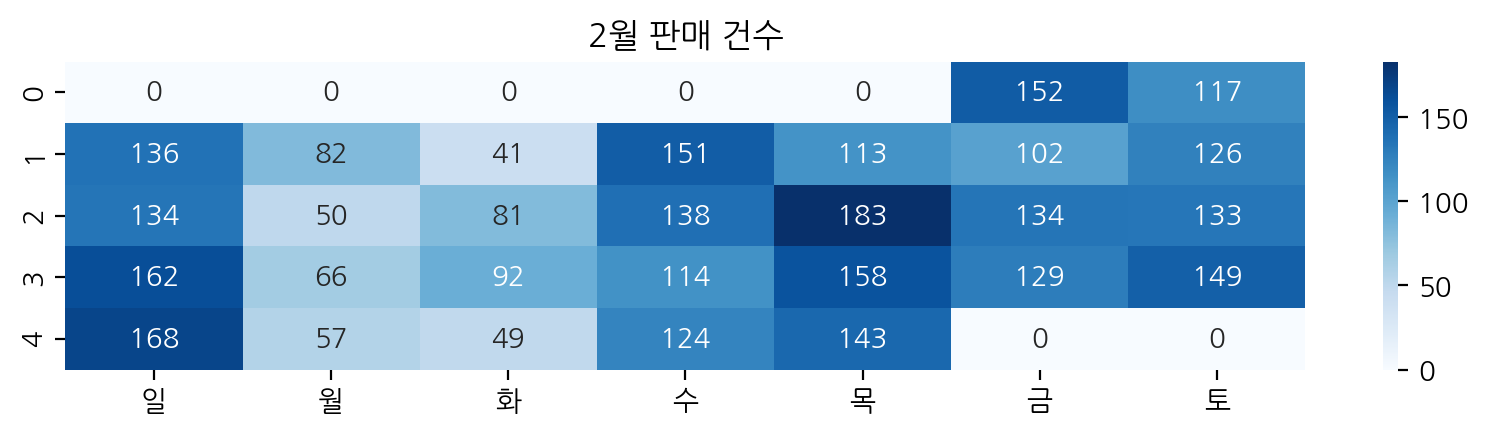

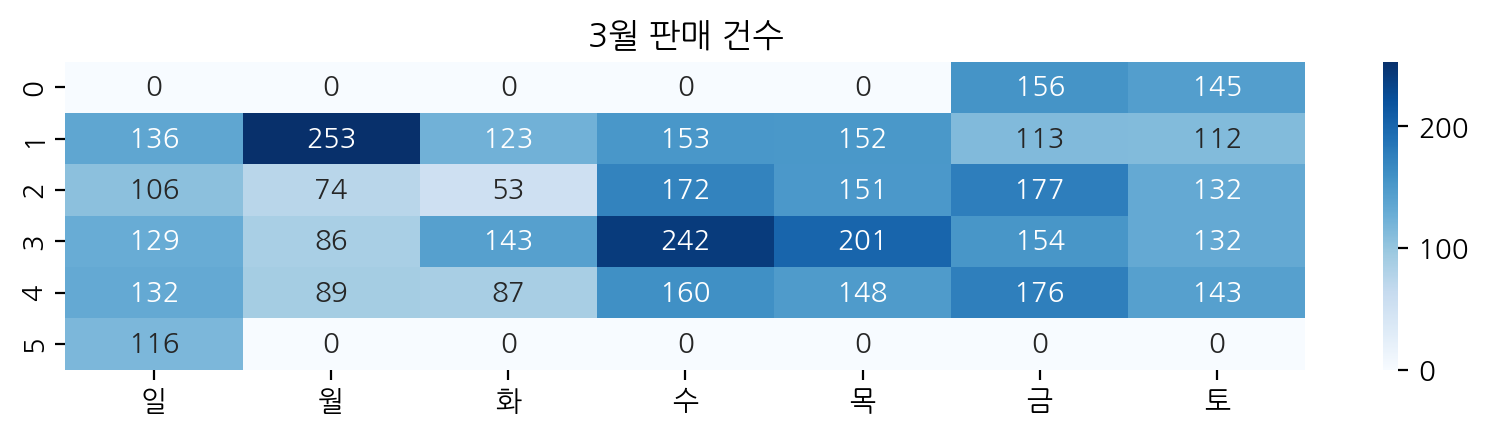

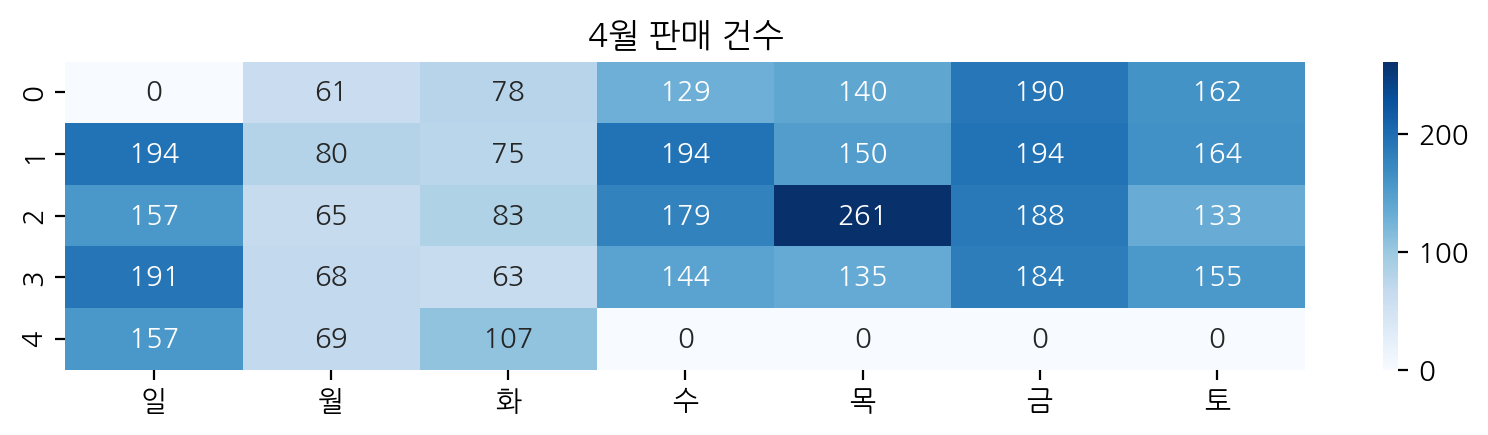

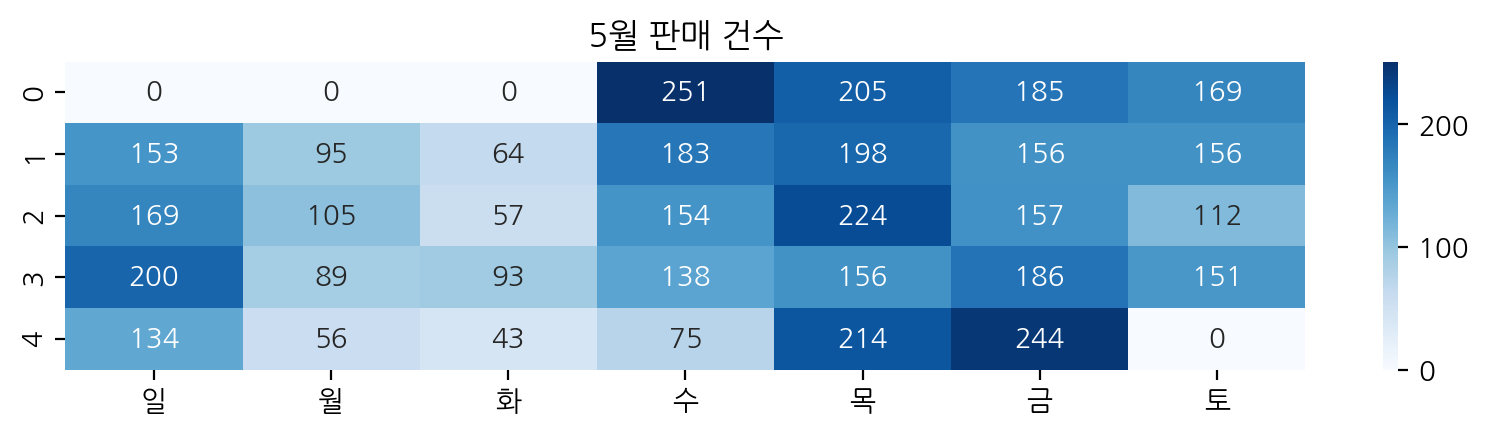

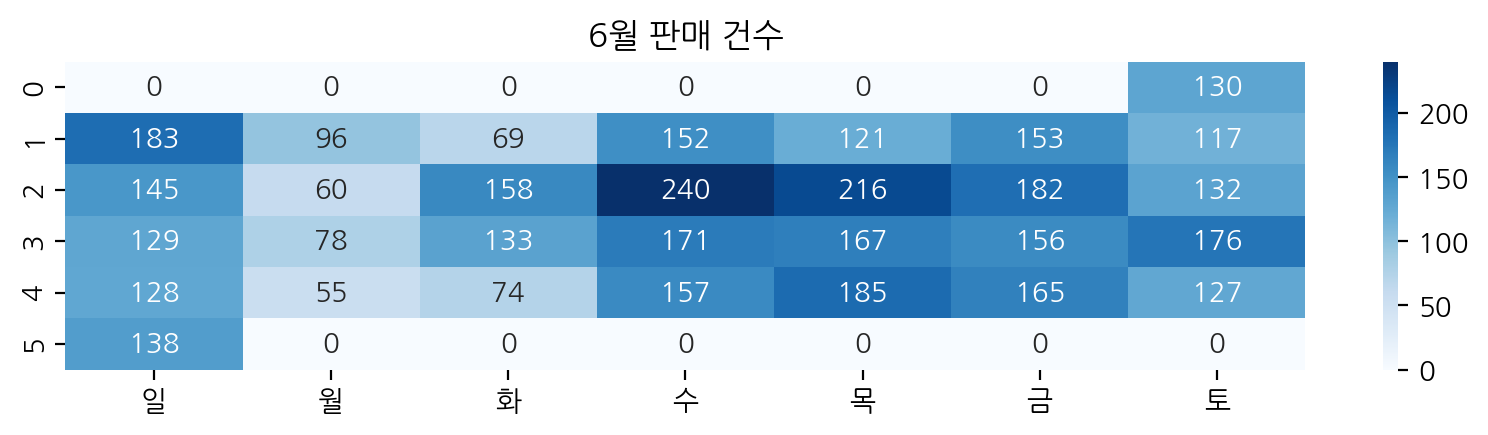

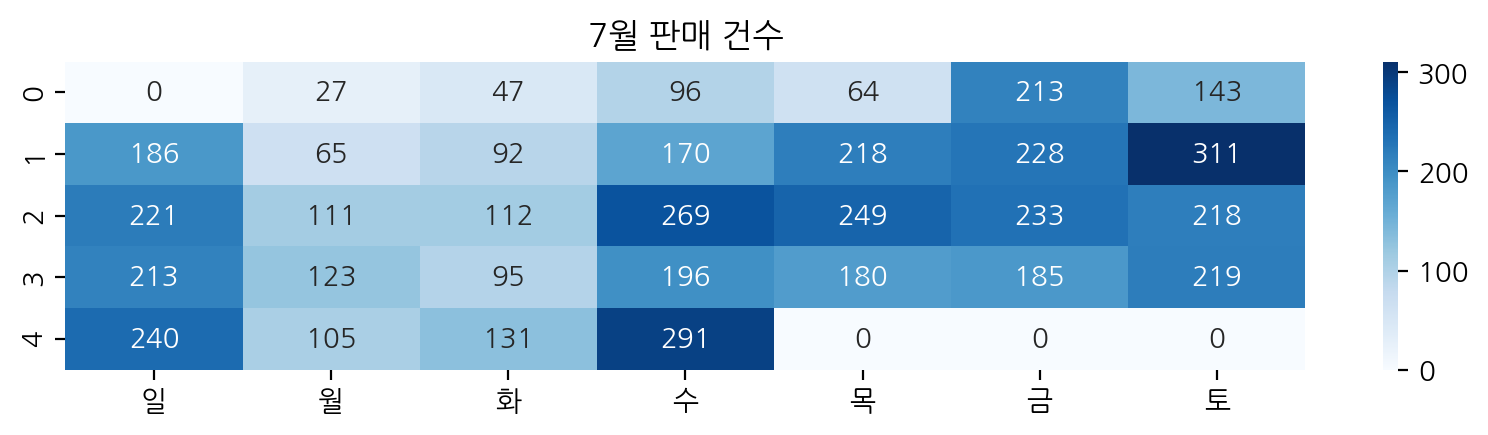

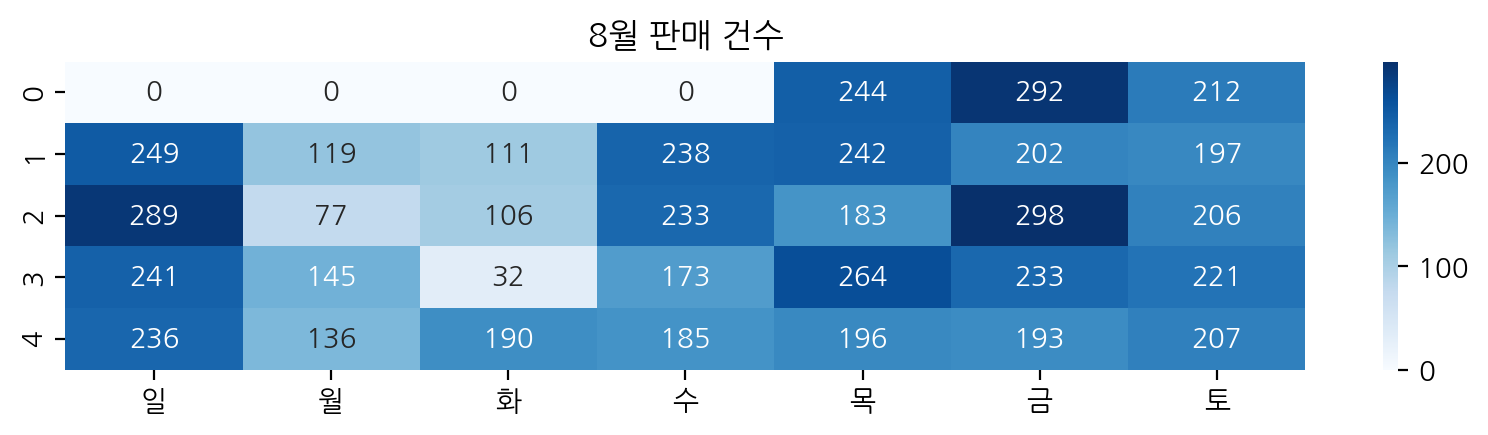

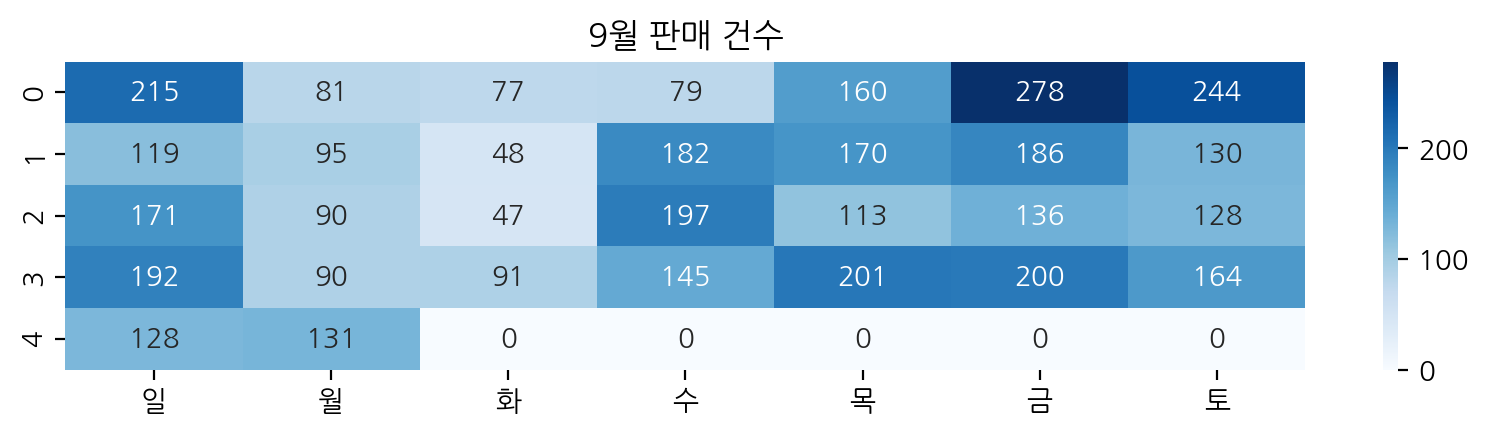

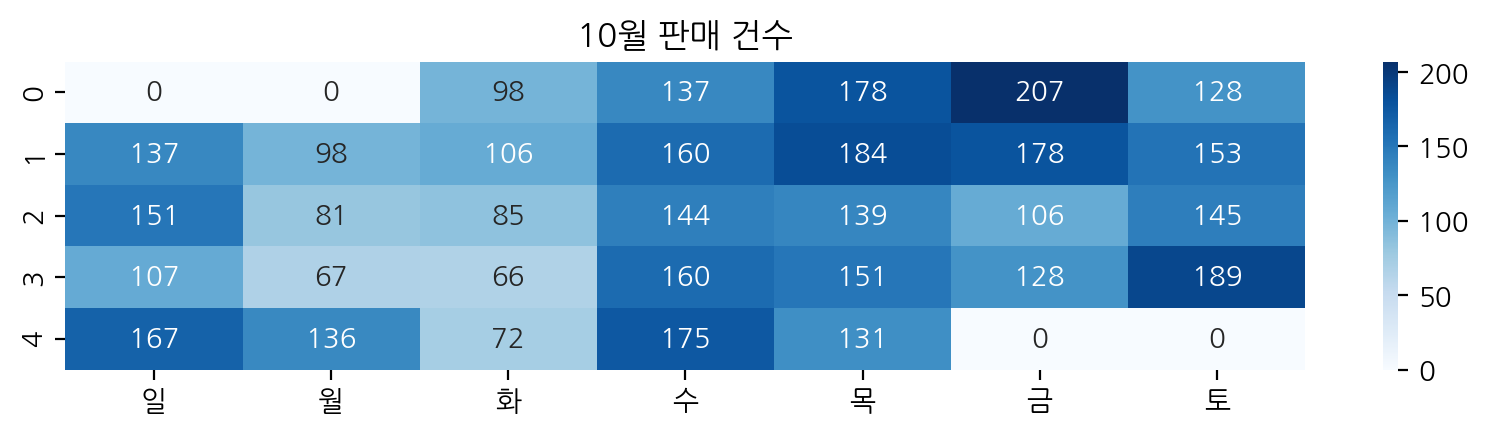

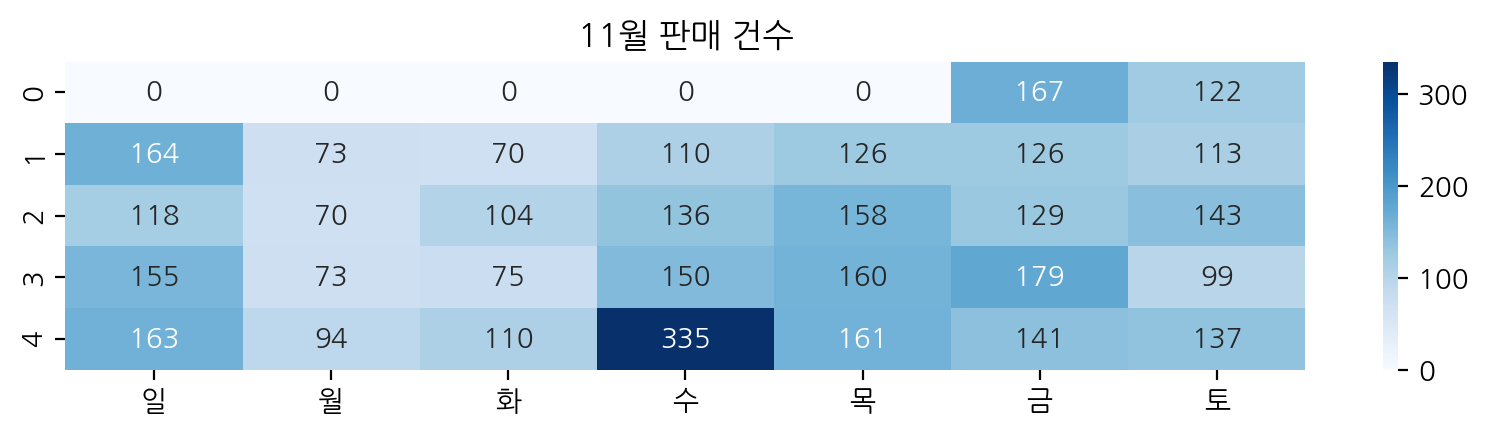

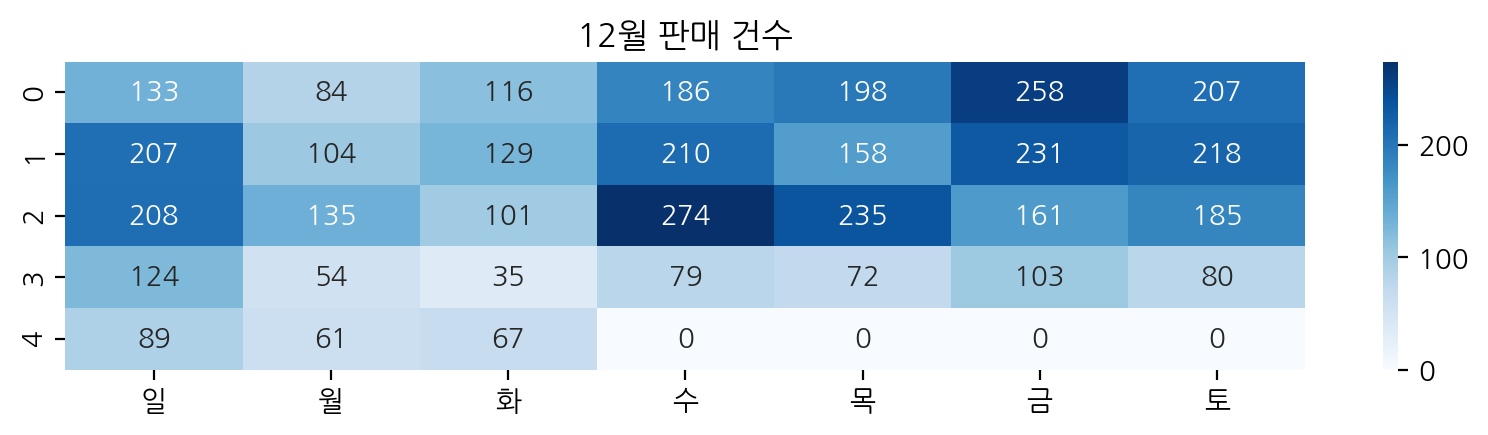

In [184]:
for i in month_map.keys():
    calendar_draw(i)

### 일별 1년치 판매 빈도 시각화

In [ ]:
import matplotlib as mpl
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


def draw_calendar_heatmap(df, year):
    # 'Year', 'Month', 'Day' 컬럼 추가
    df['Year'] = df['거래날짜'].dt.year
    df['Month'] = df['거래날짜'].dt.month
    df['Day'] = df['거래날짜'].dt.day

    # 주어진 연도의 데이터만 필터링
    df_year = df[df['Year'] == year]

    # 히트맵을 그릴 때 사용할 데이터 프레임 생성
    heatmap_data = df_year.pivot(index="Month", columns="Day", values="총비용")

    # 히트맵 그리기
    fig, ax = plt.subplots(figsize=(18, 7))  # 그림 크기 설정
    im = ax.imshow(heatmap_data, cmap="YlGn")

    # x축과 y축 설정
    ax.set_xticks(np.arange(len(heatmap_data.columns)), labels=heatmap_data.columns)
    ax.set_yticks(np.arange(len(heatmap_data.index)), labels=heatmap_data.index.map(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B')))

    # 컬러바 추가
    plt.colorbar(im)

    plt.show()

In [134]:
total = pd.pivot_table(data=os_df, index='거래날짜', values='총비용', aggfunc='count')
total = total.reset_index()
total['거래날짜'] = pd.to_datetime(total['거래날짜'])

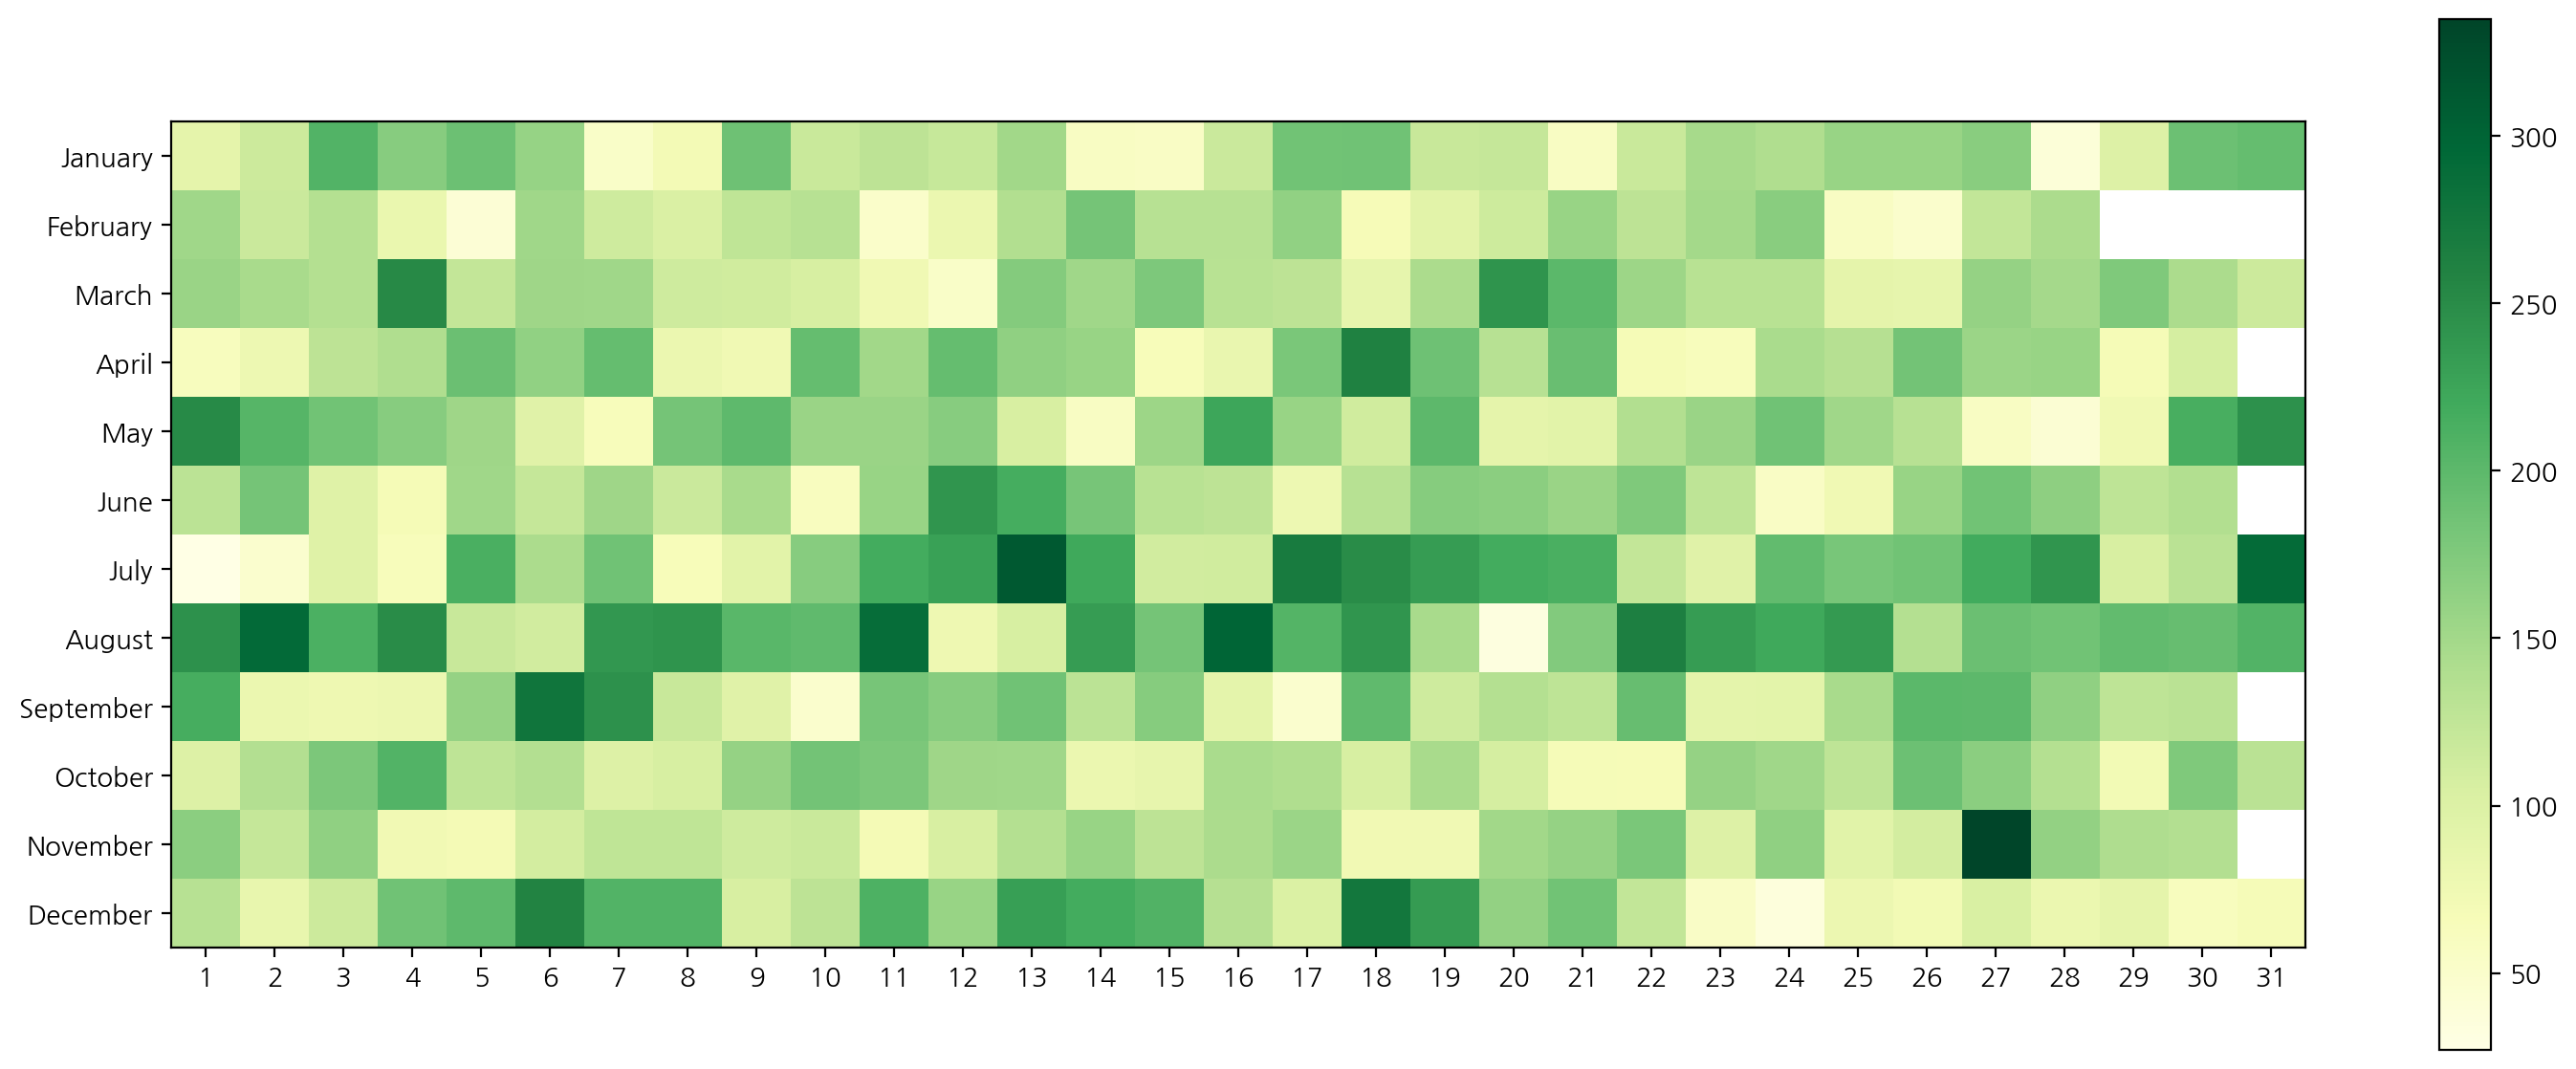

In [135]:
# 2019년 데이터에 대한 달력 히트맵 그리기
draw_calendar_heatmap(total, 2019)

미국 할인 기간
- 1월 1일신년할인
- 2월 14 발렌타인/2월 세번째 월요일 프레지던트 데이
- 3월 17일 성 패트릭 데이
- 3월 22일 - 4월 26일 부활절
- 4월 19일 굿프라이데이
- 5월 12일 어머니날/ 5월 27일 메모리얼데이
- 6월 16일 아버지날
- 7월 4일 독립기념일을 기준으로 상반기 결산 세일 6말-8초 진행 ★★★
- 8월 중순 개학시즌
- 9월 2일 노동절★ 전주 부터 진행
- 10월 14일 콜롬버스데이/ 10월 31일 할러윈
- 11월 11일 재향군인의 날, 싱글즈 데이/ 11월 28,29 추수감사절, 블프(보통 블프 기준 이틀전후로 세일)★★★
- 12월2일 사이버먼데이★
- 12월25, 26 클스마스★

유의미한 행사:
- 굿프라이데이(며칠 전부터 할인 시작)
- 7월 4일 독립기념일을 기준으로 상반기 결산 세일
- 9월 2일 노동절★ 전주 부터 진행(유의미할지도?)
- 11월 블프

### ARPPU
지불 유저 1명 당 한 달에 결제하는 평균 금액을 산정한 수치

In [76]:
arppu = os_df.groupby(["월"]).agg({"총비용": "sum",
                                             "고객ID": "nunique"})
arppu["ARPPU"] = arppu["총비용"] / arppu["고객ID"]
arppu

총비용  고객ID        ARPPU
월                                
Apr  443100.16   224  1978.125714
Aug  462309.94   300  1541.033133
Dec  561140.18   236  2377.712627
Feb  360036.40   109  3303.086239
Jan  462866.90   215  2152.869302
Jul  421362.00   236  1785.432203
Jun  358594.96   259  1384.536525
Mar  410408.03   208  1973.115529
May  349159.59   200  1745.797950
Nov  541254.55   188  2879.013564
Oct  455643.16   210  2169.729333
Sep  401553.82   193  2080.589741

In [77]:
월_순서 = list(month_dict.values())

# 인덱스를 카테고리 타입으로 설정
arppu.index = pd.Categorical(arppu.index, categories=월_순서, ordered=True)

# 인덱스 기준으로 데이터프레임 정렬
arppu = arppu.sort_index()

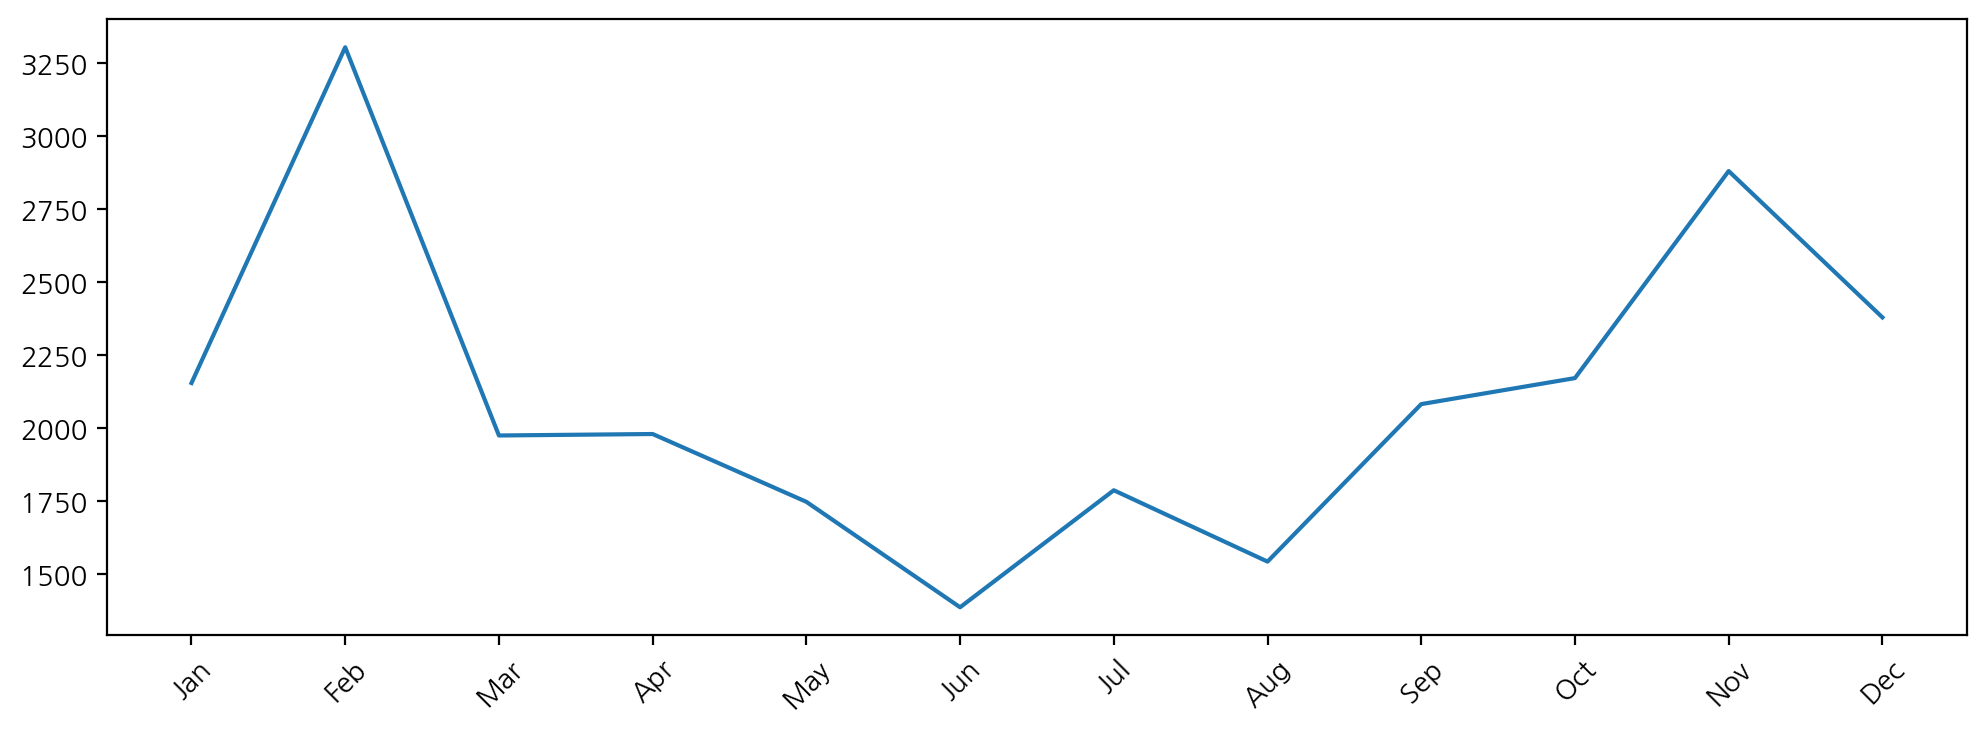

In [78]:
ax = arppu["ARPPU"].plot(figsize=(12, 4))

# X축에 모든 인덱스 값을 틱으로 설정
ax.set_xticks(range(len(arppu.index)))

ax.set_xticklabels(arppu.index, rotation=45)  # rotation은 틱 라벨이 서로 겹치지 않도록 기울임

# 그래프 표시
plt.show()


총매출은 7, 8월이 높았지만 개인 구매금액은 2월과 11월이 높았다.
2월은 한달 이용 인원이 가장 적었음 8월은 한달 이용 인원이 가장 높았음

### MAU
한 달 동안 서비스나 애플리케이션을 사용한 고유 사용자 

<Axes: >

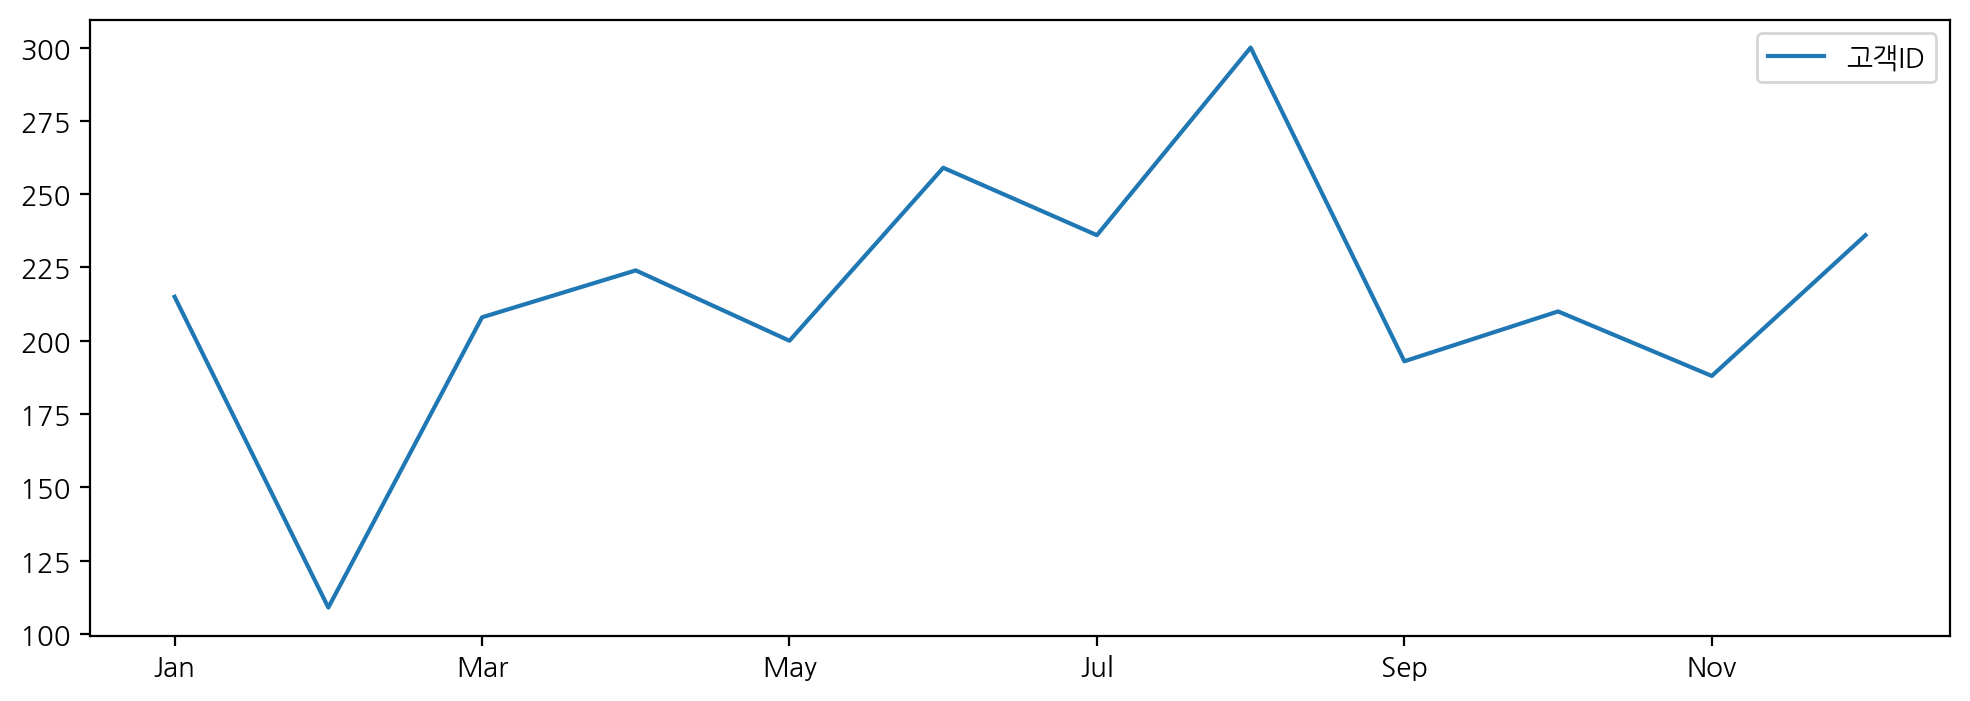

In [106]:
# 월로 그룹화 하여 고객ID 의 유일값의 개수를 구하기

mau = os_df.groupby("월").agg({"고객ID": "nunique"})

월_순서 = list(month_dict.values())

# 인덱스를 카테고리 타입으로 설정
mau.index = pd.Categorical(mau.index, categories=월_순서, ordered=True)

# 인덱스 기준으로 데이터프레임 정렬
mau = mau.sort_index()

mau.plot(figsize=(12, 4))
# 

In [ ]:
mau.plot(figsize=(12, 4))

- arppu는 1인 한달 비용
- mau는 한달에 구매한 건수로 나타내서 그런듯

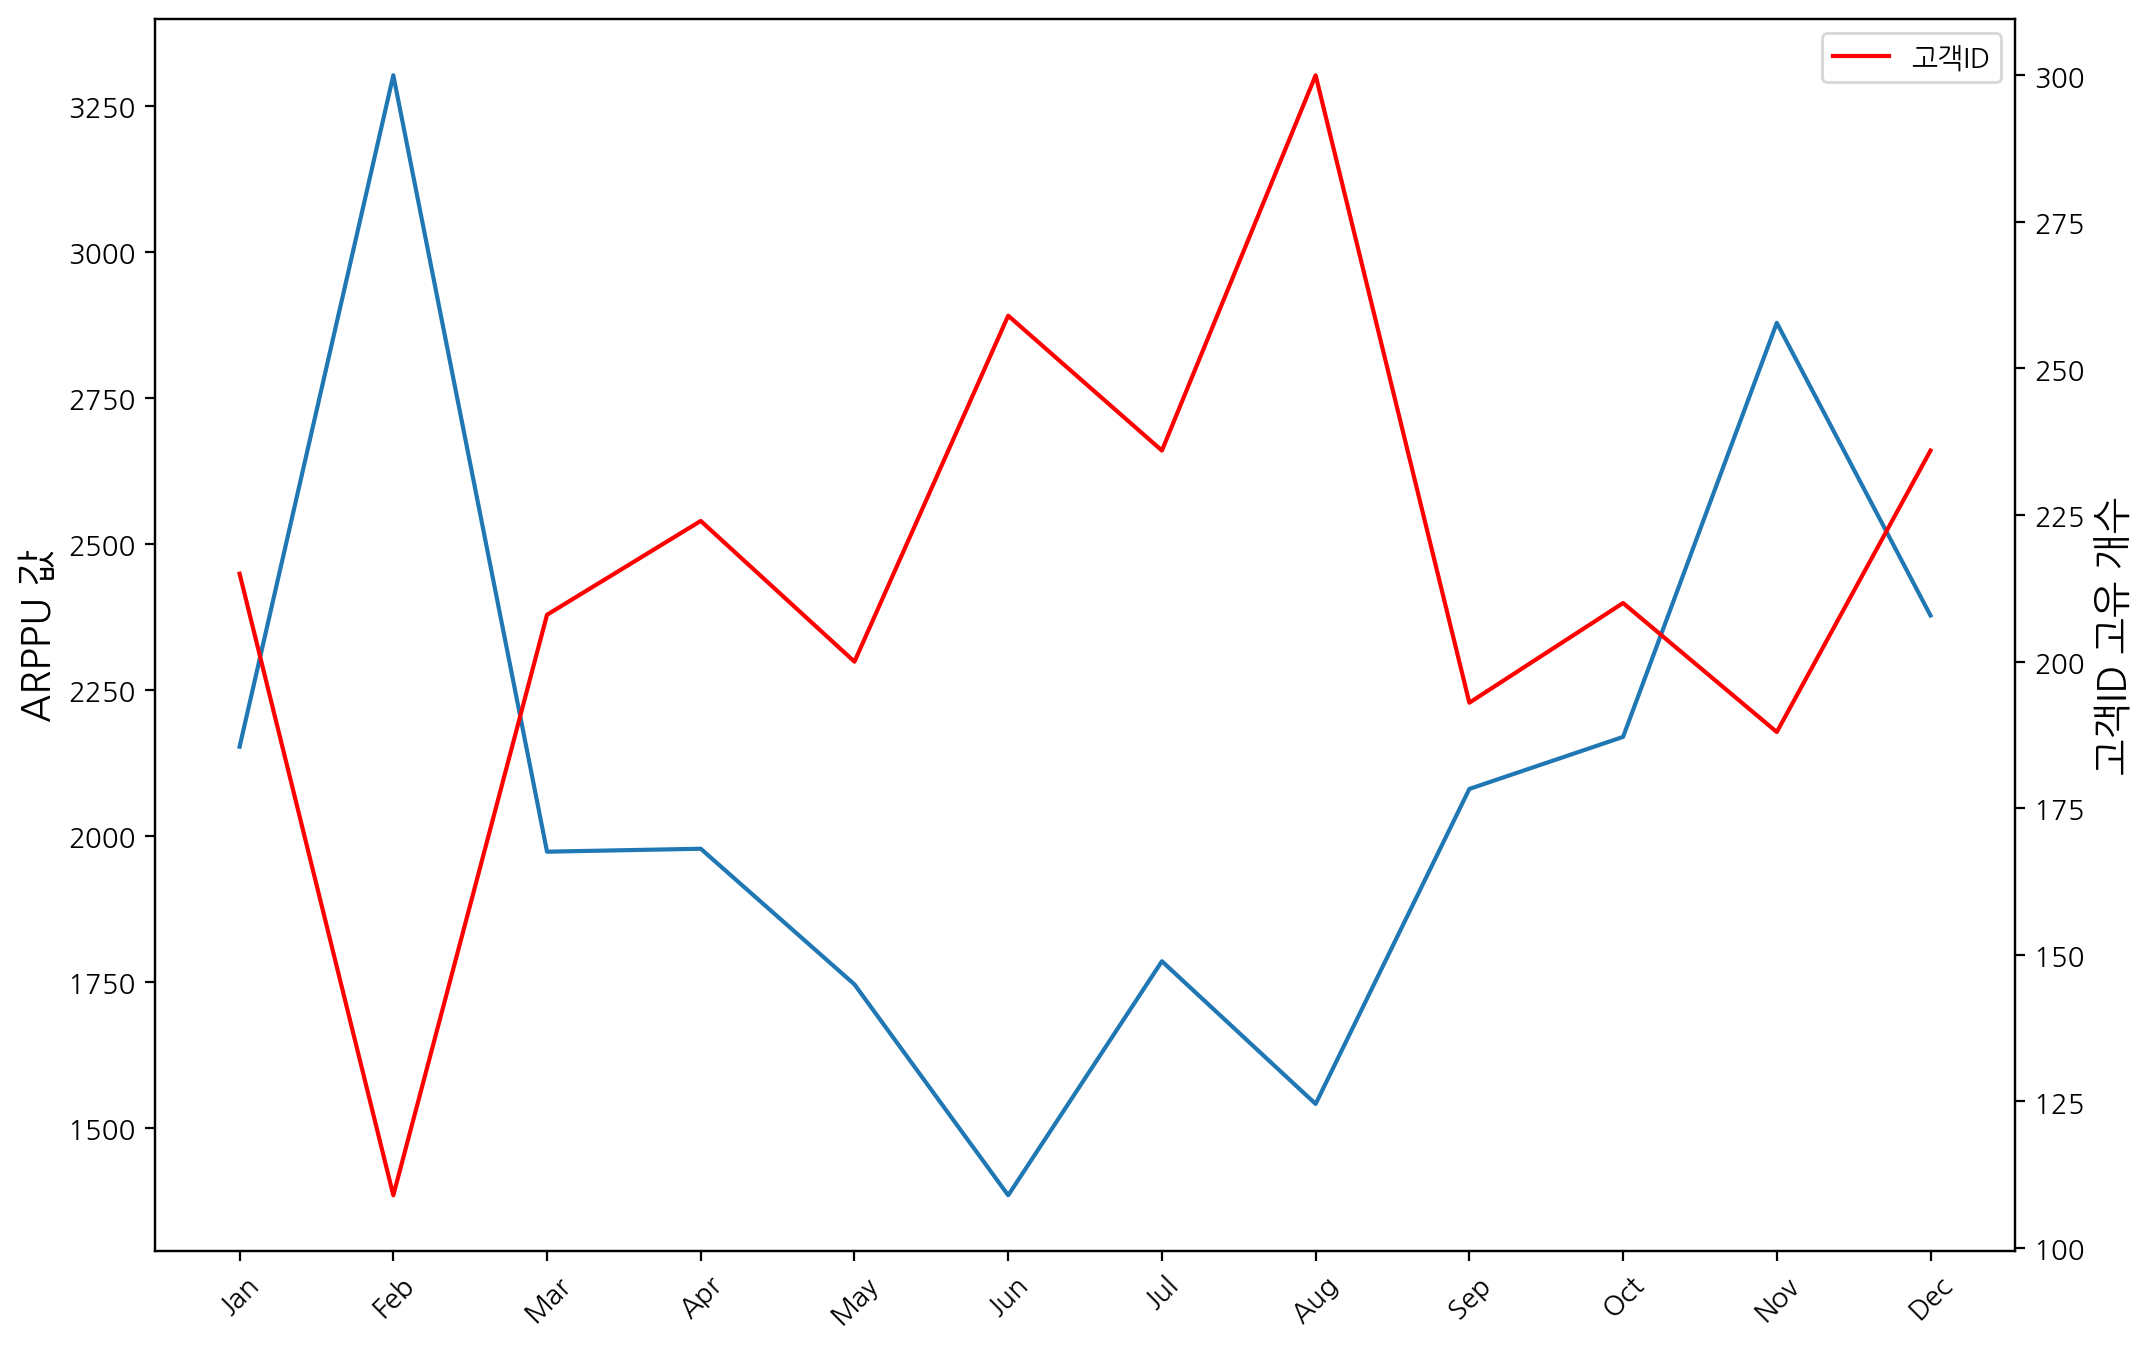

In [108]:
# 첫 번째 그래프를 그리는 코드
ax1 = arppu["ARPPU"].plot(figsize=(12, 8))
ax1.set_xticks(range(len(arppu.index)))
ax1.set_xticklabels(arppu.index, rotation=45)
ax1.set_ylabel("ARPPU 값", fontsize=14)  # 첫 번째 Y축 라벨 설정

ax2 = ax1.twinx()

# 두 번째 그래프를 그리는 코드
mau.plot(ax=ax2, color='r')  
ax2.set_ylabel("고객ID 고유 개수", fontsize=14)  # 두 번째 Y축 라벨 설정


plt.show()

오 mae와 arppu가 반대로 작용함

-> 비용 / mae 느낌이라 그런듯

# RFM

### 전체 주문에서 최근 주문일 구하기

In [220]:
# Recency 계산을 위해 해당 주문에서 가장 최근 구매가 일어난 시간을 가져옵니다.
# 최근 거래 기준일(last_timestamp)을 만들기 위해 timedelta로 날짜를 더해줍니다.(최소값:1 설정)
# timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)
import datetime as dt

os_df['거래날짜'] = pd.to_datetime(os_df['거래날짜'])

os_df
last_timestamp = os_df['거래날짜'].max() + dt.timedelta(days=1)
last_timestamp

Timestamp('2020-01-01 00:00:00')

### 고객별 Recency, Frequency, Monetary 값 구하기

In [221]:
(last_timestamp - os_df.iloc[0]["거래날짜"]).days

365

In [222]:
def find_recency(x):
    """최근 마지막 거래일과 해당 고객의 마지막 거래일의 차이를 구합니다."""
    return (last_timestamp - x.max()).days


find_recency(os_df["거래날짜"][:1000])

358

In [230]:
# RFM 값을 정의합니다.
# Recency : 최근 거래 기준일(last_timestamp)과 고객별 최근 구매한 날짜(x.max())와 차이값
# Frequency : 구매 빈도수
# Monetary : 총 구매 금액
rfm = os_df.groupby("고객ID").agg({"거래날짜" : lambda x : (last_timestamp - x.max()).days,
                                    "거래ID" : "count", 
                                    "총비용": "sum"})
rfm.head(3)

거래날짜  거래ID       총비용
고객ID                           
USER_0000   108     2    180.99
USER_0001    60    60  14500.04
USER_0002    74    23   1639.27

In [232]:
# RFM 으로 컬럼의 이름을 변경합니다.
# 거래날짜 는 Recency
# 거래ID 는 Frequency
# 총비용 는 MonetaryValue
rfm.rename(columns={"거래날짜": "Recency", 
                          "거래ID": "Frequency", 
                          "총비용": "MonetaryValue"}, inplace=True)
rfm.head()

Recency  Frequency  MonetaryValue
고객ID                                        
USER_0000      108          2         180.99
USER_0001       60         60       14500.04
USER_0002       74         23        1639.27
USER_0003       18         17        1487.95
USER_0004      108         36        2079.96

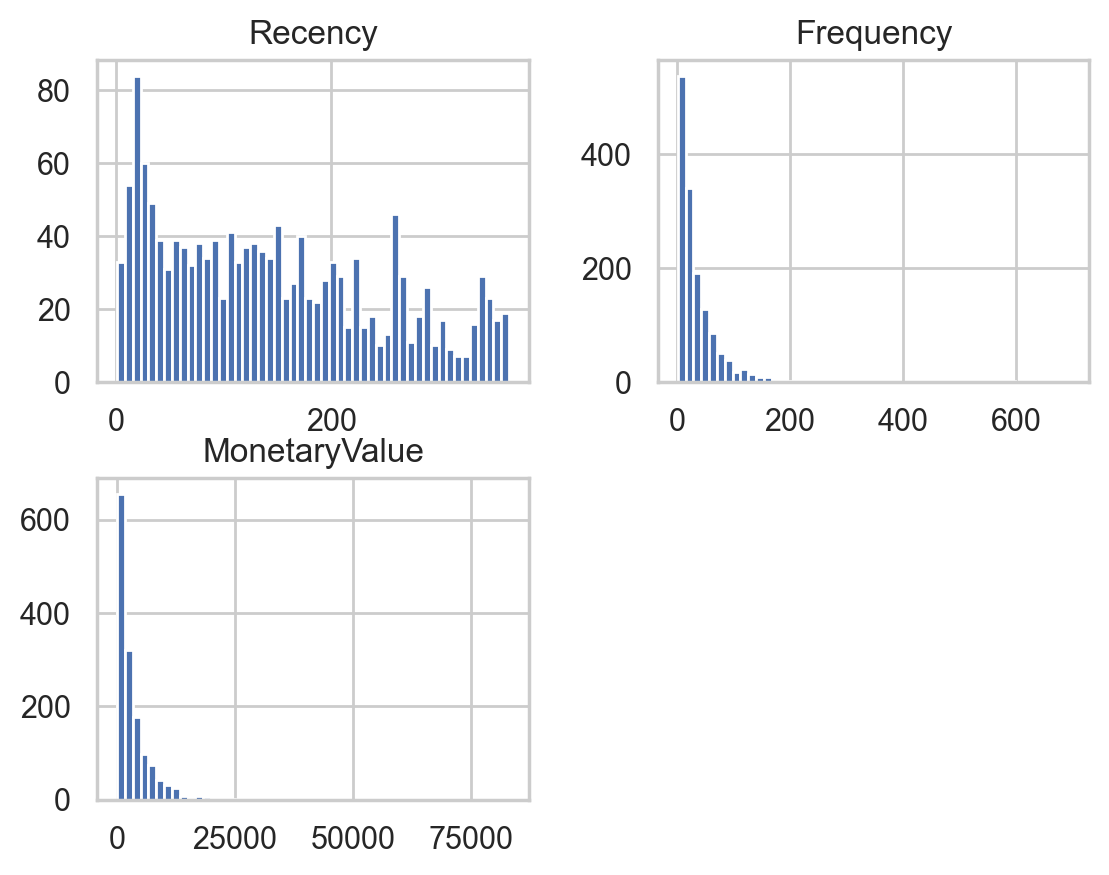

In [233]:
# 히스토그램은 cut 방식입니다. 
# => 한쪽에 고객이 치우쳐져있어서 몰려있는 부분을 제대로 분석하기 어렵기 때문에 고르게 분포가 되도록 분석해볼 예정입니다.
rfm.hist(bins=50);

## RFM 모형

* Scoring 기법: RFM의 요인을 각각 5등급으로 등간격으로 분류하는 방법이다.
* 현재 개발된 RFM 모형은 크게 4가지로 분류 할 수 있다. 이 문서의 내용들은 정설이 아니며 신뢰하기 어려움을 전제로 참고해야한다.
    * 모델1. RFM 각 요소의 20% rule의 적용
    * 모델2. 비율 척도에 의한 양적인 정도의 차이에 따른 등간격의 5등급 분류
    * 모델3. 상하 20%를 제외한 등간격 척도에 의한 그룹 분류
    * 모델4. 군집 분석에 의한 각 요소 별 5개의 그룹 분류
    
출처 : [RFM - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/RFM)

### qcut을 통한 RFM 변수 만들기

<img src="https://t1.daumcdn.net/cfile/tistory/99DEAF3B5C1E4AAA1E">

In [235]:
# F, M 는 값이 높을 수록 높은 점수를 줄 예정
# R은 값이 낮을 수록 최근에 구매한 고객이기 때문에 높은 점수를 줄 예정입니다.
# [5, 4, 3, 2, 1] 이 되게 range, list 를 활용해서 만든다면?
# Recency 는 최근일수록 높은 스코어를 갖도록 합니다.
# Frequency, MonetaryValue 는 값이 클 수록 높은 스코어를 갖도록 합니다.
r_labels = list(range(5, 0, -1))
f_labels = list(range(1, 6))
m_labels = list(range(1, 6))
cut_size = 5

In [236]:
pd.qcut(range(10), 3, labels=["good", "medium", "bad"])

['good', 'good', 'good', 'medium', 'medium', 'medium', 'bad', 'bad', 'bad', 'bad']
Categories (3, object): ['good' < 'medium' < 'bad']

In [237]:
pd.qcut(range(12), 4, labels=[1, 2, 3, 4])

[1, 1, 1, 2, 2, ..., 3, 3, 4, 4, 4]
Length: 12
Categories (4, int64): [1 < 2 < 3 < 4]

In [238]:
# 머신러닝에서도 연속된 수치 데이터를 구간화 해서 사용하게 되면 오버피팅(과적합) 되는 현상을 방지할 수도 있습니다.
# 오버피팅(과적합)이란 학습데이터에 너무 치중해서 학습데이터에서는 좋은 성능을 내지만
# 실제 데이터에서는 좋은 성능을 내지 못하는 것을 의미합니다.
r_cut = pd.qcut(rfm["Recency"], cut_size, labels=r_labels)
f_cut = pd.qcut(rfm["Frequency"], cut_size, labels=f_labels)
m_cut = pd.qcut(rfm["MonetaryValue"], cut_size, labels=m_labels)

In [239]:
# assign 을 사용하면 여러 변수를 한 번에 만들 수 있습니다.
rfm = rfm.assign(R=r_cut, F=f_cut, M=m_cut)
rfm

Recency  Frequency  MonetaryValue  R  F  M
고객ID                                                 
USER_0000      108          2         180.99  3  1  1
USER_0001       60         60       14500.04  4  5  5
USER_0002       74         23        1639.27  4  3  3
USER_0003       18         17        1487.95  5  3  3
USER_0004      108         36        2079.96  3  4  3
...            ...        ...            ... .. .. ..
USER_1463      271          7         822.67  1  1  2
USER_1464       88         40        2995.47  4  4  4
USER_1465      195          8         153.06  2  1  1
USER_1466       70          1         304.00  4  1  1
USER_1467       83        102        7080.51  4  5  5

[1468 rows x 6 columns]

### RFM Segment

In [240]:
# RFM_segment 값을 구합니다. 
# R, F, M 값을 문자 그대로 붙여서 세그먼트를 구분합니다.
rfm["RFM_segment"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)

### RFM Score

In [241]:
# R, F, M 값의 합계를 구해서 세그먼트 점수를 구합니다.
rfm["RFM_score"] = rfm[["R", "F", "M"]].sum(axis=1)
rfm.head(2)

Recency  Frequency  MonetaryValue  R  F  M RFM_segment  RFM_score
고객ID                                                                        
USER_0000      108          2         180.99  3  1  1         311          5
USER_0001       60         60       14500.04  4  5  5         455         14

<Axes: xlabel='RFM_segment', ylabel='RFM_score'>

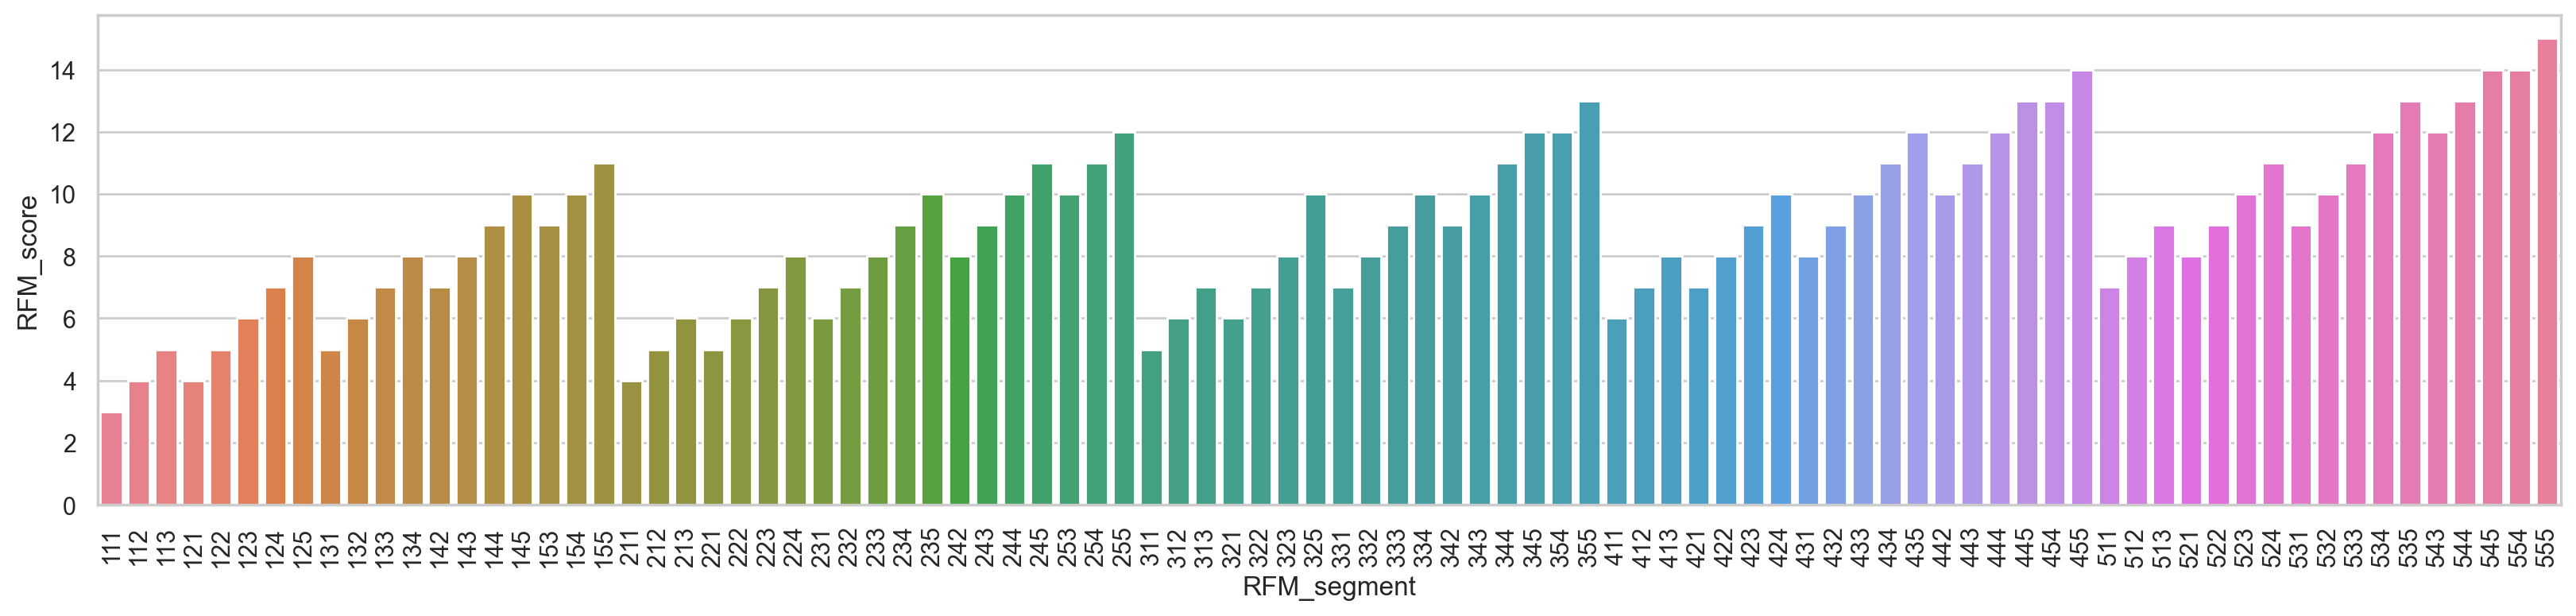

In [244]:
# RFM segment 값에 따라 정렬합니다.
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values("RFM_segment"), x="RFM_segment", y="RFM_score", hue = 'RFM_segment')

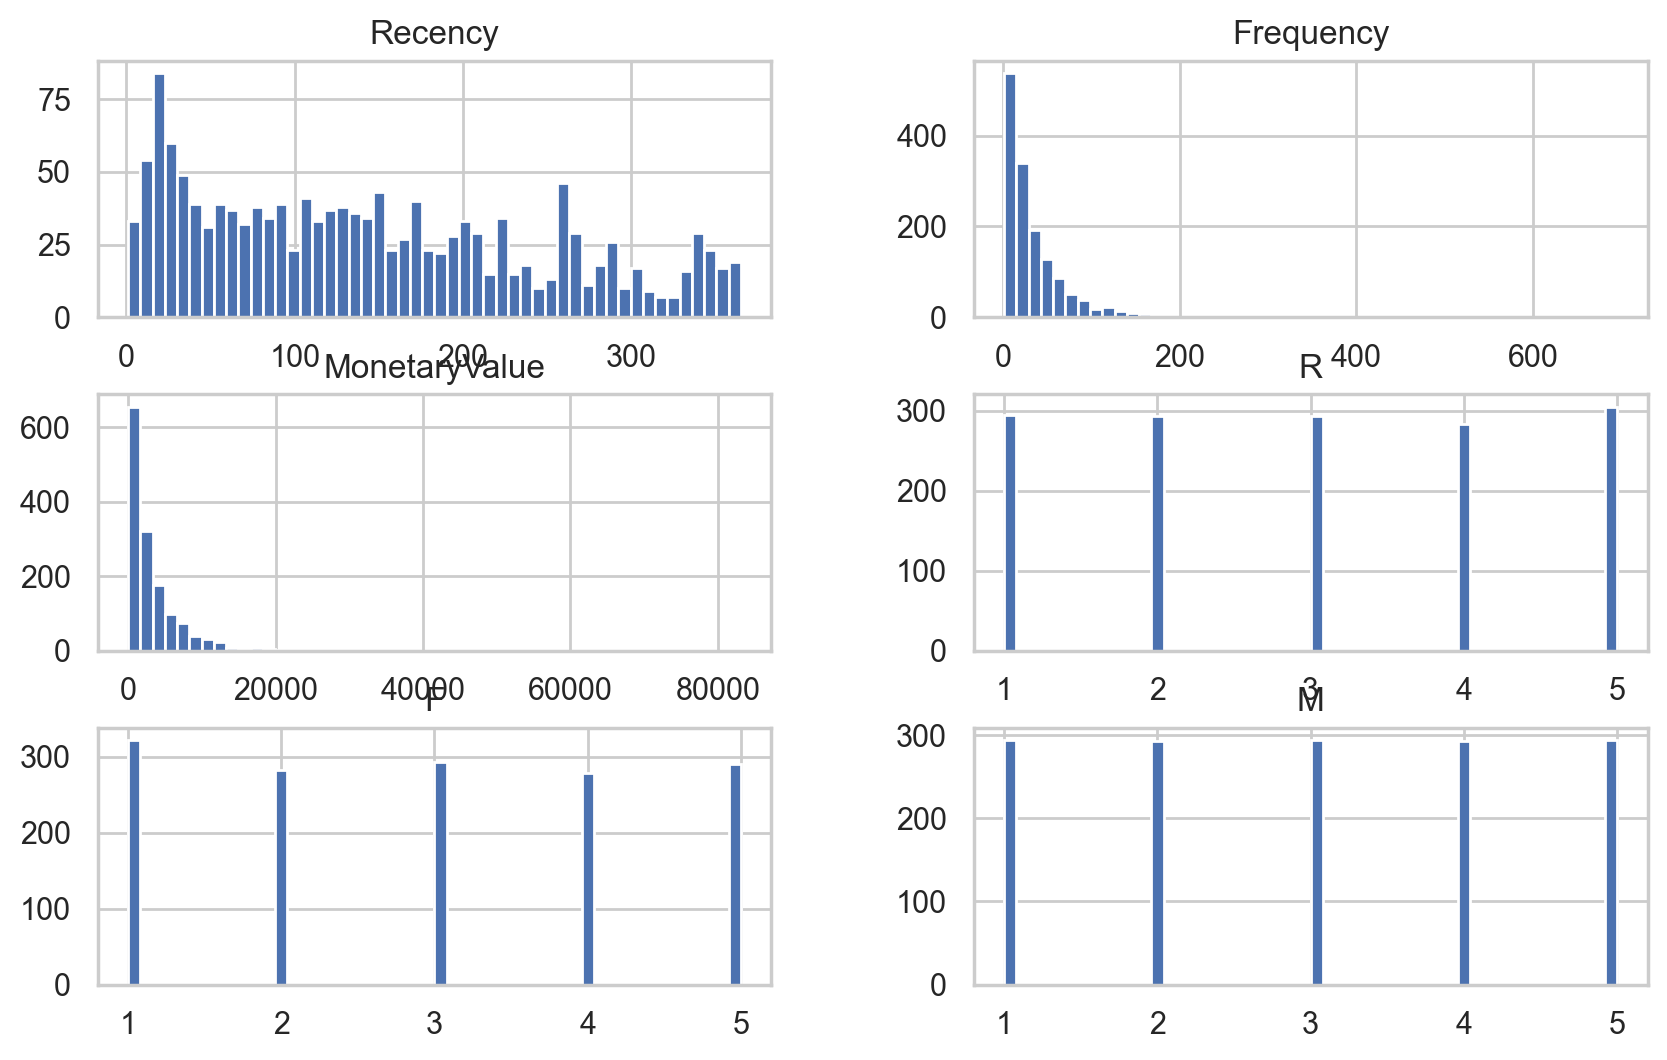

In [243]:
# RFM 을 구간화 하면 기존에 몰려있던 데이터가 같은 비율로 나뉜 것을 볼 수 있습니다.
rfm.iloc[:, :-2].astype(float).hist(figsize=(10, 6), bins=50);

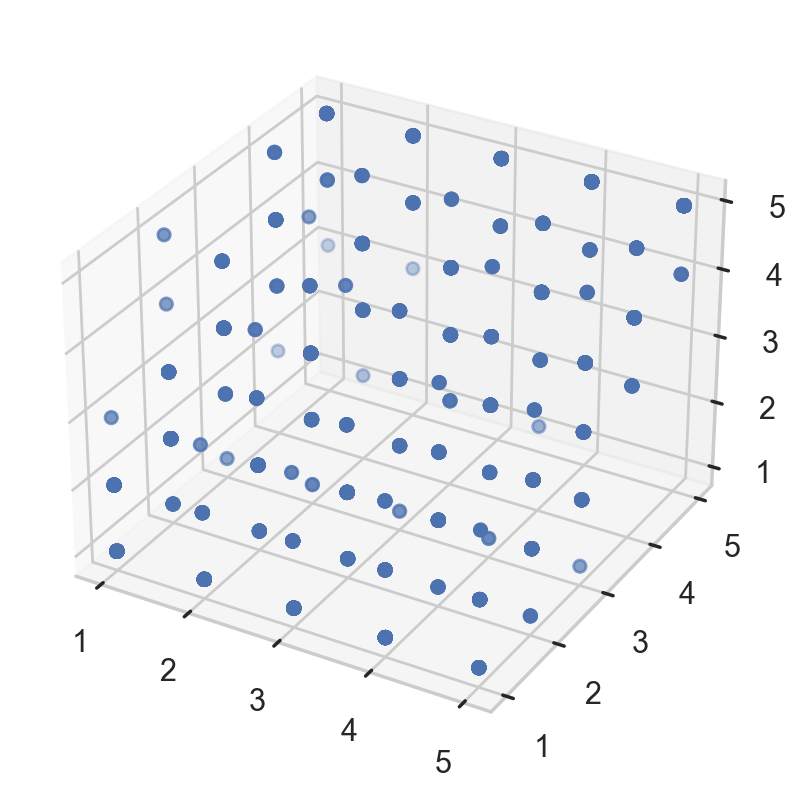

In [245]:
# 3d projection ax.scatter3D rfm["R"], rfm["F"], rfm["M"]
ax = plt.axes(projection='3d')
ax.scatter3D(rfm["R"], rfm["F"], rfm["M"])

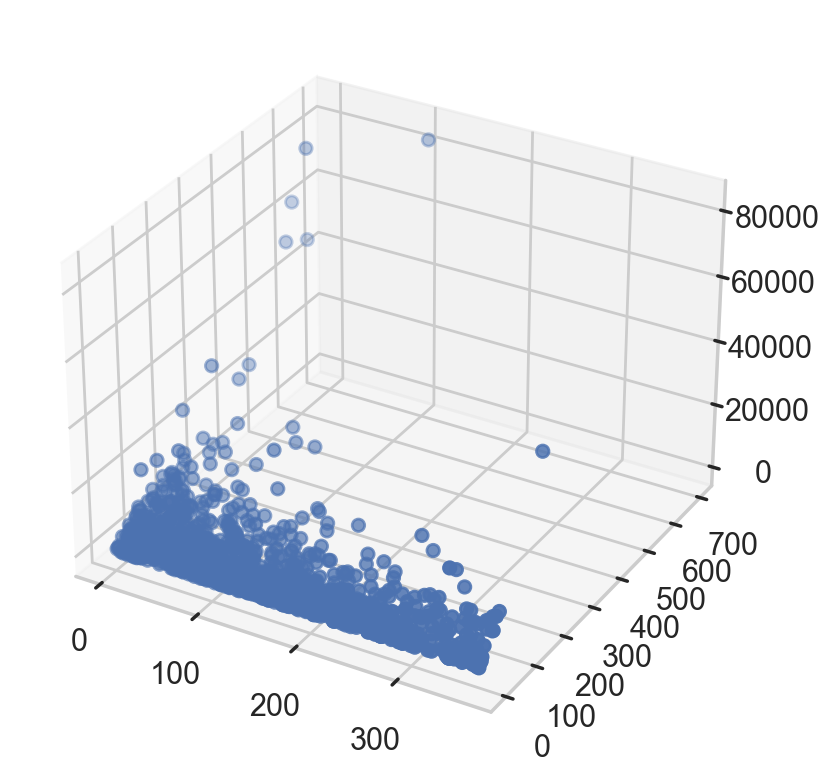

In [246]:
# rfm["Recency"], rfm["Frequency"], rfm["MonetaryValue"]
ax = plt.axes(projection='3d')
ax.scatter3D(rfm["Recency"], rfm["Frequency"], rfm["MonetaryValue"])

In [247]:
rfm.columns

Index(['Recency', 'Frequency', 'MonetaryValue', 'R', 'F', 'M', 'RFM_segment',
       'RFM_score'],
      dtype='object')

In [248]:
# 문자열의 format 함수를 사용하여 소수점 아래는 표기하지 않도록({:,.0f}) 문자열 포맷을 지정합니다.
rfm.groupby("RFM_score").agg({"Recency": "mean", 
                              "Frequency" : "mean", 
                              "MonetaryValue" : ["mean", "sum"]
                             }).style.background_gradient().format("{:,.0f}")

### qcut을 통한 고객군 나누기

In [249]:
# qcut 을 통해 3단계로 "silver", "gold", "platinum" 고객군을 나눕니다. 
rfm["RFM_class"] = pd.qcut(rfm["RFM_score"], 
                           q=3, 
                           labels=["silver", "gold", "platinum"])

In [250]:
# "RFM_class" 별로 그룹화 하고 "RFM_score" 의 describe() 값을 구합니다.
# RFM_score 에 따라 RFM_class 값이 잘 나뉘었는지 확인
rfm.groupby("RFM_class")["RFM_score"].describe()

C:\Users\kjh25\AppData\Local\Temp\ipykernel_14192\2662612242.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm.groupby("RFM_class")["RFM_score"].describe()


count       mean       std   min   25%   50%    75%   max
RFM_class                                                           
silver     550.0   5.312727  1.355157   3.0   4.0   5.0   6.75   7.0
gold       522.0   9.511494  1.120761   8.0   9.0  10.0  11.00  11.0
platinum   396.0  13.310606  1.123732  12.0  12.0  13.0  14.00  15.0

<Axes: xlabel='RFM_class', ylabel='RFM_score'>

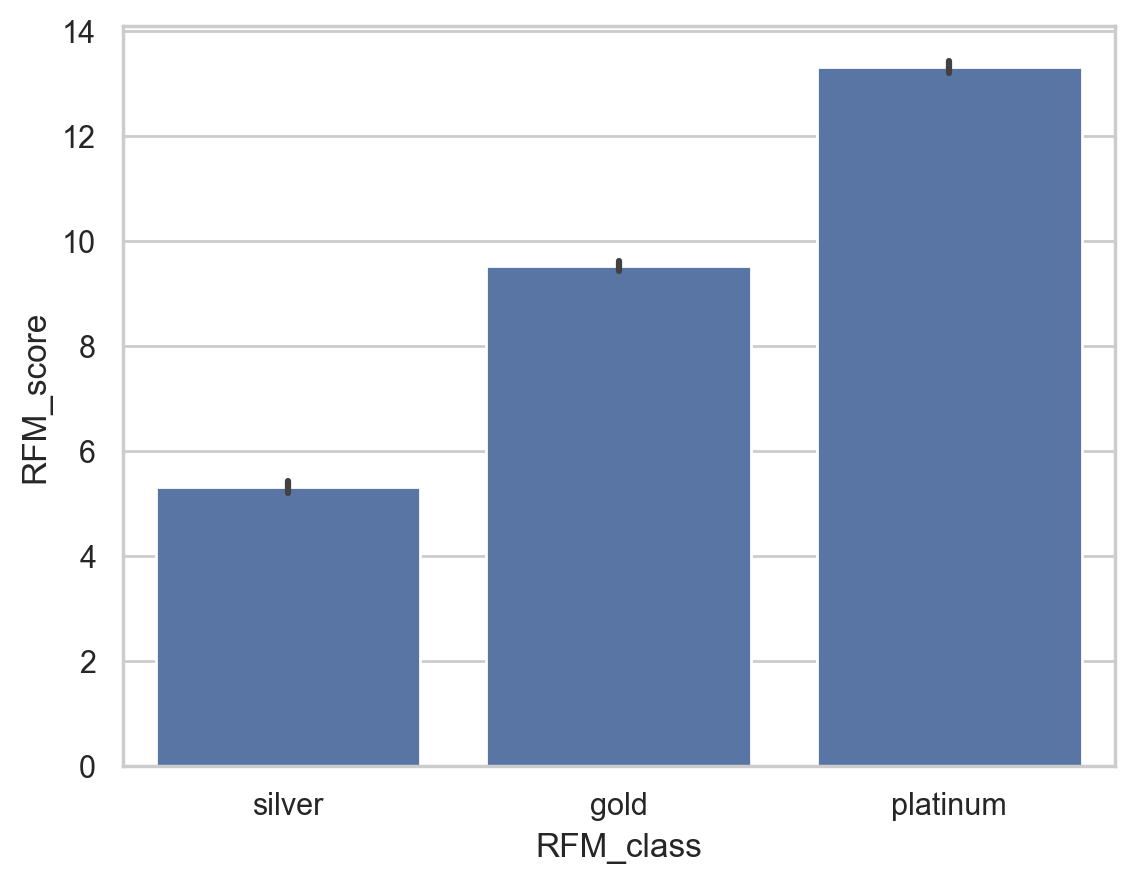

In [251]:
# barplot으로 RFM_class 별 평균 RFM_score 나타냅니다.
sns.barplot(data=rfm, x="RFM_class", y="RFM_score")

<Axes: xlabel='RFM_class', ylabel='RFM_score'>

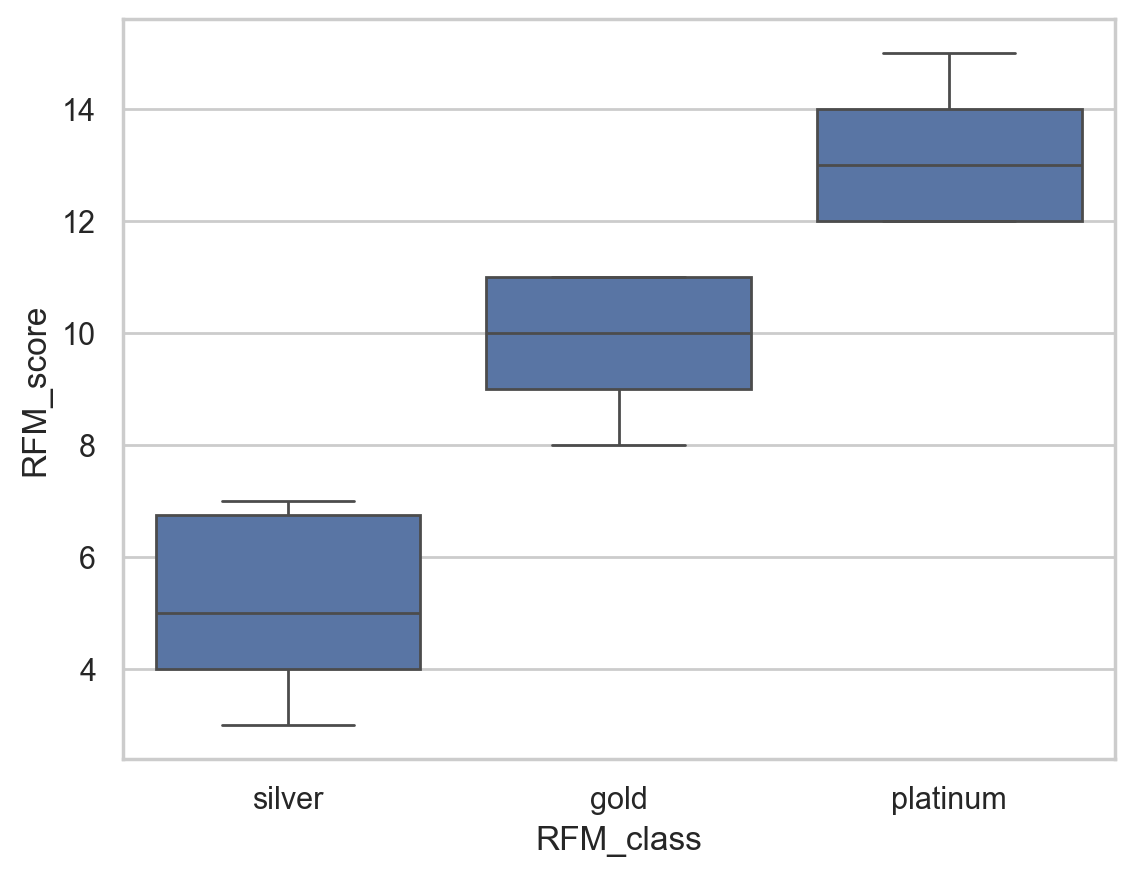

In [252]:
# boxplot으로 RFM_class 별 평균 RFM_score 나타냅니다.
sns.boxplot(data=rfm, x="RFM_class", y="RFM_score")

<Axes: xlabel='R', ylabel='RFM_score'>

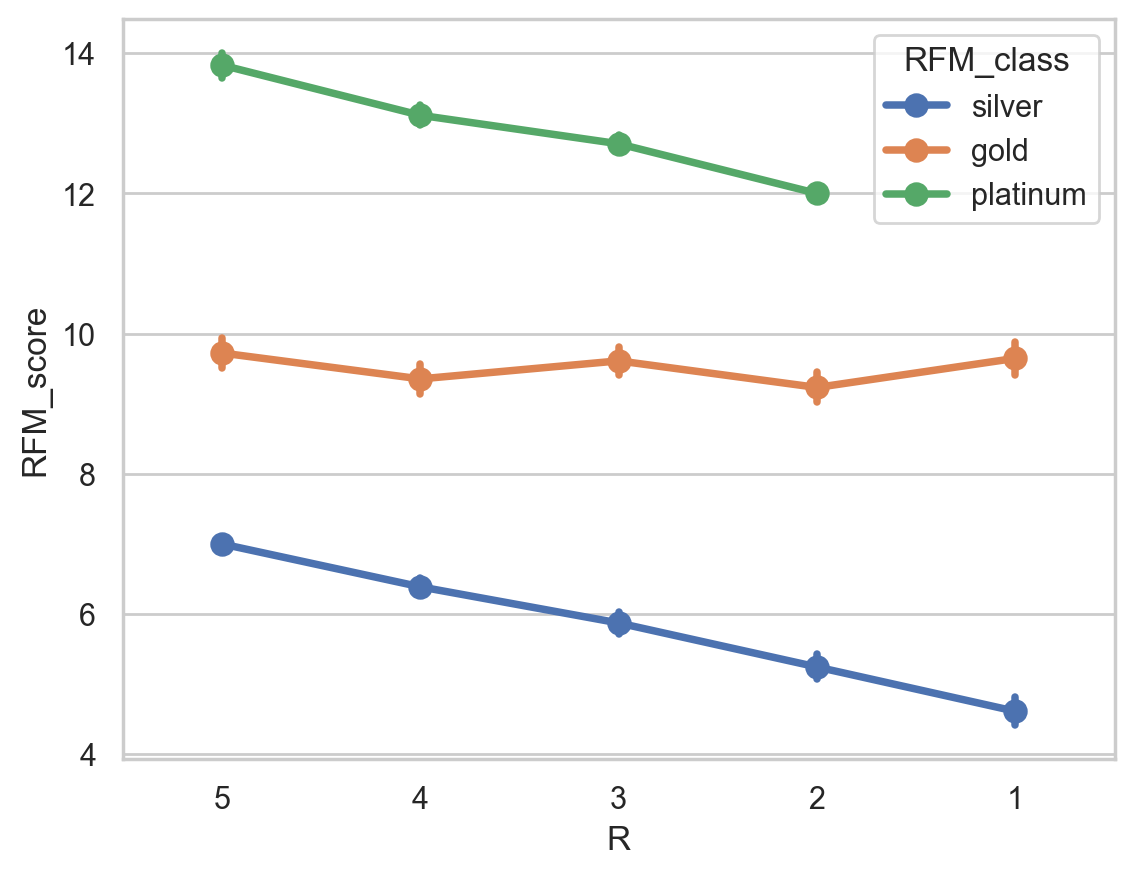

In [253]:
# pointplot으로 x=R, hue=RFM_class 별 평균 y=RFM_score 나타냅니다.
# hue 옵션을 사용하면 특정 컬럼을 지정해서 표기할 수 있습니다.
# 시각화를 해서 데이터가 의도한대로 잘 나뉘었는지 확인해 보는 용도입니다.
sns.pointplot(data=rfm, x="R", y="RFM_score", hue="RFM_class")

<Axes: xlabel='F', ylabel='RFM_score'>

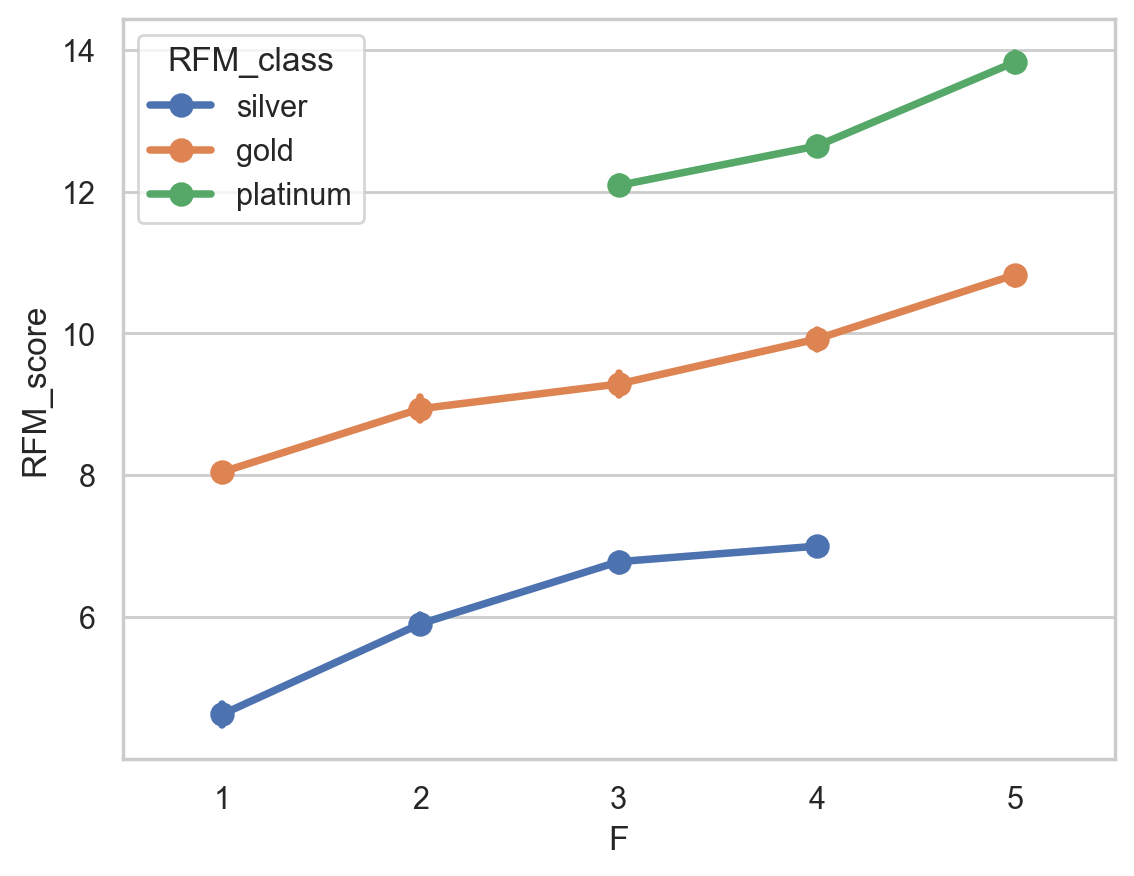

In [254]:
# pointplot으로 x=F, hue=RFM_class 별 평균 y=RFM_score 나타냅니다.

sns.pointplot(data=rfm, x="F", y="RFM_score", hue="RFM_class")

<Axes: xlabel='M', ylabel='RFM_score'>

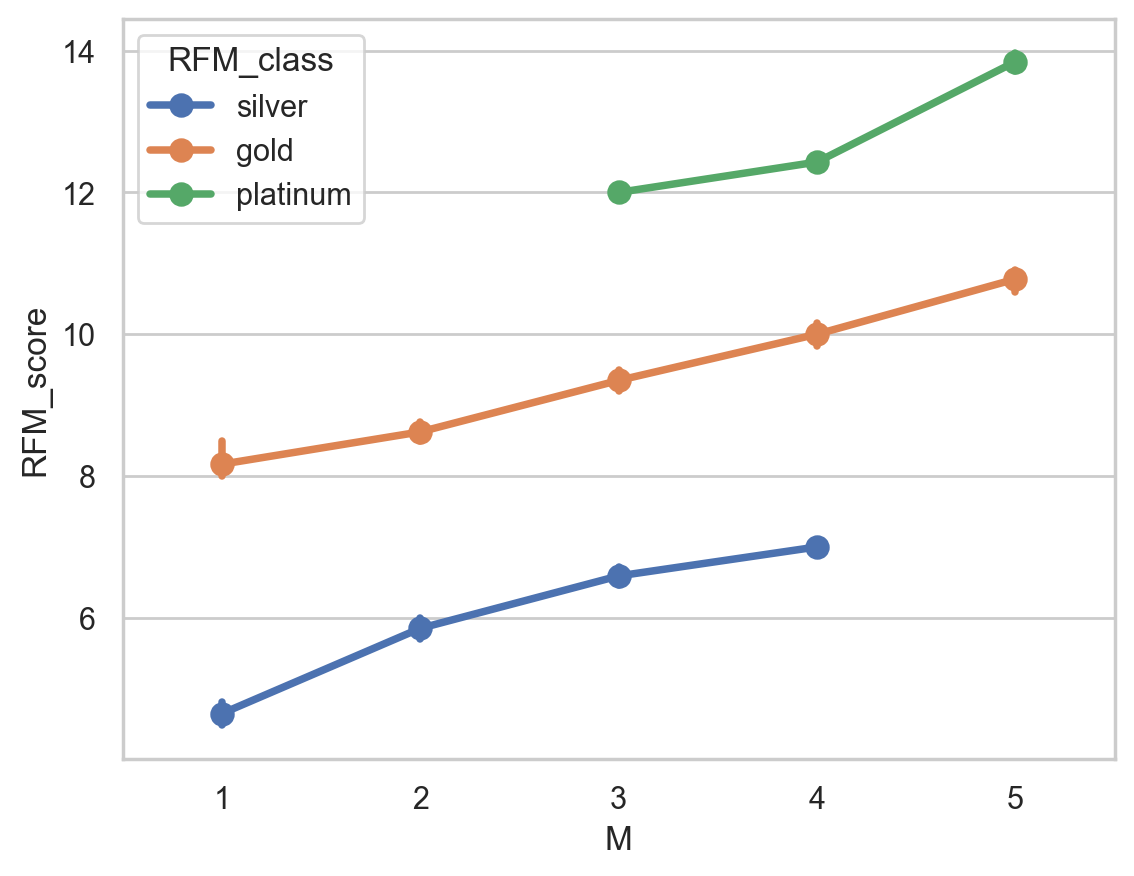

In [255]:
# pointplot으로 x=M, hue=RFM_class 별 평균 y=RFM_score 나타냅니다.

sns.pointplot(data=rfm, x="M", y="RFM_score", hue="RFM_class")

In [256]:
# "RFM_class" 별로 그룹화합니다.
# "Recency", "Frequency" 의 평균을 구합니다.
# "MonetaryValue"의 "mean", "sum", "count" 값을 구합니다.
rfm_class_agg = rfm.groupby("RFM_class").agg({"Recency": "mean", 
                              "Frequency": "mean",
                             "MonetaryValue": ["mean", "sum", "count"]})

C:\Users\kjh25\AppData\Local\Temp\ipykernel_14192\62480010.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_class_agg = rfm.groupby("RFM_class").agg({"Recency": "mean",


In [257]:
# 위에서 구한 값을 .style.background_gradient() 통해서 시각화합니다.
rfm_class_agg.style.background_gradient(cmap="Oranges").format("{:,.0f}")

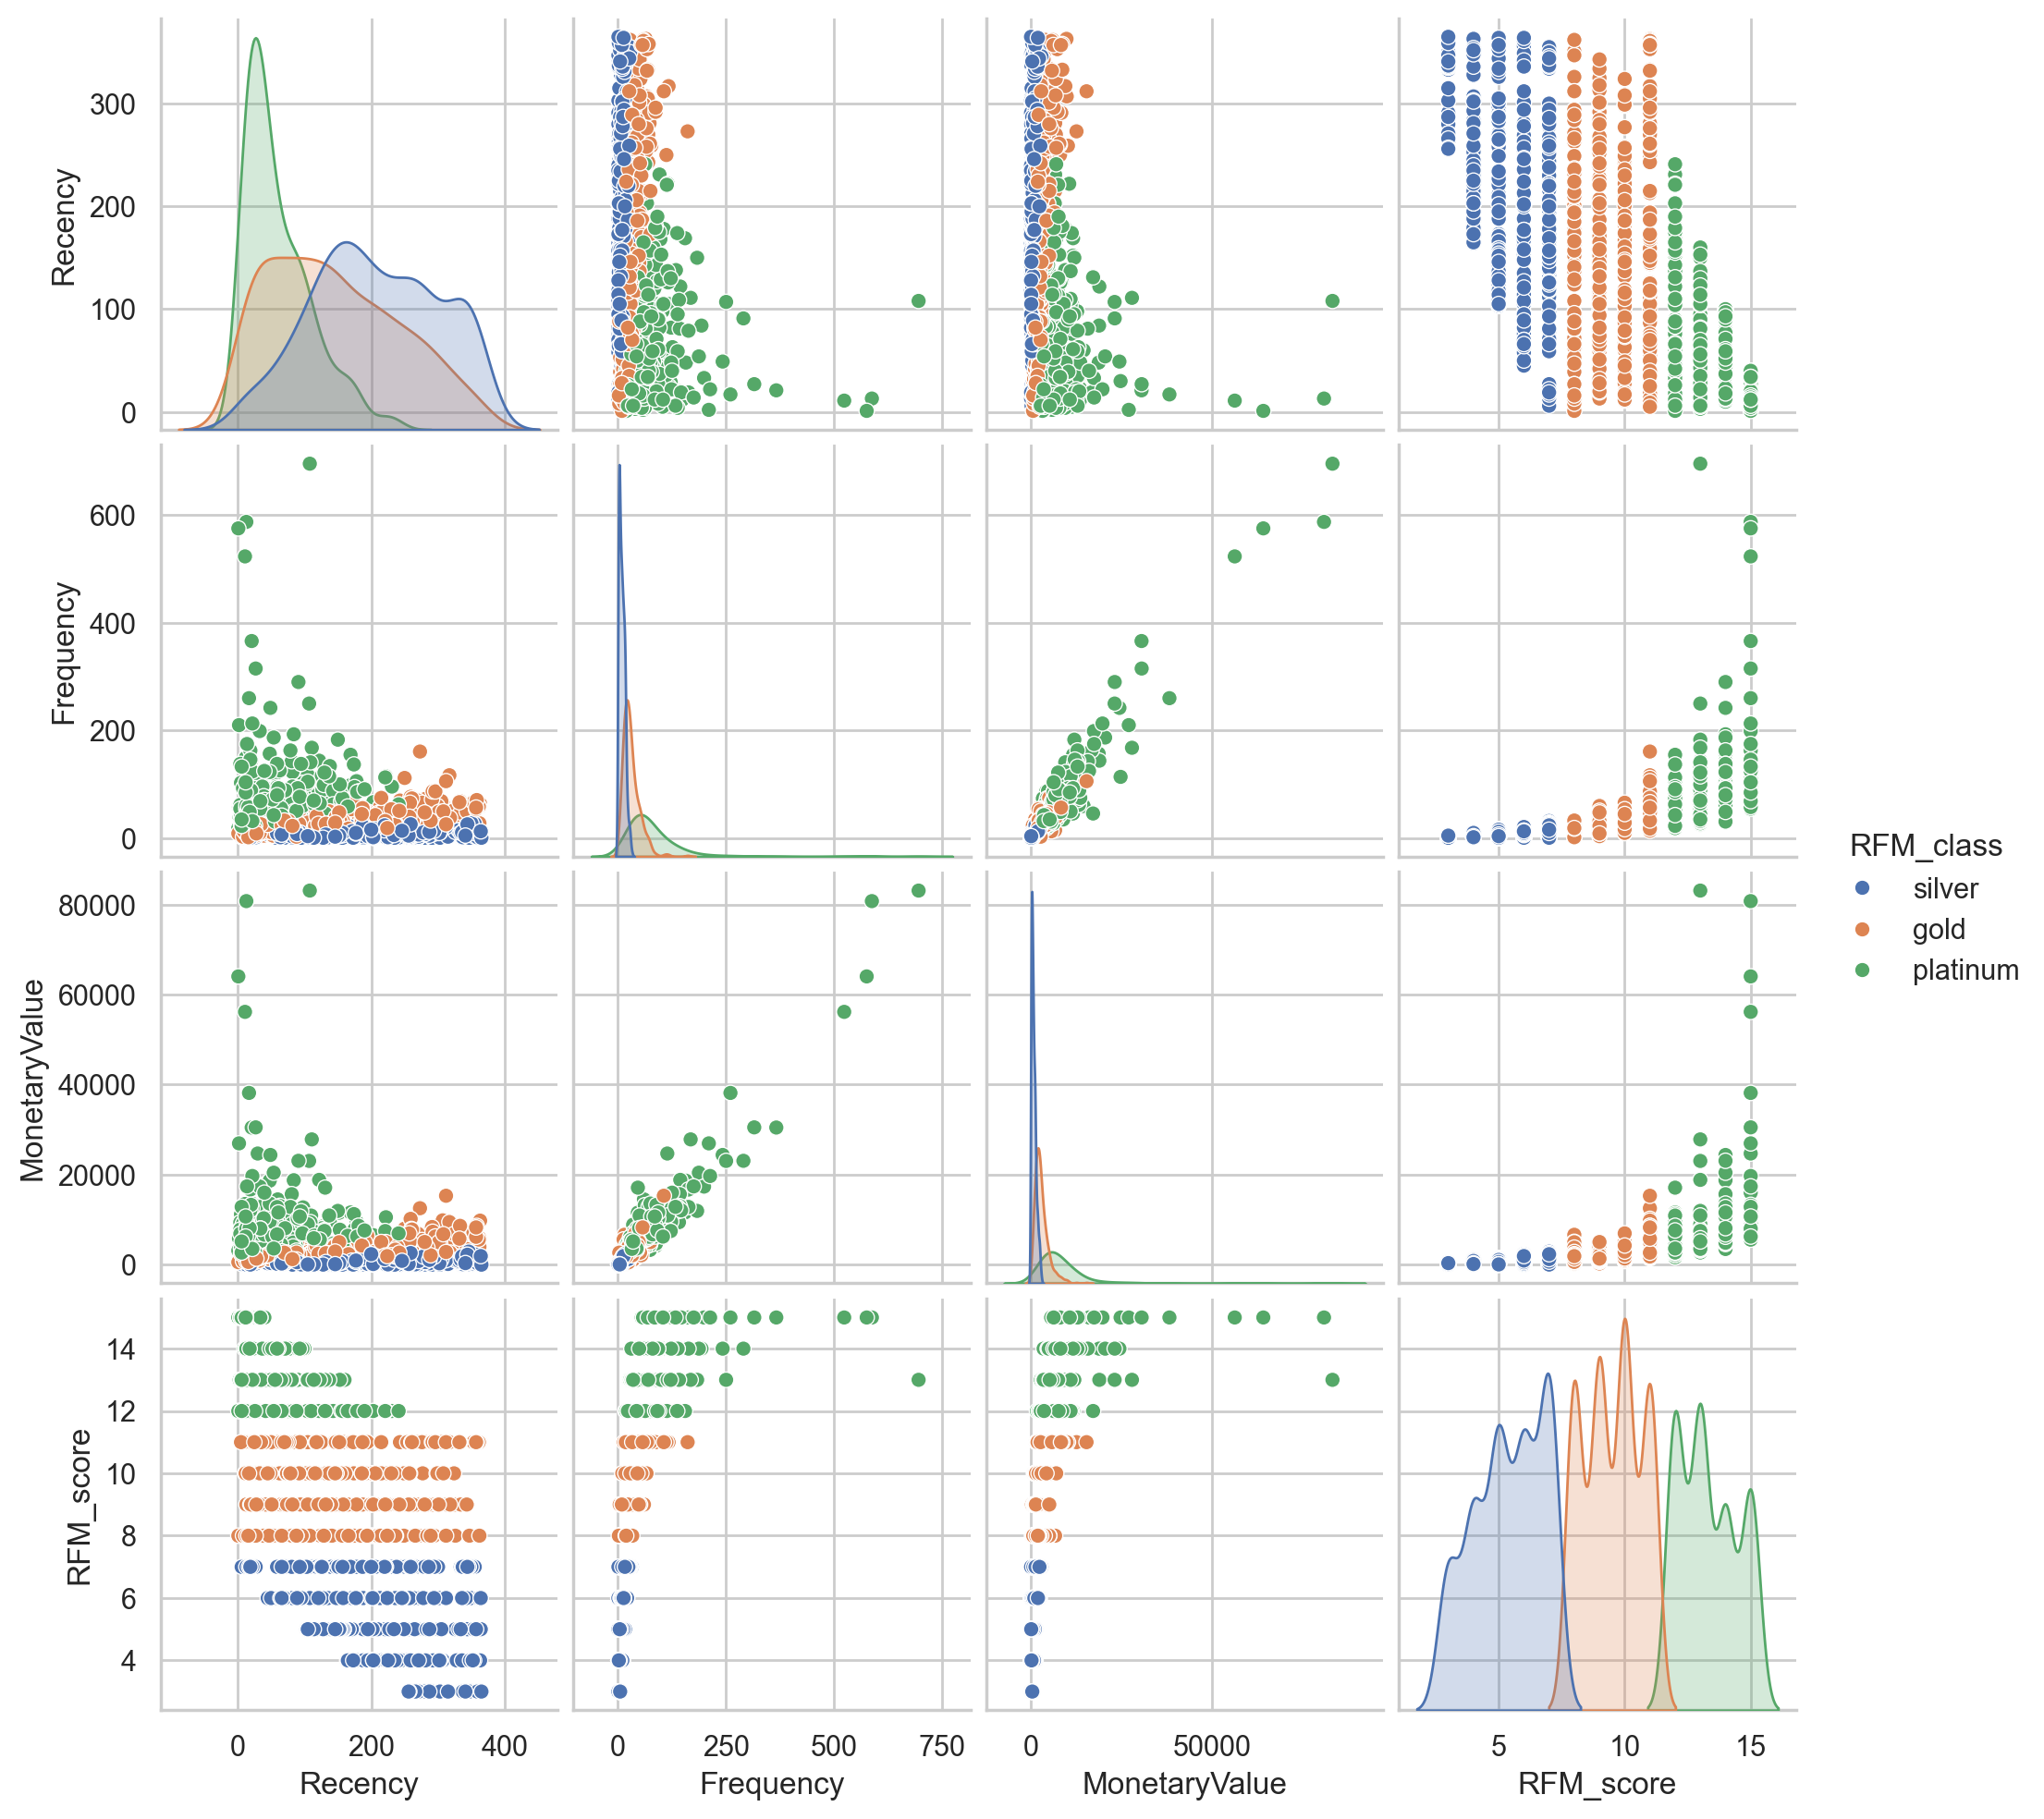

In [258]:
# pairplot 을 통해 "RFM_class" 별로 분포를 시각화 합니다.
sns.pairplot(data=rfm.sample(1000), hue="RFM_class")

In [259]:
# .corr() 함수로 변수간 상관관계(선형적 관계)를 분석합니다.
# 1에 가까울 수록 양의 상관관계, -1에 가까울 수록 음의 상관관계를 나타냅니다.
corr = rfm.corr(numeric_only=True)
corr

Recency  Frequency  MonetaryValue  RFM_score
Recency        1.000000  -0.199993      -0.208046  -0.599196
Frequency     -0.199993   1.000000       0.947341   0.600848
MonetaryValue -0.208046   0.947341       1.000000   0.582235
RFM_score     -0.599196   0.600848       0.582235   1.000000

In [260]:
# 삼각형태의 heatmap 형태를 만들기 위해 삼각형 마스크를 만듭니다.
mask = np.triu(np.ones_like(corr))

<Axes: >

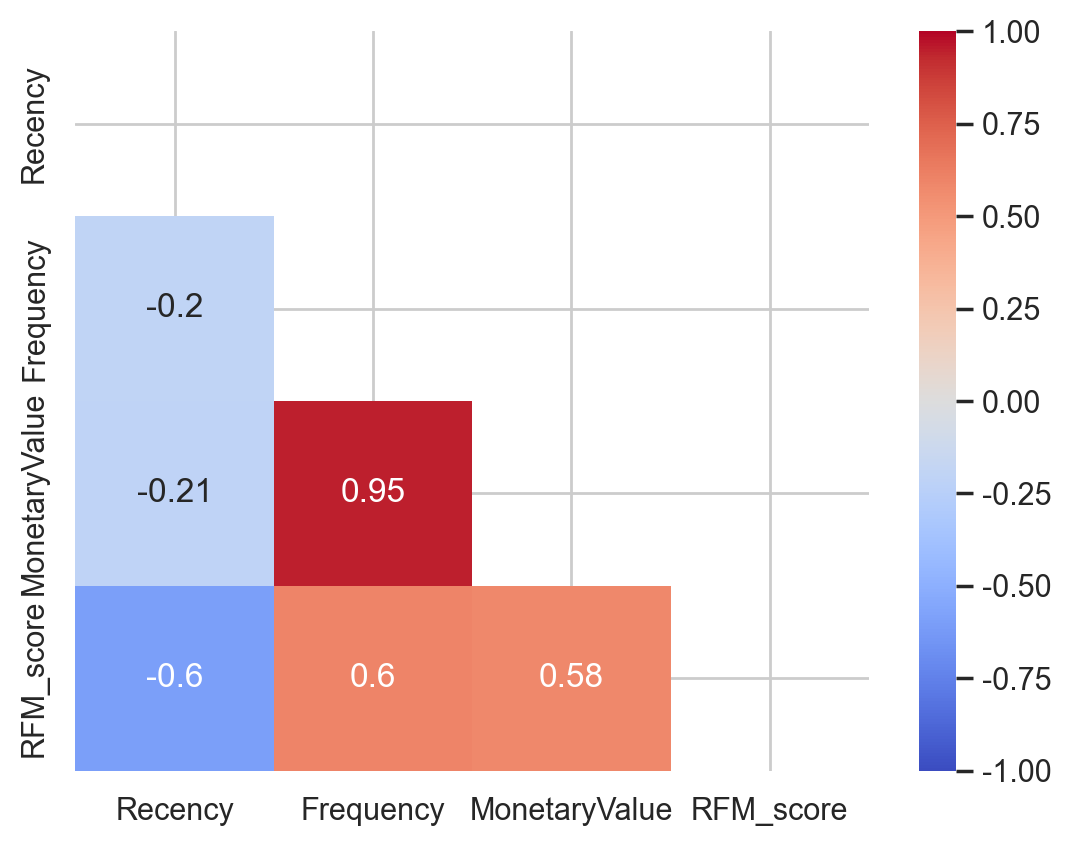

In [261]:
# 상관관계를 열분포 형태의 이미지로 보여주는 heatmap 으로 데이터 시각화합니다.
sns.heatmap(corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True, mask=mask)